In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'HR dataset Project.csv')

In [3]:
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [4]:
## to preserve Original file
Df = df.copy()

In [5]:
df.head()

employee_id         department     region         education gender   
0        65438  Sales & Marketing   region_7  Master's & above      f  \
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating   
0            sourcing                1   35                   5.0  \
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score   
0                  8              1            0                  49  \
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [6]:
achievement_metric = round(df['previous_year_rating'] + df['awards_won?']/100, 2)


In [7]:
combined_value = df['previous_year_rating'] + df['awards_won?'] / 100  # Combine rating and awards with proper scaling
new_feature = round(combined_value, 2)
new_feature.unique()

array([5.  , 3.  , 1.  , 4.  ,  nan, 2.  , 5.01, 4.01, 3.01, 1.01, 2.01])

In [8]:
achievement_metric.unique()

array([5.  , 3.  , 1.  , 4.  ,  nan, 2.  , 5.01, 4.01, 3.01, 1.01, 2.01])

In [9]:
## descriptive statistics for categorical columns
df.describe()

employee_id  no_of_trainings           age  previous_year_rating   
count  54808.000000     54808.000000  54808.000000          50684.000000  \
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score   
count       54808.000000   54808.000000  54808.000000        54808.000000  \
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [10]:
#  descriptive statistics for categorical columns
df.describe(include = 'object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df.duplicated().sum()

0

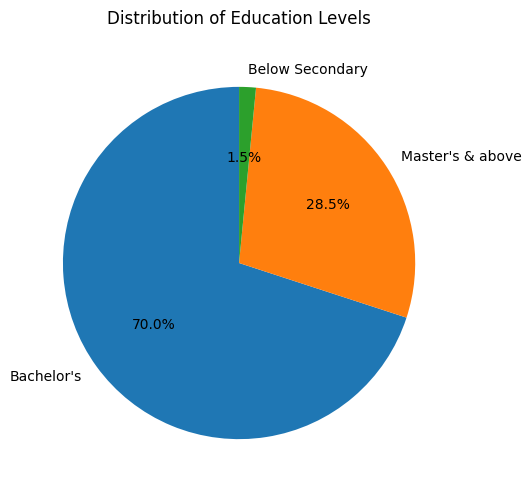

In [14]:
ed_count=df['education'].value_counts()

fig,ax=plt.subplots(figsize=(5,6))
ax.pie(ed_count,labels=ed_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Education Levels")
ax.axis('equal')
plt.show()

In [15]:
#The inference as per the above education plot is 70% of the employers are those who completed Bachelor's, 28.5% completed Master's and 1.5% are Below Secondary

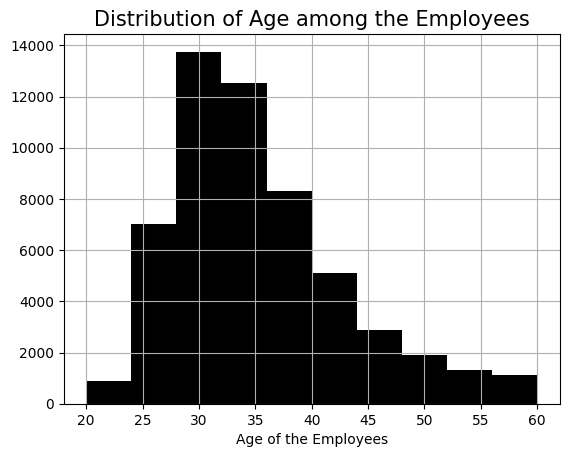

In [16]:
plt.hist(df['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

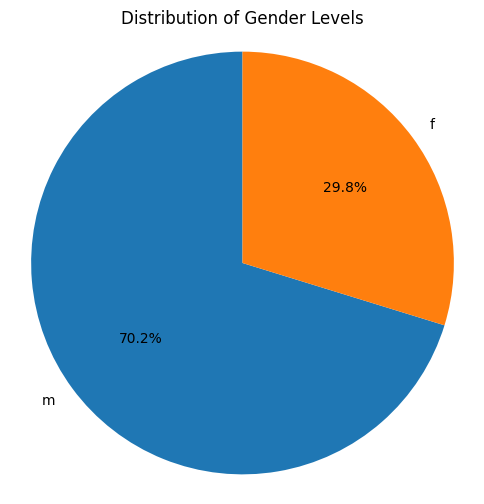

In [17]:
gen_count=df['gender'].value_counts()
gen_count

fig,ax=plt.subplots(figsize=(6,6))
ax.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Gender Levels")
ax.axis("equal")
plt.show()

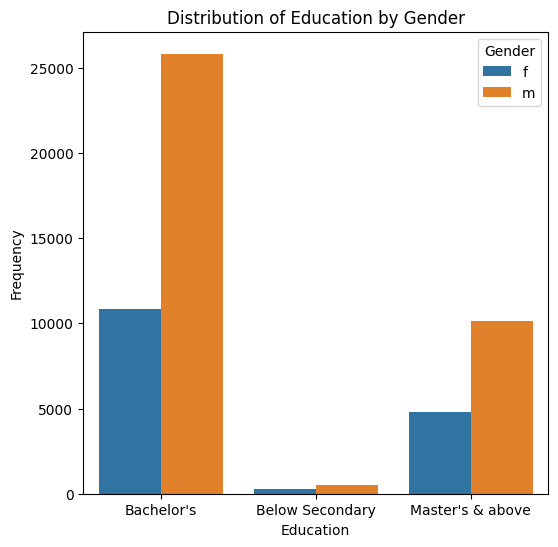

In [18]:
grouped_data=df.groupby(['education','gender']).size().reset_index(name="count")

plt.figure(figsize=(6, 6))
sns.barplot(x=grouped_data['education'], y=grouped_data['count'], hue=grouped_data['gender'], data=grouped_data)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Distribution of Education by Gender')
plt.legend(title='Gender')
plt.show()

In [19]:
# Univariate analysys (Length of service)

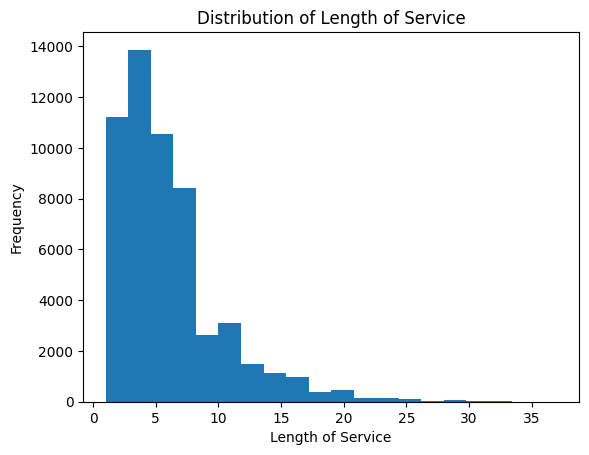

In [20]:
plt.hist(df['length_of_service'], bins=20)
plt.xlabel('Length of Service')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Service')
plt.show()

In [21]:
# Univariate analysis (Previous year rating)

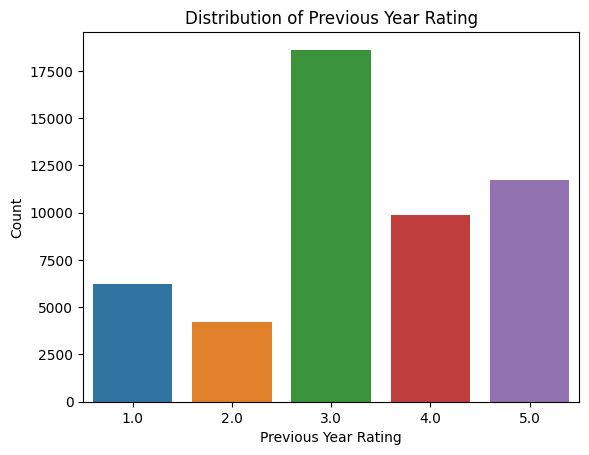

In [22]:
sns.countplot(data=df, x='previous_year_rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.title('Distribution of Previous Year Rating')
plt.show()

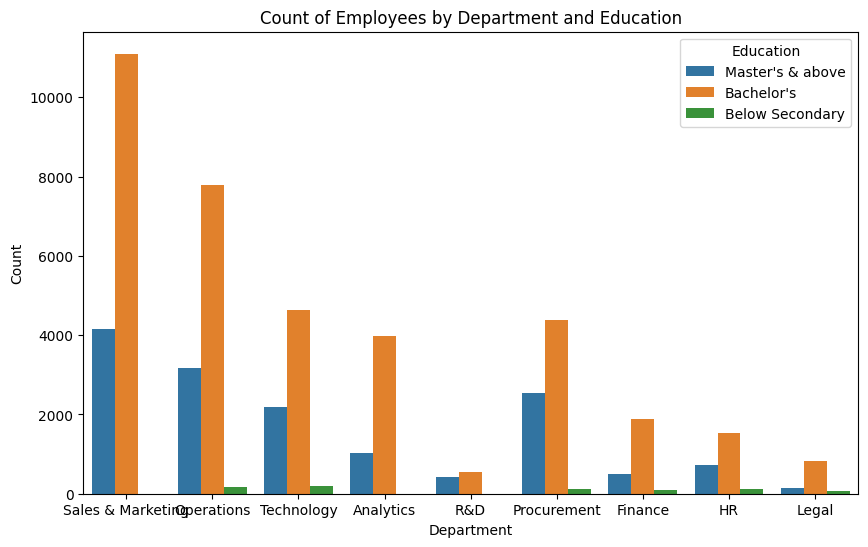

In [23]:
#Bivariate Analysis(Education and Department)
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='education', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees by Department and Education')
plt.legend(title='Education')
plt.show()

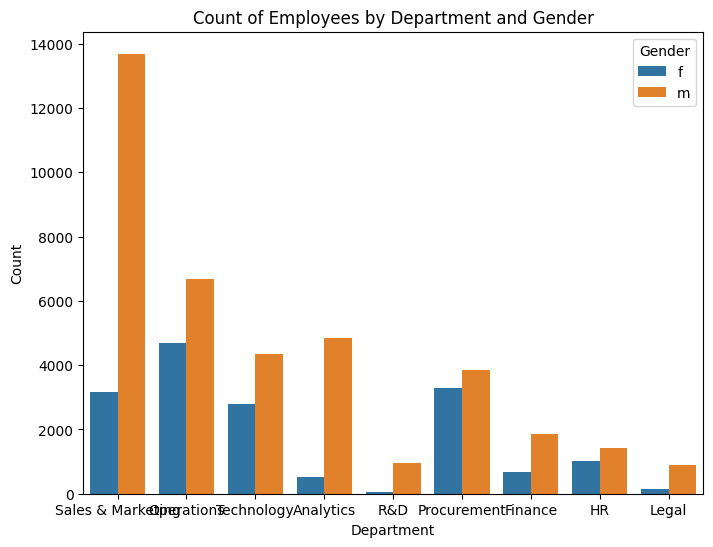

In [24]:
#Bivariate Analysis (Gender and Department)
plt.figure(figsize=(8, 6))
sns.countplot(x='department', hue='gender', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees by Department and Gender')
plt.legend(title='Gender')
plt.show()

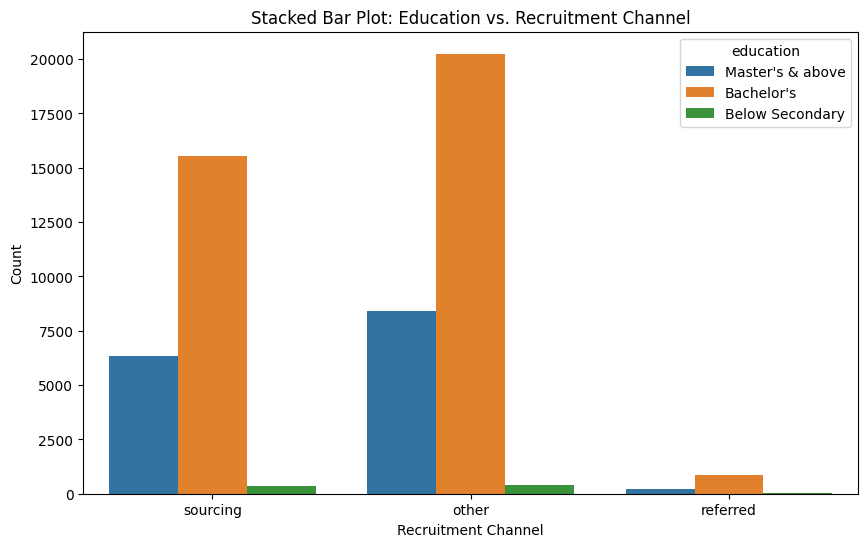

In [25]:
#Bivariate Analysis(Recruitment channel and education
plt.figure(figsize=(10, 6))
sns.countplot(x='recruitment_channel', hue='education', data=df)
plt.title('Stacked Bar Plot: Education vs. Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.show()

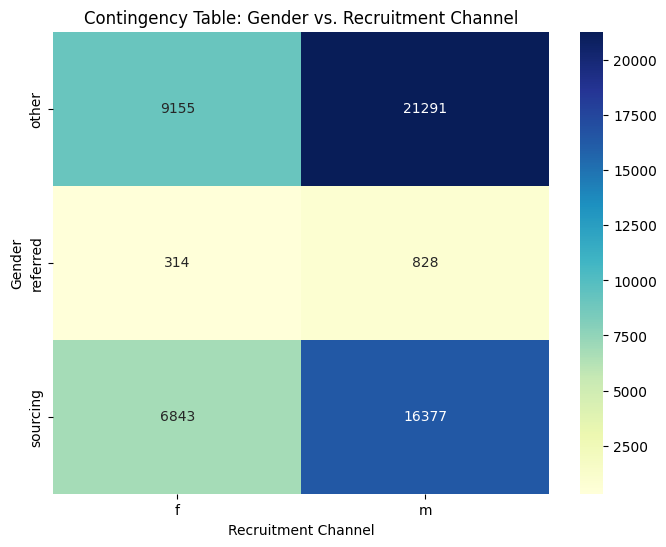

In [26]:

#Bivariate Analysis(Recruitment channel and Gender)
contingency_ChaGen = pd.crosstab(df['recruitment_channel'], df['gender'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_ChaGen, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table: Gender vs. Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Gender')
plt.show()

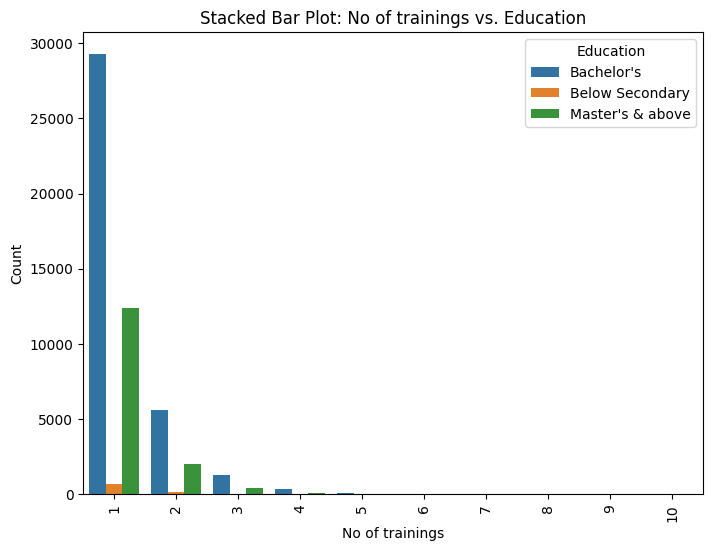

In [27]:
#Bivariate Analysis between No of trainings and  Education
contingency_TraEd= pd.crosstab(df['no_of_trainings'],df['education'])
contingency_TraEd

plt.figure(figsize=(8, 6))
sns.barplot(x='no_of_trainings', y='count', hue='education', data=contingency_TraEd.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: No of trainings vs. Education')
plt.xlabel('No of trainings')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=90)
plt.show()

In [28]:
age_bins = [20, 25, 30, 35, 40, 45, 50,60]
age_labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50','50+']
df_copy=df.copy()

# Create a new column 'age_group' in the copy DataFrame based on the age bins
df_copy['age_group'] = pd.cut(df_copy['age'], bins=age_bins, labels=age_labels)

# Group the data by 'age_group' and 'education' and calculate the count of employees
grouped_data = df_copy.groupby(['age_group', 'education']).size().reset_index(name='count')



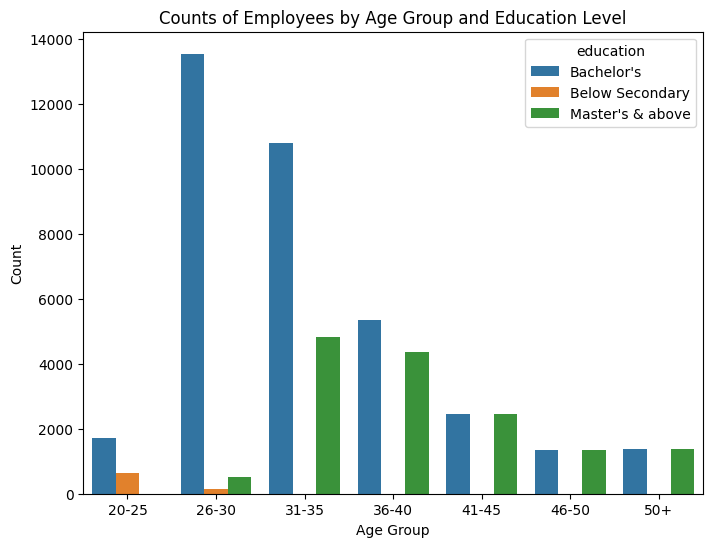

In [29]:
#Bivariate Analysis (Age and Education)
plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='count', hue='education', data=grouped_data)
plt.title('Counts of Employees by Age Group and Education Level')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

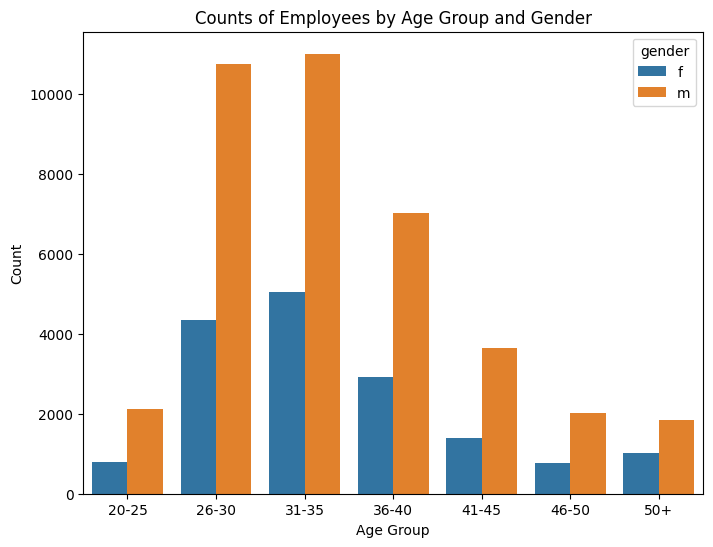

In [30]:
#Bivariate Analysis (Age and Gender)
grouped_GenEddata = df_copy.groupby(['age_group', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='count', hue='gender', data=grouped_GenEddata)
plt.title('Counts of Employees by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

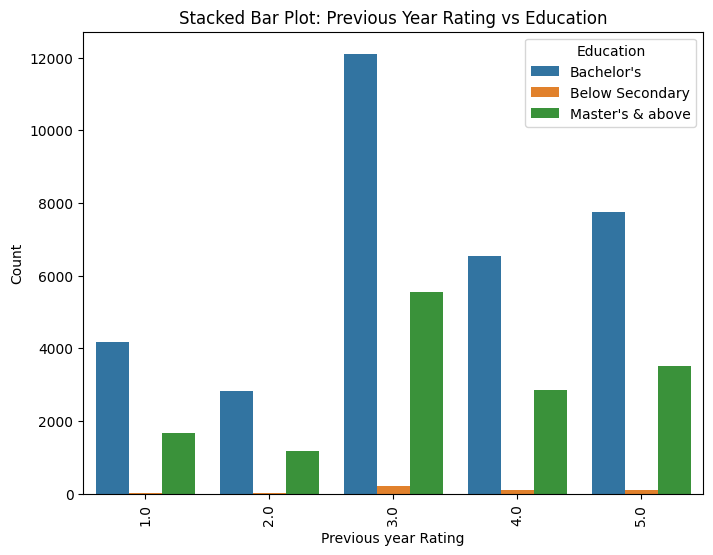

In [31]:
#Bivariate Analysis (Education and Previous Year Rating)
contingency_EdRate = pd.crosstab(index=df['education'], columns=df['previous_year_rating'])

plt.figure(figsize=(8, 6))
sns.barplot(x='previous_year_rating', y='count', hue='education', data=contingency_EdRate.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Previous Year Rating vs Education')
plt.xlabel('Previous year Rating')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=90)
plt.show()


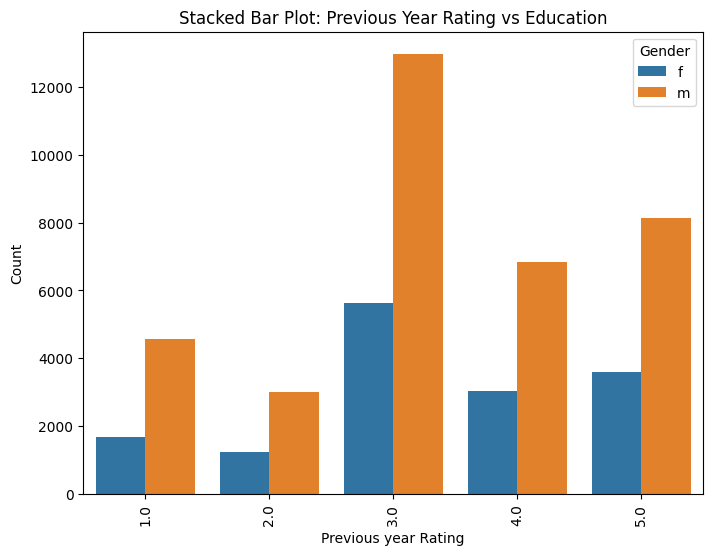

In [32]:
#Bivariate Analysis(Gender and Previous Year Rating)
contingency_GenRate = pd.crosstab(index=df['gender'], columns=df['previous_year_rating'])

plt.figure(figsize=(8, 6))
sns.barplot(x='previous_year_rating', y='count', hue='gender', data=contingency_GenRate.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Previous Year Rating vs Education')
plt.xlabel('Previous year Rating')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()

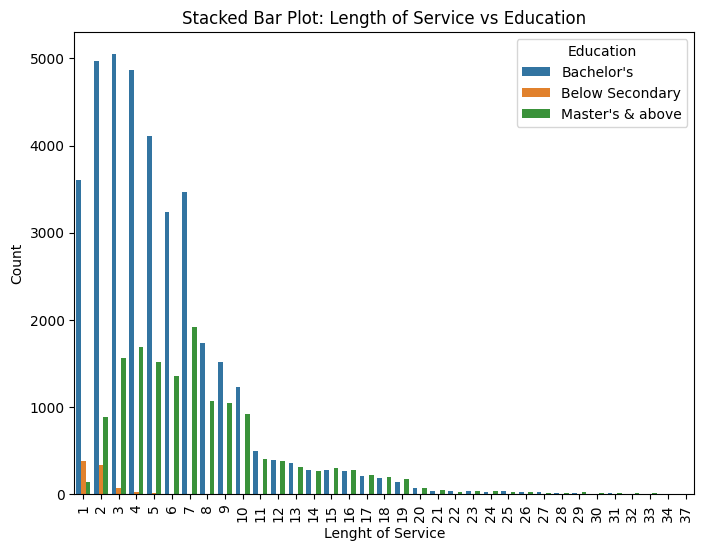

In [33]:
#Bivariate Analysis(Education and Length of Service)
contingency_SerEd = pd.crosstab(index=df['education'], columns=df['length_of_service'])

plt.figure(figsize=(8, 6))
sns.barplot(x='length_of_service', y='count', hue='education', data=contingency_SerEd.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Length of Service vs Education')
plt.xlabel('Lenght of Service')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=90)
plt.show()

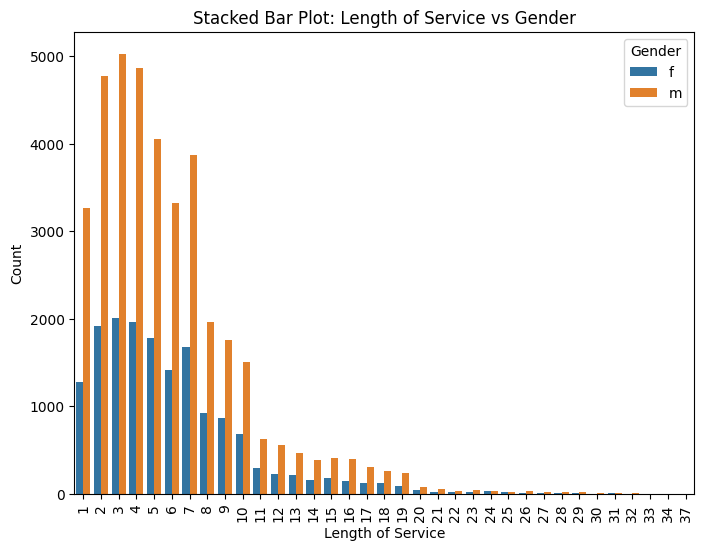

In [34]:
#Bivariate Analysis(Gender and Length of Service)
contingency_SerGen = pd.crosstab(index=df['gender'], columns=df['length_of_service'])

plt.figure(figsize=(8, 6))
sns.barplot(x='length_of_service', y='count', hue='gender', data=contingency_SerGen.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Length of Service vs Gender')
plt.xlabel('Length of Service')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()

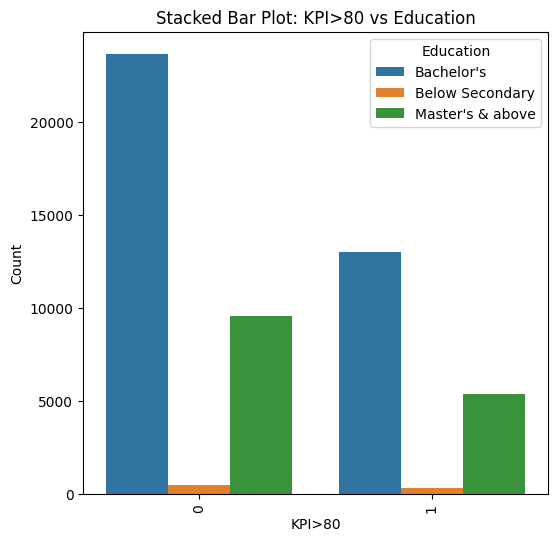

In [35]:
#Bivariate Analysis(Kpi's met>80 and education)
contingency_KPI_Ed = pd.crosstab(index=df['KPIs_met >80%'], columns=df['education'])

plt.figure(figsize=(6, 6))
sns.barplot(x='KPIs_met >80%', y='count', hue='education', data=contingency_KPI_Ed.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: KPI>80 vs Education')
plt.xlabel('KPI>80')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=90)
plt.show()

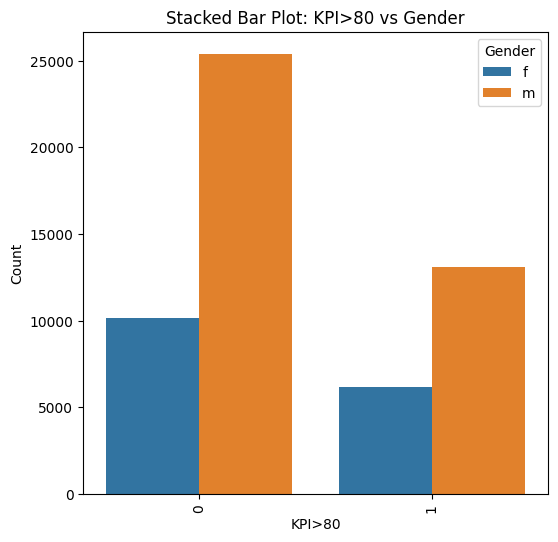

In [36]:
#Bivariate Analysis(KPI's>80 and gender)
contingency_KPI_Gen = pd.crosstab(index=df['KPIs_met >80%'], columns=df['gender'])

plt.figure(figsize=(6, 6))
sns.barplot(x='KPIs_met >80%', y='count', hue='gender', data=contingency_KPI_Gen.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: KPI>80 vs Gender')
plt.xlabel('KPI>80')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()

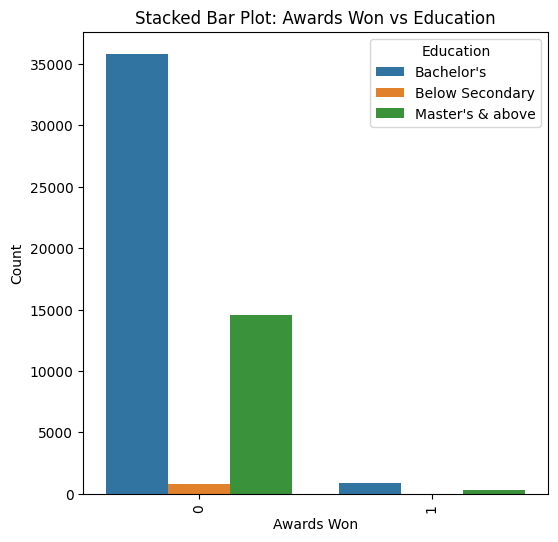

In [37]:
#Bivariate Analysis (Education and Awards won)
contingency_award_Ed = pd.crosstab(index=df['awards_won?'], columns=df['education'])

plt.figure(figsize=(6, 6))
sns.barplot(x='awards_won?', y='count', hue='education', data=contingency_award_Ed.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Awards Won vs Education')
plt.xlabel('Awards Won')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=90)
plt.show()

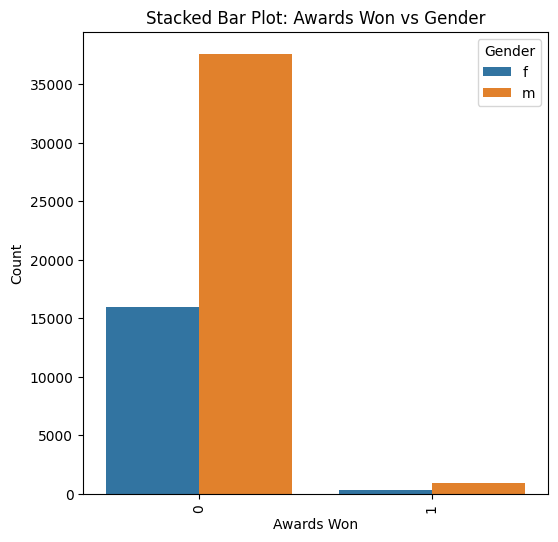

In [38]:
#Bivariate Analysis(Gender and awards won)
contingency_award_Gen = pd.crosstab(index=df['awards_won?'], columns=df['gender'])

plt.figure(figsize=(6, 6))
sns.barplot(x='awards_won?', y='count', hue='gender', data=contingency_award_Gen.stack().reset_index(name='count'))
plt.title('Stacked Bar Plot: Awards Won vs Gender')
plt.xlabel('Awards Won')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()


In [39]:
avg_training_sore_bins = [35,50,60,70,80,90,100]
avg_trainig_score_labels = ['35-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'age_group' in the copy DataFrame based on the age bins
df_copy['avg_training_group'] = pd.cut(df_copy['avg_training_score'], bins=avg_training_sore_bins, labels=avg_trainig_score_labels)

# Group the data by 'age_group' and 'education' and calculate the count of employees
grouped_data_avg = df_copy.groupby(['avg_training_group', 'education']).size().reset_index(name='count')

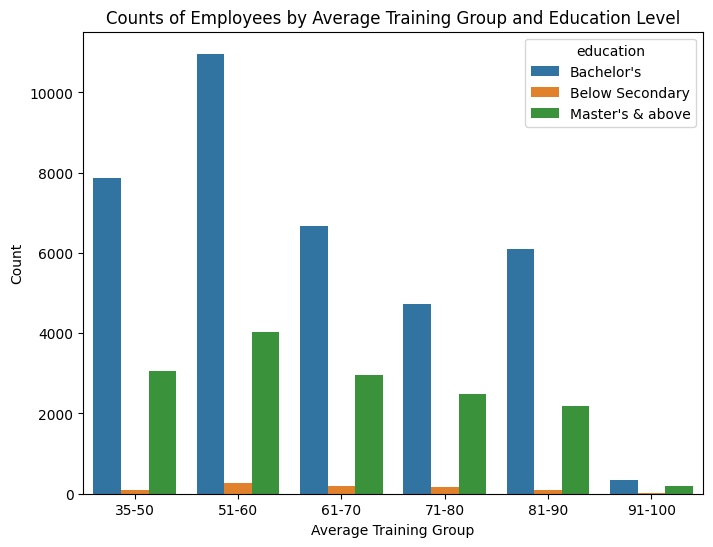

In [40]:
#Bivariate Analysis (Average Training score and Education)
plt.figure(figsize=(8, 6))
sns.barplot(x='avg_training_group', y='count', hue='education', data=grouped_data_avg)
plt.title('Counts of Employees by Average Training Group and Education Level')
plt.xlabel('Average Training Group')
plt.ylabel('Count')
plt.show()

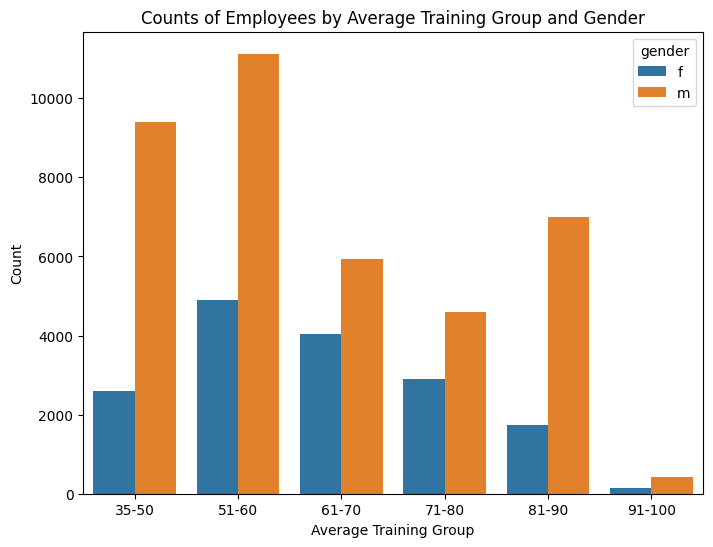

In [41]:
#Bivariate Analysis(Average Training Score and Gender)
grouped_data_avgGen = df_copy.groupby(['avg_training_group', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='avg_training_group', y='count', hue='gender', data=grouped_data_avgGen)
plt.title('Counts of Employees by Average Training Group and Gender')
plt.xlabel('Average Training Group')
plt.ylabel('Count')
plt.show()

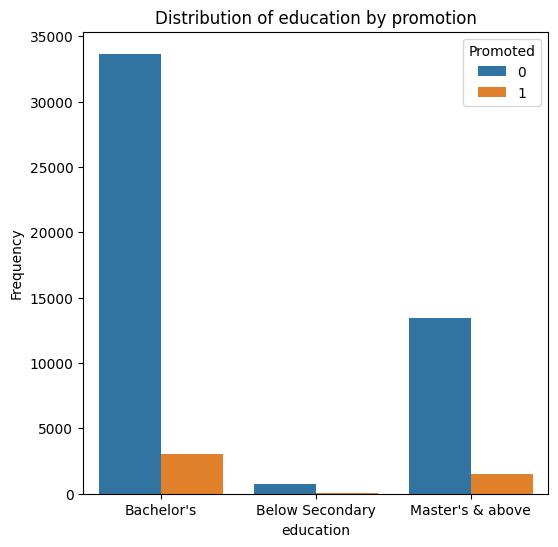

In [42]:
#Bivariate Analysis(Education and Promotion)
grouped_edu_prom=df.groupby(['education','is_promoted']).size().reset_index(name="count")

plt.figure(figsize=(6, 6))
sns.barplot(x='education', y='count', hue='is_promoted', data=grouped_edu_prom)
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title('Distribution of education by promotion')
plt.legend(title='Promoted')
plt.show()

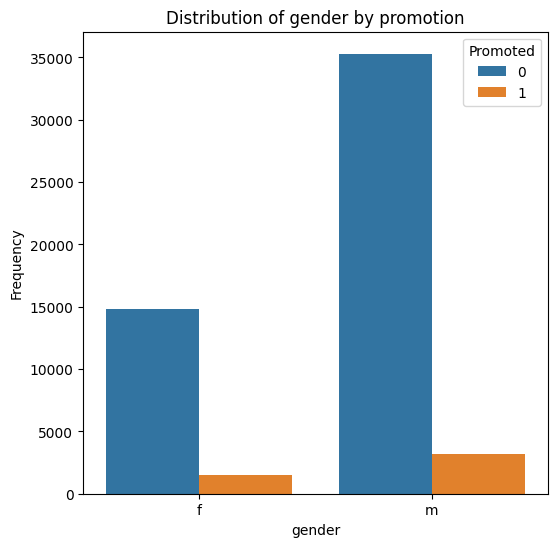

In [43]:
#Bivariate Analysis(Gender and Promotion)
grouped_gen_prom=df.groupby(['gender','is_promoted']).size().reset_index(name="count")

plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='count', hue='is_promoted', data=grouped_gen_prom)
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Distribution of gender by promotion')
plt.legend(title='Promoted')
plt.show()

In [44]:
# Bivariate analysis (Length of service and previous year rating)

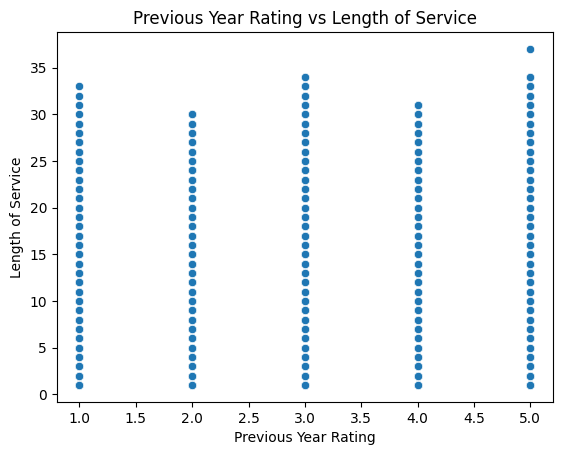

In [45]:
sns.scatterplot(data=df, x='previous_year_rating', y='length_of_service')
plt.xlabel('Previous Year Rating')
plt.ylabel('Length of Service')
plt.title('Previous Year Rating vs Length of Service')
plt.show()

In [46]:
correlation = df['previous_year_rating'].corr(df['length_of_service'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.0002527460163047872


In [47]:
# The low correlation coefficient indicates that the "previous_year_rating" and "length_of_service" have a weak positive relationship.
# This implies that the rating given in the previous year has limited predictive power for an employee's length of service and vice versa.

In [48]:
# Bivariate analysis (Previous year rating and department)

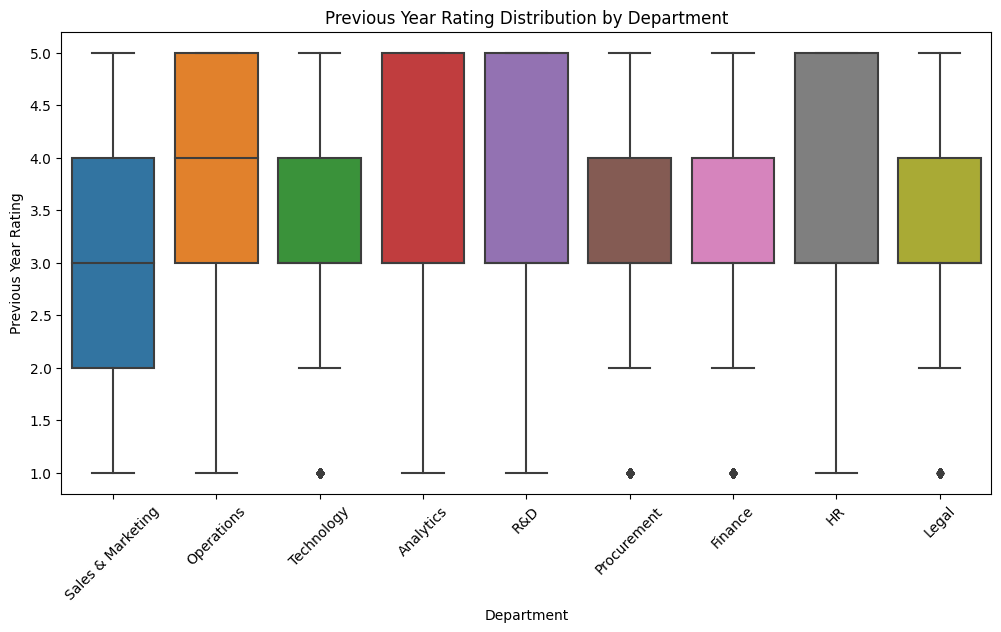

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='previous_year_rating', data=df)
plt.title('Previous Year Rating Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Previous Year Rating')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Bivariate analysis (Previous year rating and recruitment channel)

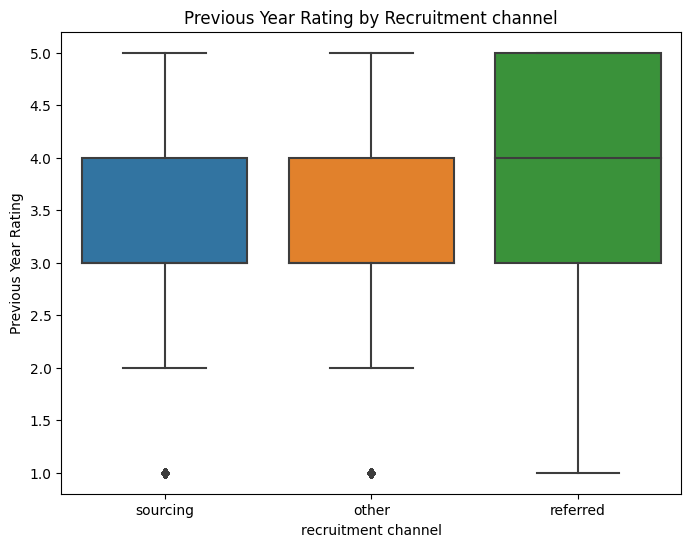

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='recruitment_channel', y='previous_year_rating', data=df)
plt.title('Previous Year Rating by Recruitment channel')
plt.xlabel('recruitment channel')
plt.ylabel('Previous Year Rating')
plt.show()

In [52]:
# Bivariate analysis (Previous year rating and KPI's met>80%)

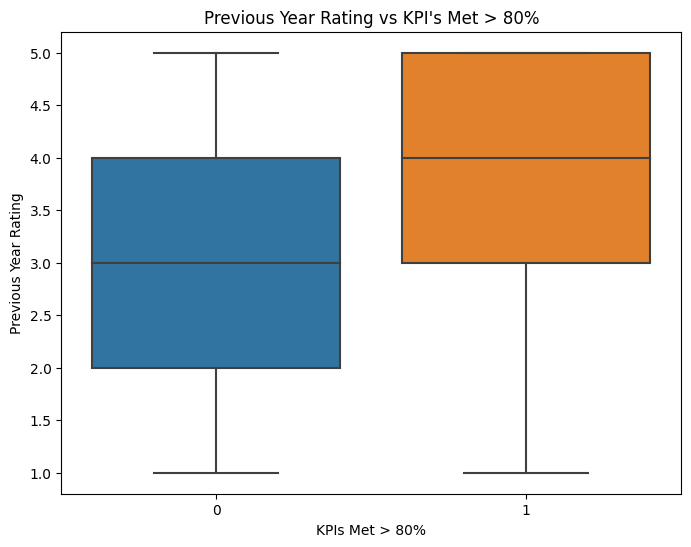

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="KPIs_met >80%", y="previous_year_rating", data=df)
plt.title("Previous Year Rating vs KPI's Met > 80%")
plt.xlabel("KPIs Met > 80%")
plt.ylabel("Previous Year Rating")
plt.show()

In [54]:
# Bivariate analysis (Previous year rating and awards won)

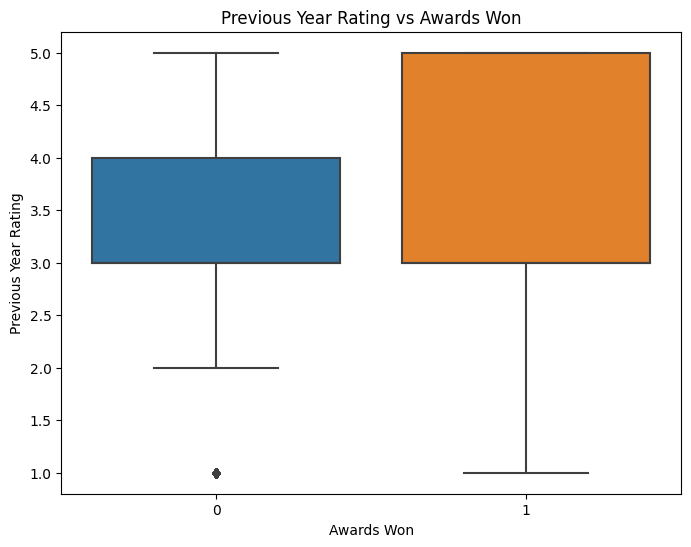

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="awards_won?", y="previous_year_rating", data=df)
plt.title("Previous Year Rating vs Awards Won")
plt.xlabel("Awards Won")
plt.ylabel("Previous Year Rating")
plt.show()

In [56]:
# Bivariate analysis (Previous year rating and is promoted)

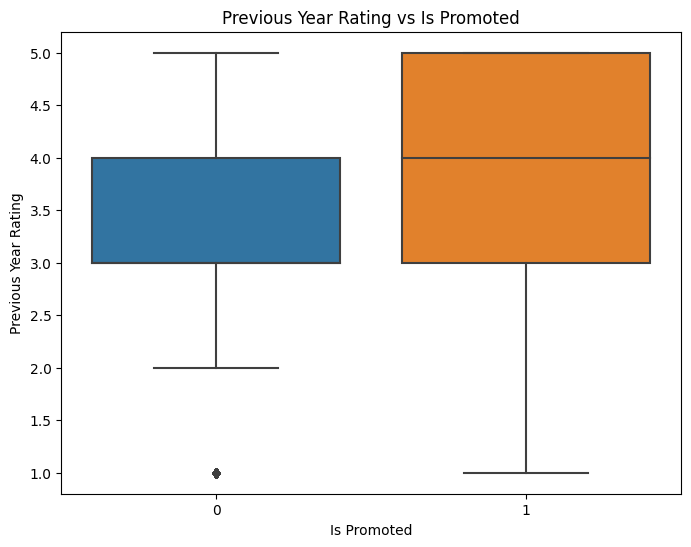

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_promoted", y="previous_year_rating", data=df)
plt.title("Previous Year Rating vs Is Promoted")
plt.xlabel("Is Promoted")
plt.ylabel("Previous Year Rating")
plt.show()

In [58]:
# Bivariate analysis (Length of service and department)

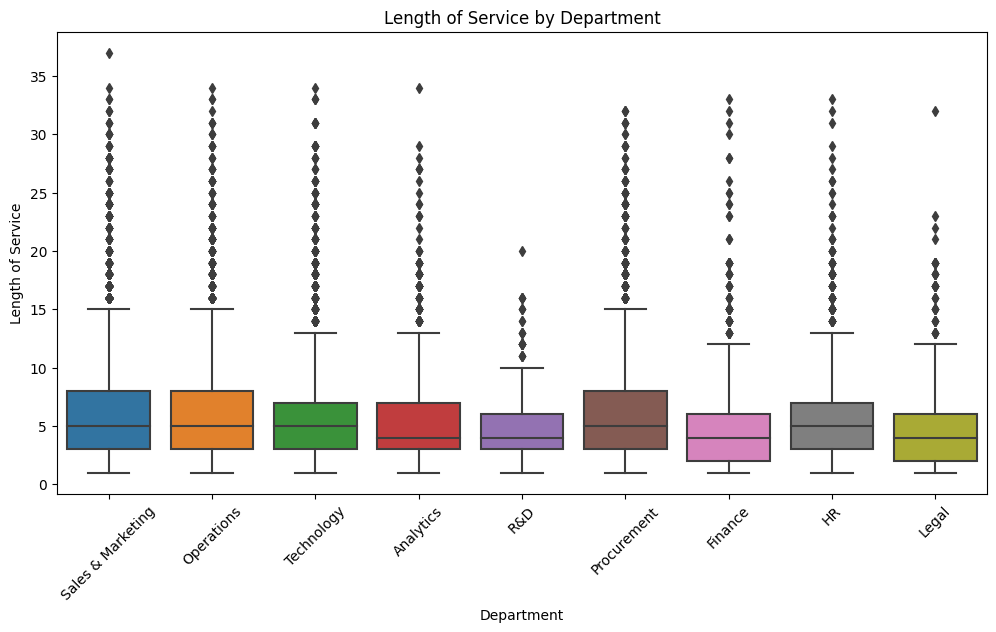

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="department", y="length_of_service", data=df)
plt.title("Length of Service by Department")
plt.xlabel("Department")
plt.ylabel("Length of Service")
plt.xticks(rotation=45)
plt.show()

In [60]:
# Bivariate analysis (Length of service and education)

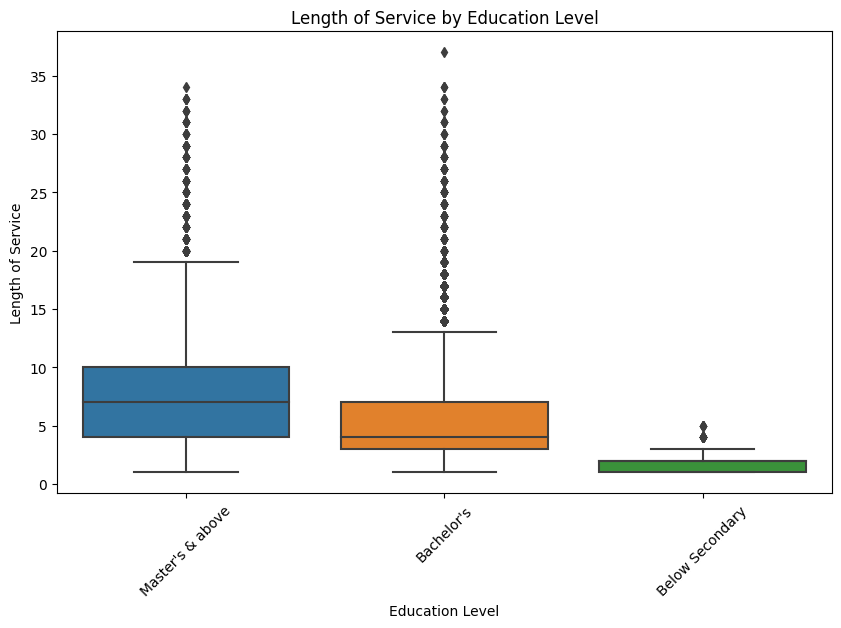

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="education", y="length_of_service", data=df)
plt.title("Length of Service by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Length of Service")
plt.xticks(rotation=45)
plt.show()

In [62]:
# Bivariate analysis (Length of service and recruitment channel)

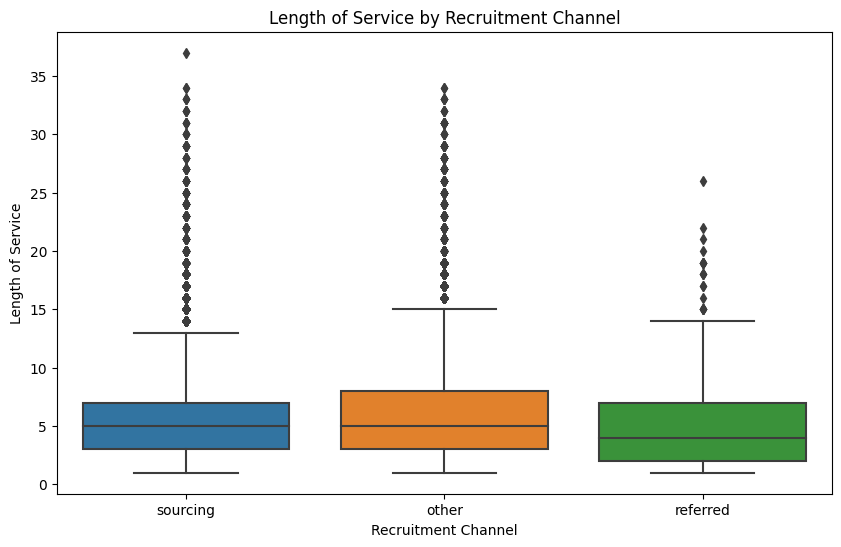

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="recruitment_channel", y="length_of_service", data=df)
plt.title("Length of Service by Recruitment Channel")
plt.xlabel("Recruitment Channel")
plt.ylabel("Length of Service")
plt.show()

In [64]:
# Bivariate analysis (Length of service and no.of trainings)

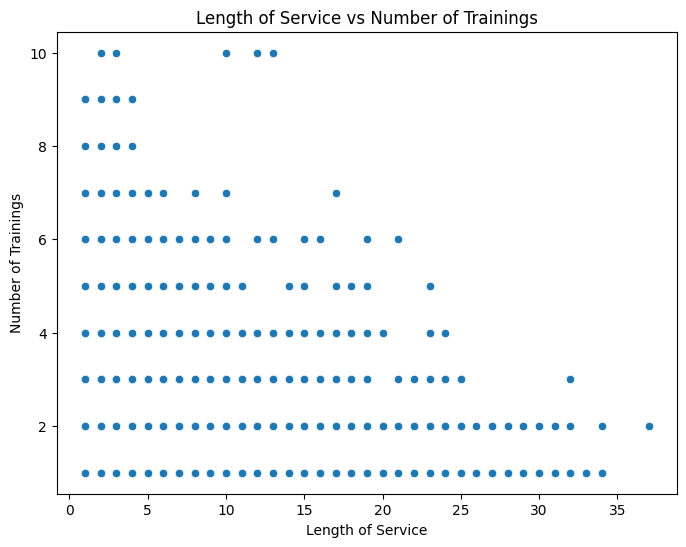

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_of_service', y='no_of_trainings', data=df)
plt.title('Length of Service vs Number of Trainings')
plt.xlabel('Length of Service')
plt.ylabel('Number of Trainings')
plt.show()

In [66]:
# Bivariate analysis (Length of service and age)

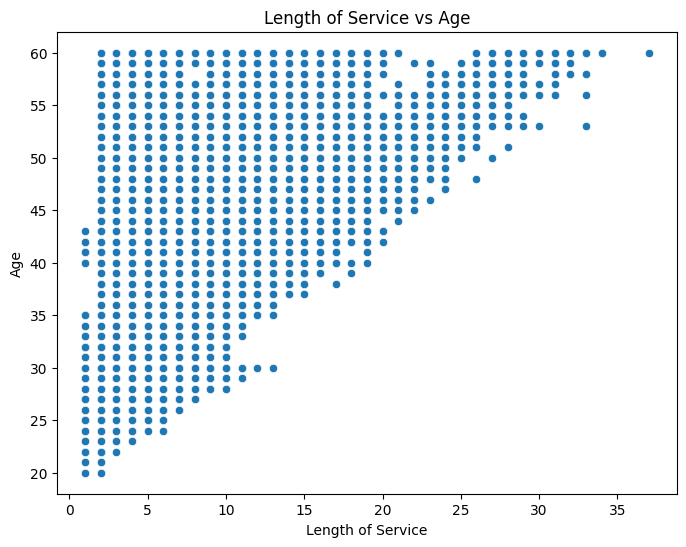

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_of_service', y='age', data=df)
plt.title('Length of Service vs Age')
plt.xlabel('Length of Service')
plt.ylabel('Age')
plt.show()

In [68]:
# Bivariate analysis (Length of service and awards won)

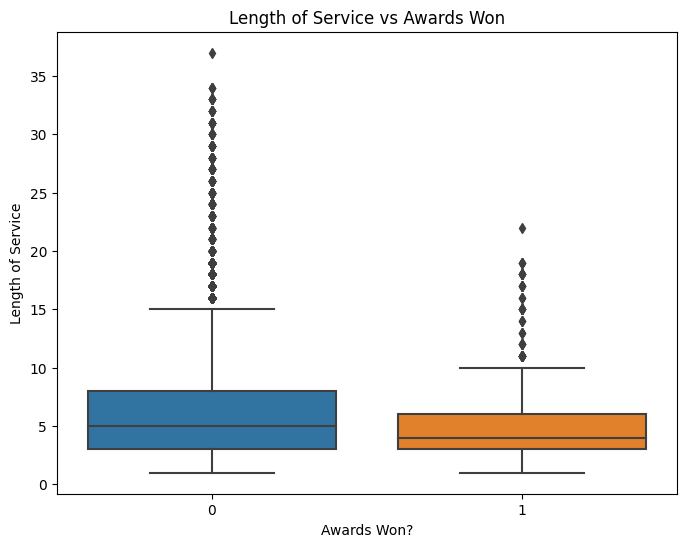

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="awards_won?", y="length_of_service", data=df)
plt.title("Length of Service vs Awards Won")
plt.xlabel("Awards Won?")
plt.ylabel("Length of Service")
plt.show()

In [70]:
# Bivariate analysis (Length of service and is promoted)

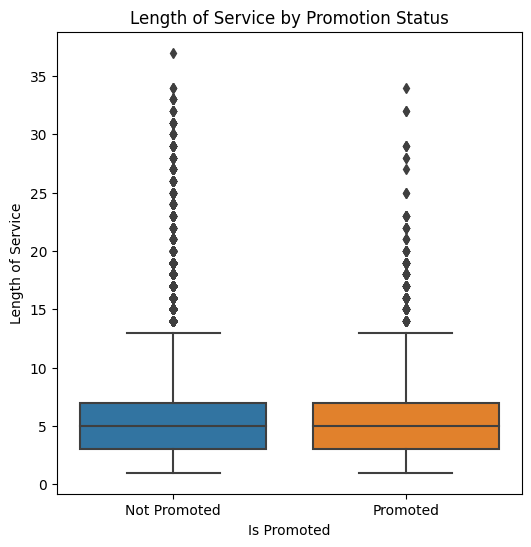

In [71]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="is_promoted", y="length_of_service", data=df)
plt.title("Length of Service by Promotion Status")
plt.xlabel("Is Promoted")
plt.ylabel("Length of Service")
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.show()

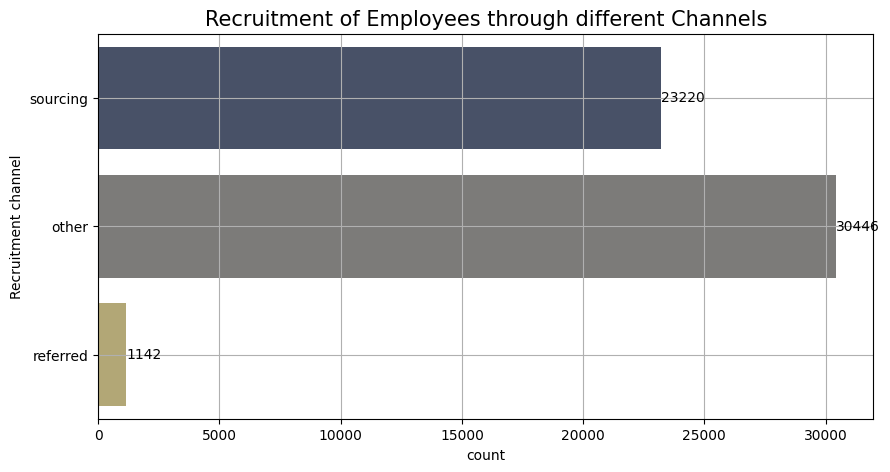

In [72]:
##Recruitment of employess through different Channels
plt.rcParams['figure.figsize'] = (10,5)
ax =sns.countplot(y = df['recruitment_channel'], palette = 'cividis', orient = 'v')
for label in ax.containers:
  ax.bar_label(label)
plt.ylabel('Recruitment channel')
plt.title('Recruitment of Employees through different Channels', fontsize = 15)
plt.grid()

plt.show()

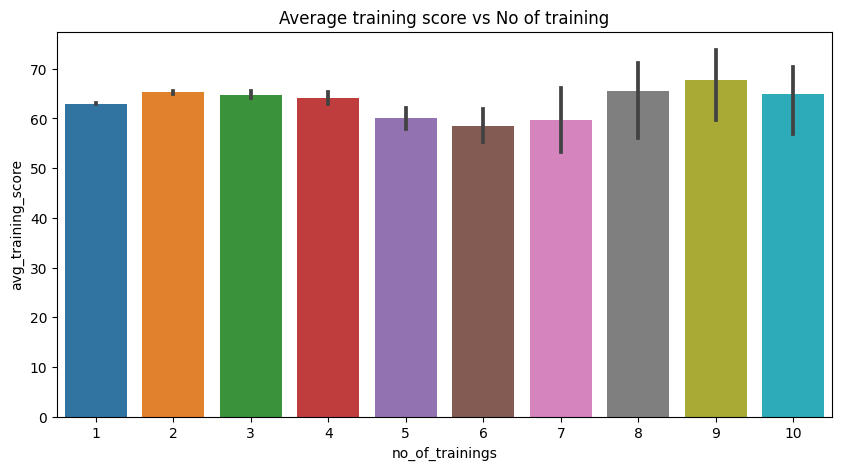

In [73]:
sns.barplot(x='no_of_trainings',y='avg_training_score',data=df,)
plt.title('Average training score vs No of training')
plt.show()

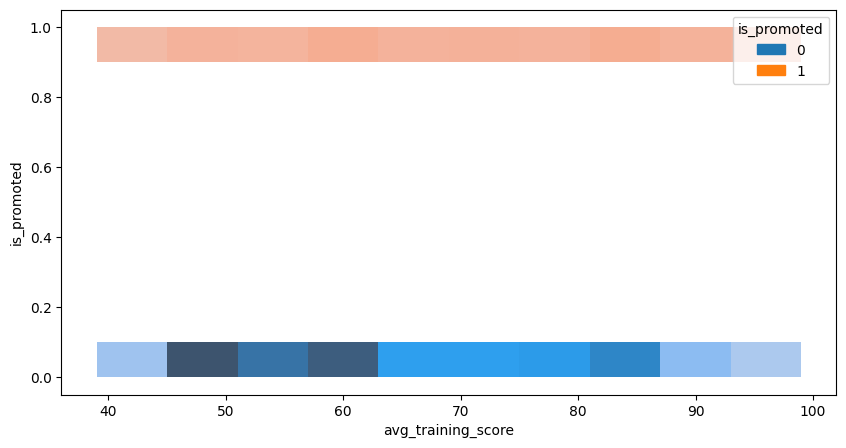

In [74]:
plot =sns.histplot(x=df['avg_training_score'], y=df['is_promoted'],hue=df['is_promoted'],bins=10,)

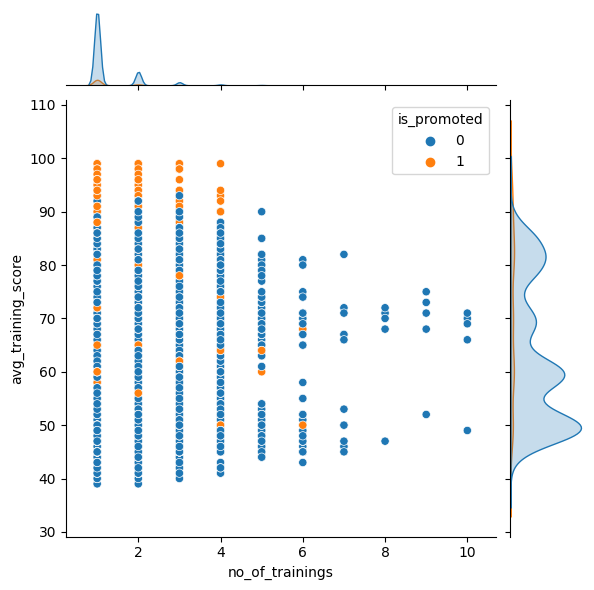

In [75]:
sns.jointplot(x=df['no_of_trainings'],y=df['avg_training_score'], hue=df['is_promoted'])

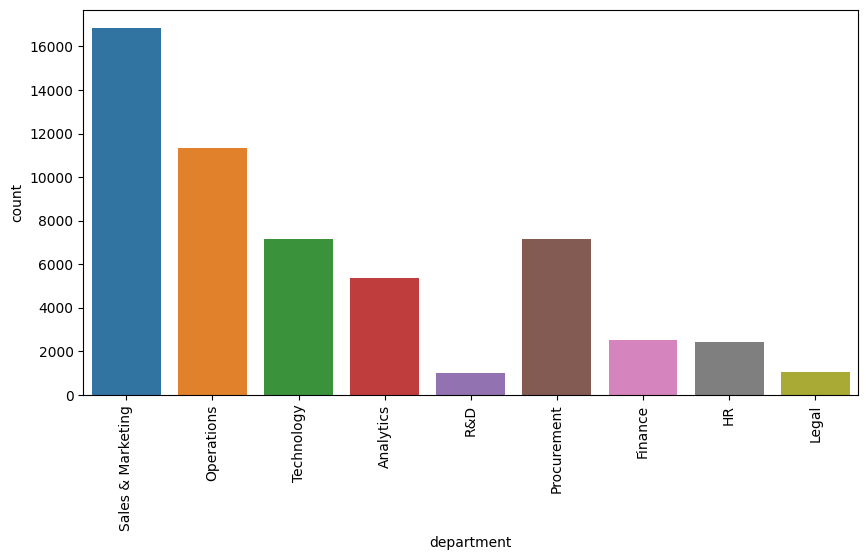

In [76]:
# Univariate analysis for the column department
sns.countplot(data = df,x=df['department'])
plt.xticks(rotation = 90)
plt.show()

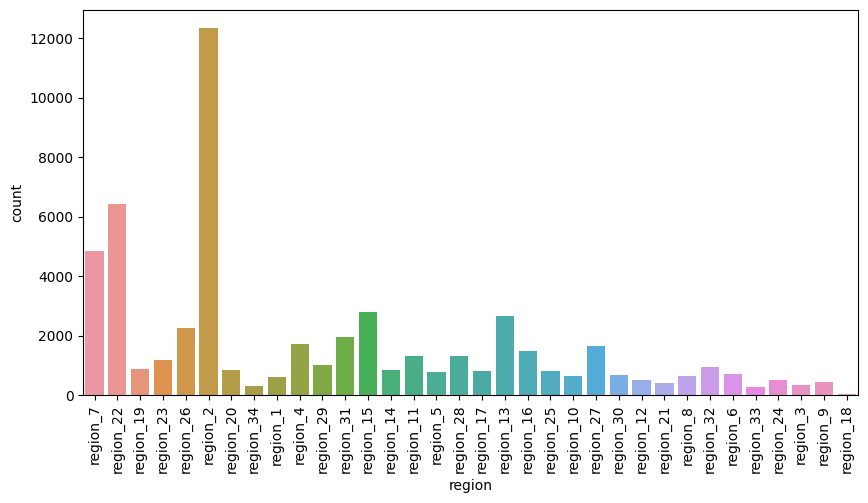

In [77]:
# Univariate analysis for the column region
sns.countplot(data = df,x=df['region'])
plt.xticks(rotation = 90)
plt.show()

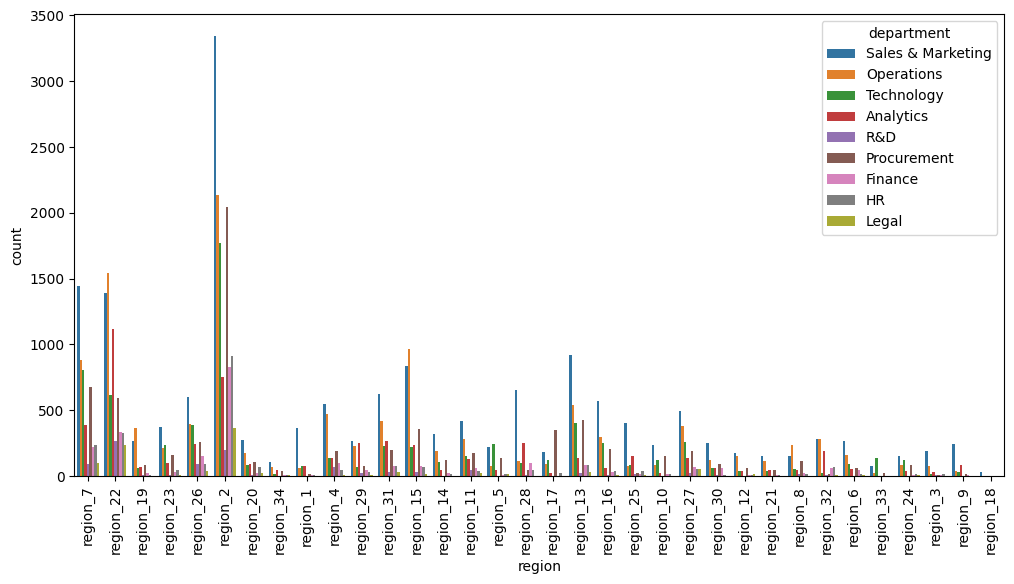

In [78]:
#Bivariate analysis for the columns department and region
plt.figure(figsize=(12,6))
sns.countplot(data = df,x = 'region',hue = 'department')
plt.xticks(rotation = 90)
plt.show()

In [79]:
#Seperating categorical columns and numerical columns
cat_data = [features for features in df.columns if df[features].dtypes == 'O']
num_data = [features for features in df.columns if df[features].dtypes != 'O']


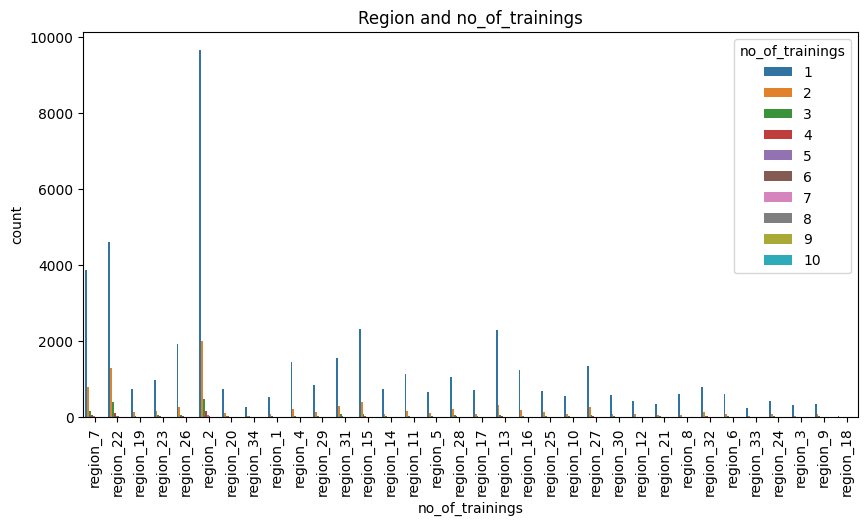

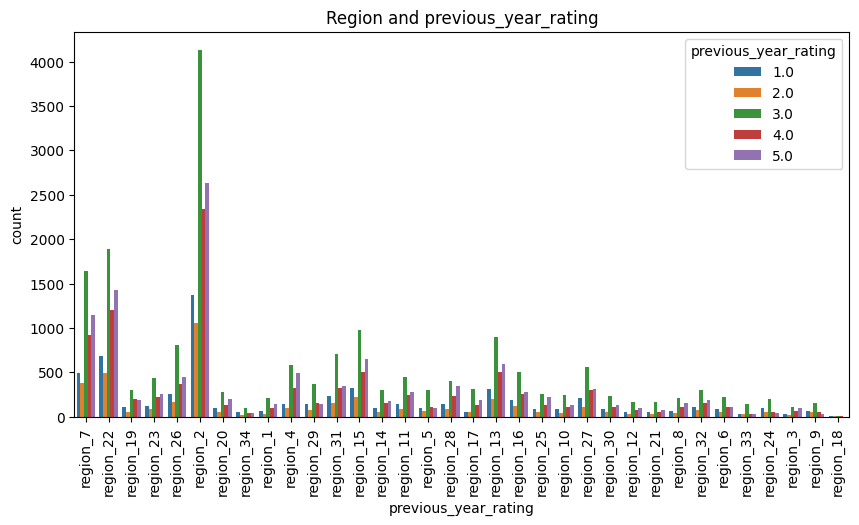

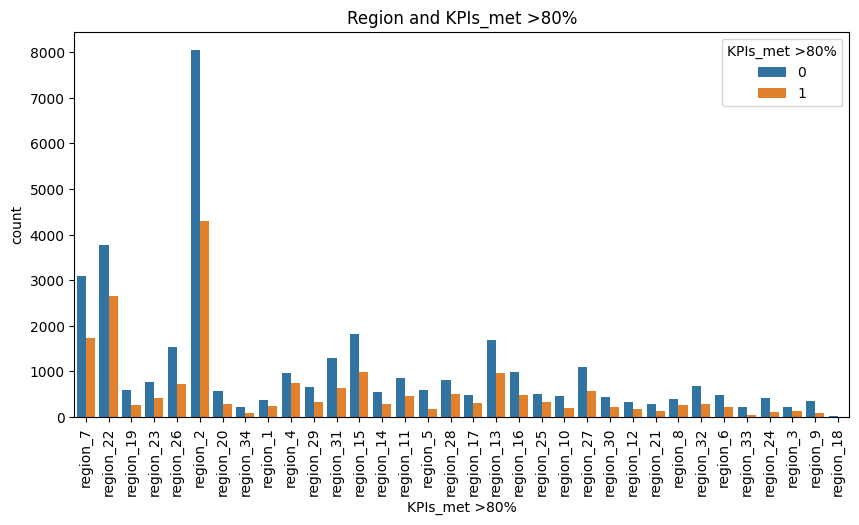

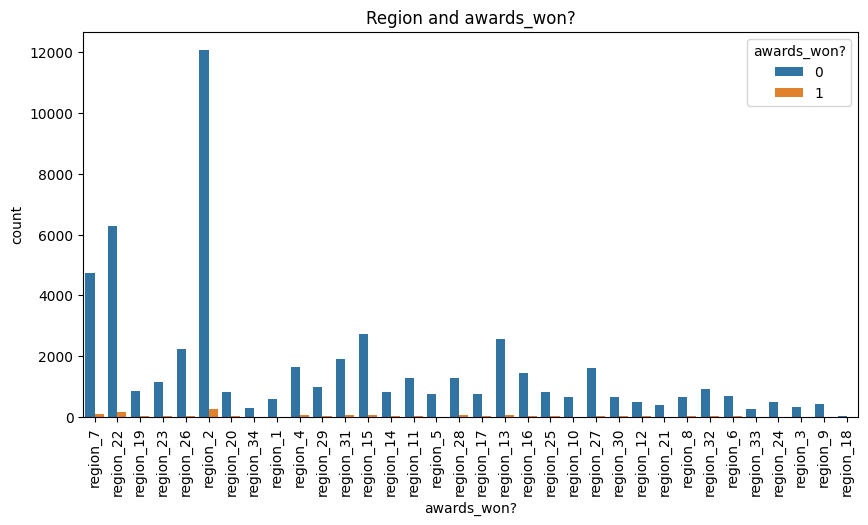

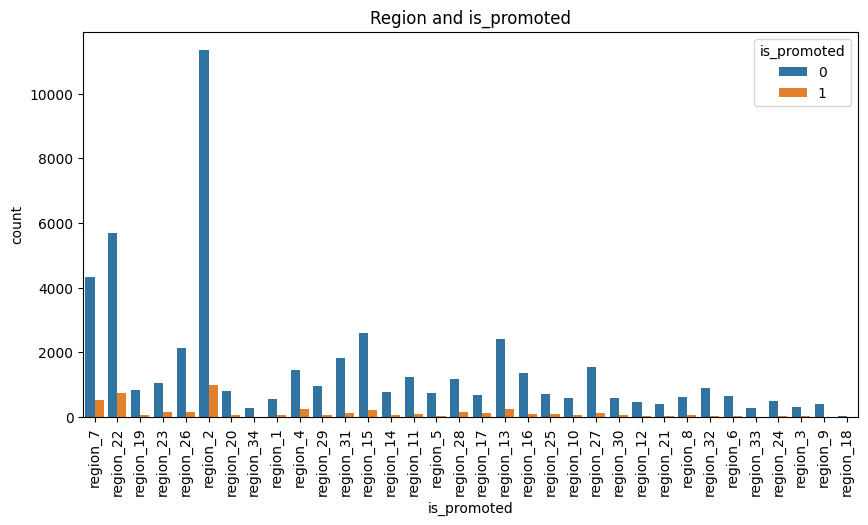

In [80]:
#Bivariate analysis of discrete columns and region column
for feature in num_data:
    df1 = df.copy()
    if len(df1[feature].unique())>12:
        pass
    else:
        sns.countplot(x= df1['region'],hue= df1[feature],data = df1)
        plt.title('Region' + ' and ' + feature)
        plt.xticks(rotation = 90)
        plt.xlabel(feature)

        plt.show()

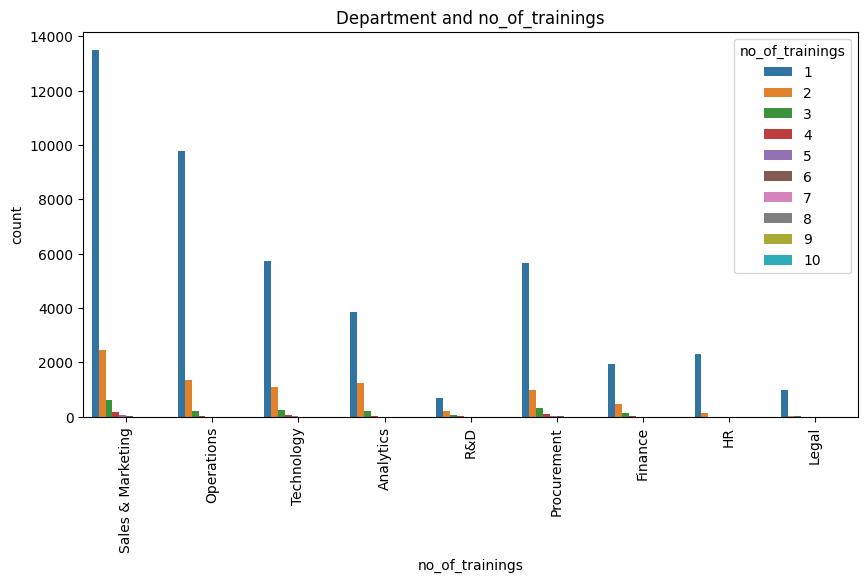

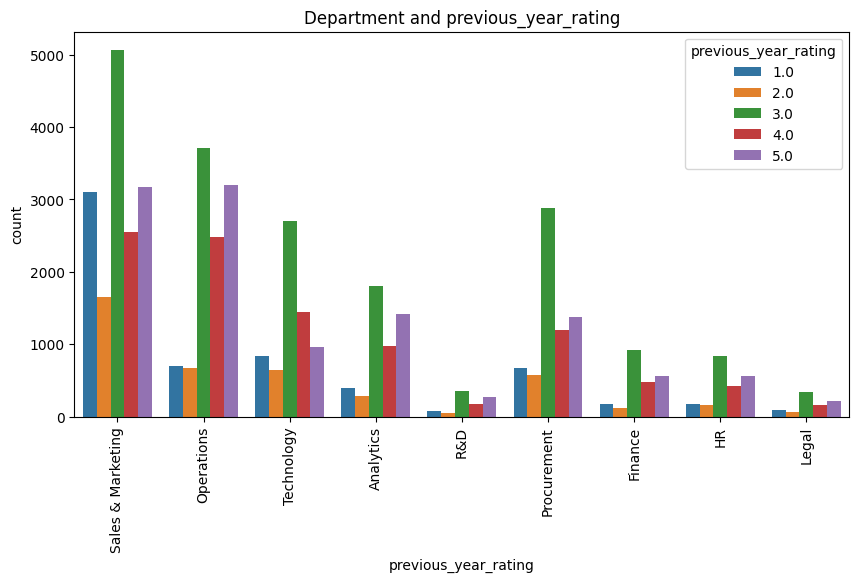

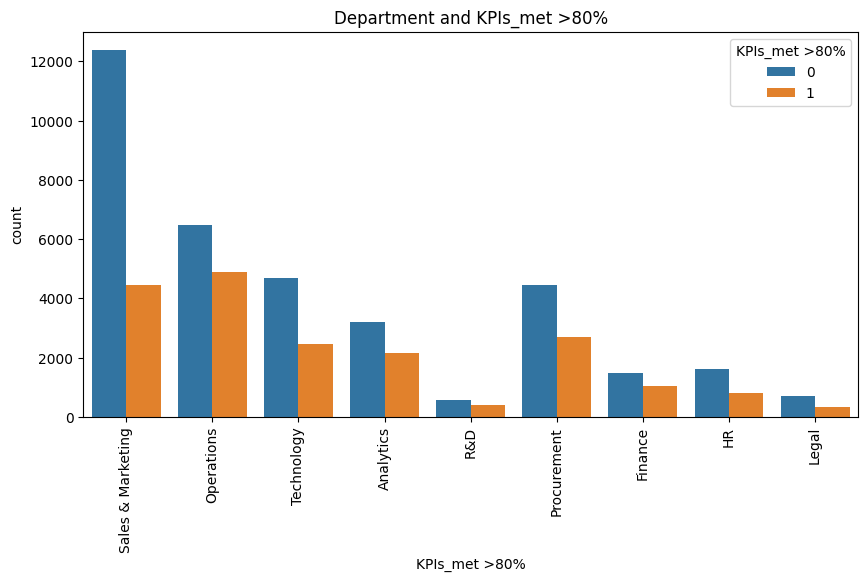

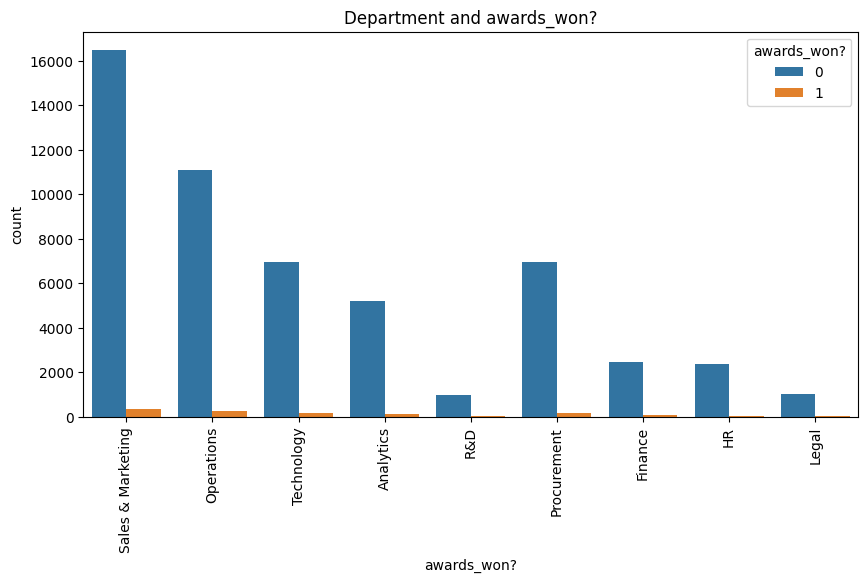

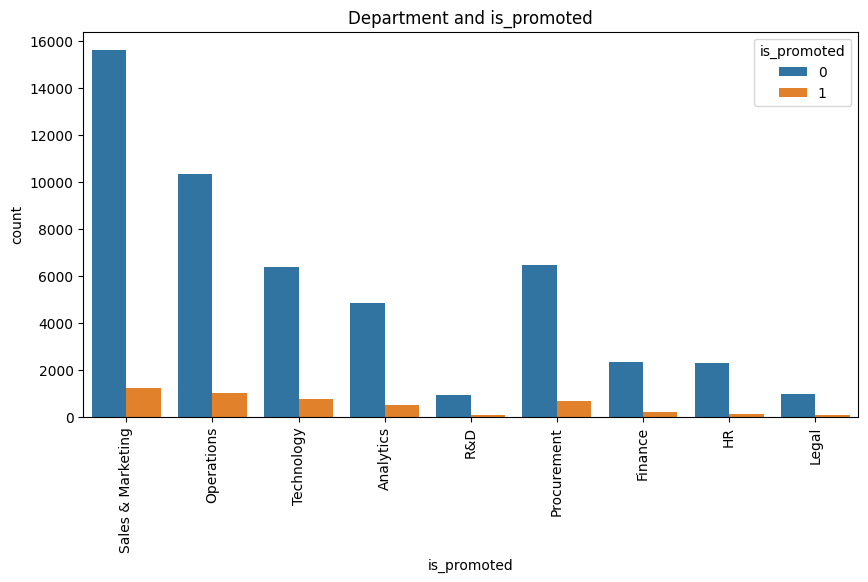

In [81]:
#Bivariate analysis of discrete columns and department column
for feature in num_data:
    df1 = df.copy()
    if len(df1[feature].unique())>12:
        pass
    else:
        sns.countplot(x= df1['department'],hue= df1[feature],data = df1)
        plt.title('Department '+'and ' + feature )
        plt.xticks(rotation = 90)
        plt.xlabel(feature)

        plt.show()

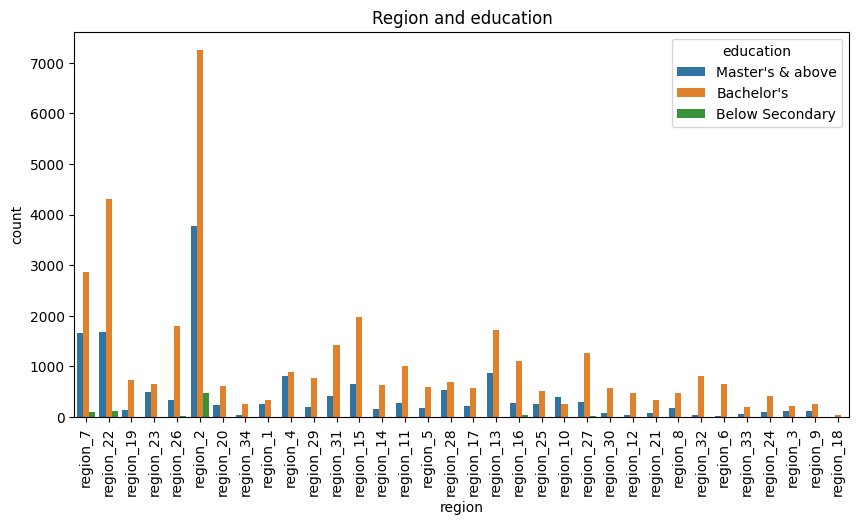

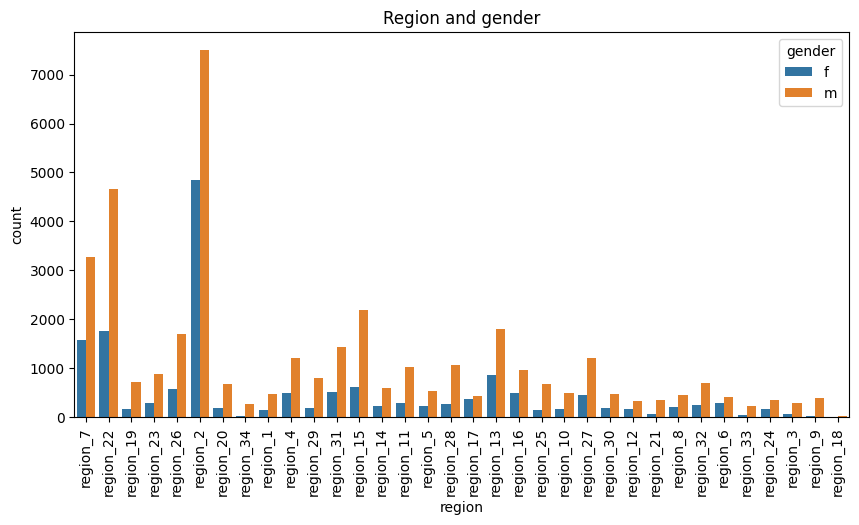

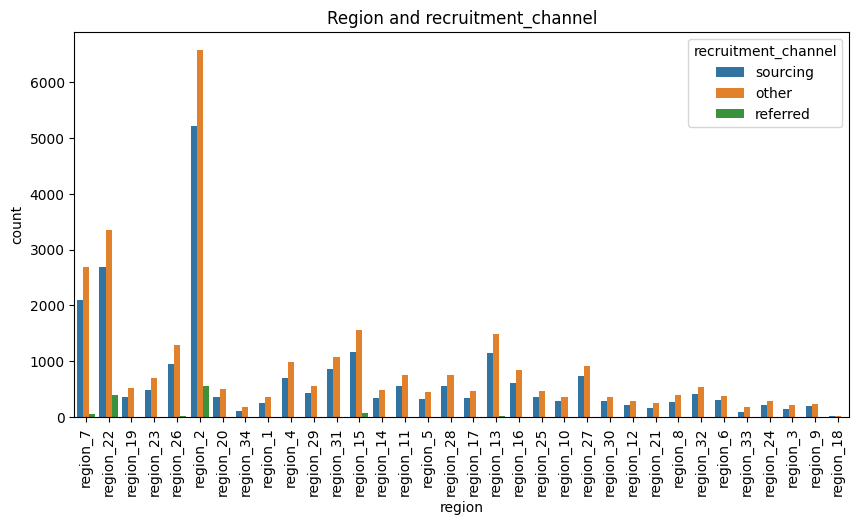

In [82]:
#Bivariate analysis of categorical columns and region column
for feature in cat_data:
    df1 = df.copy()
    if feature == 'department' or feature == 'region' :
        pass
    else:
        sns.countplot(data = df1,x = 'region',hue = df1[feature])
        plt.title('Region' + ' and ' + feature)
        plt.xticks(rotation = 90)
        plt.show()

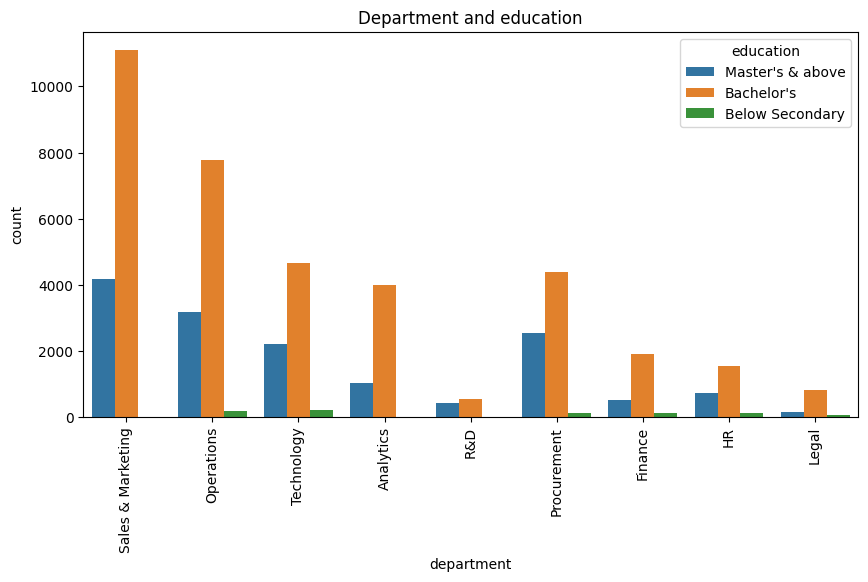

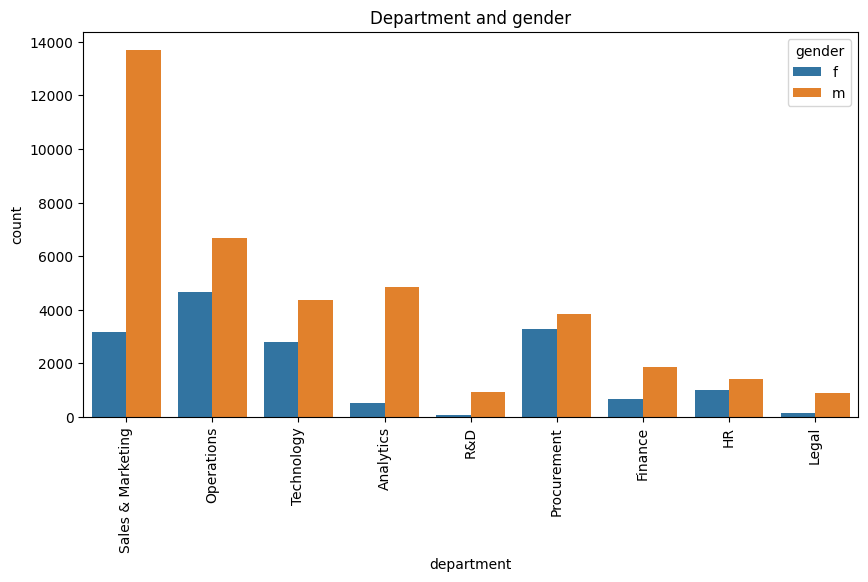

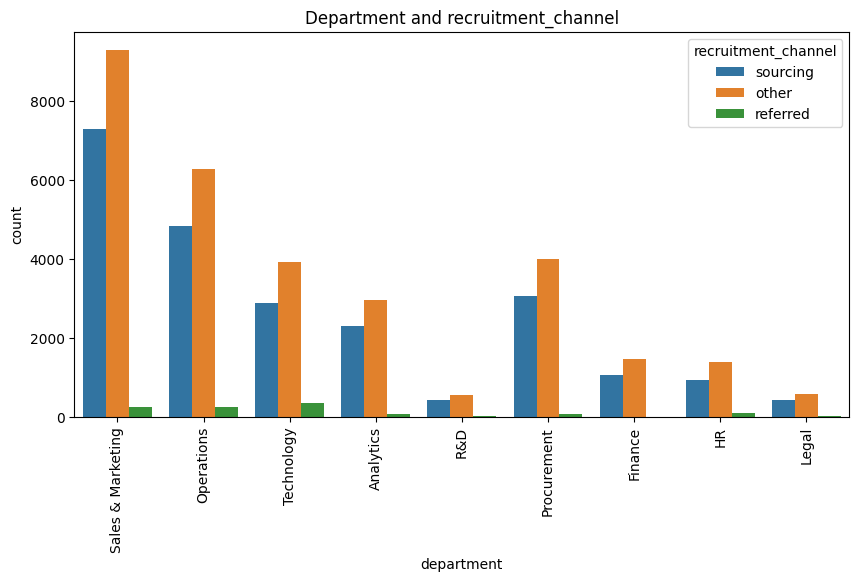

In [83]:
#Bivariate analysis of categorical columns and department column
for feature in cat_data:
    df1 = df.copy()
    if feature == 'department' or feature == 'region':
        pass
    else:
        sns.countplot(data = df1,x = 'department',hue = df1[feature])
        plt.title('Department' + ' and ' + feature)
        plt.xticks(rotation = 90)
        plt.show()

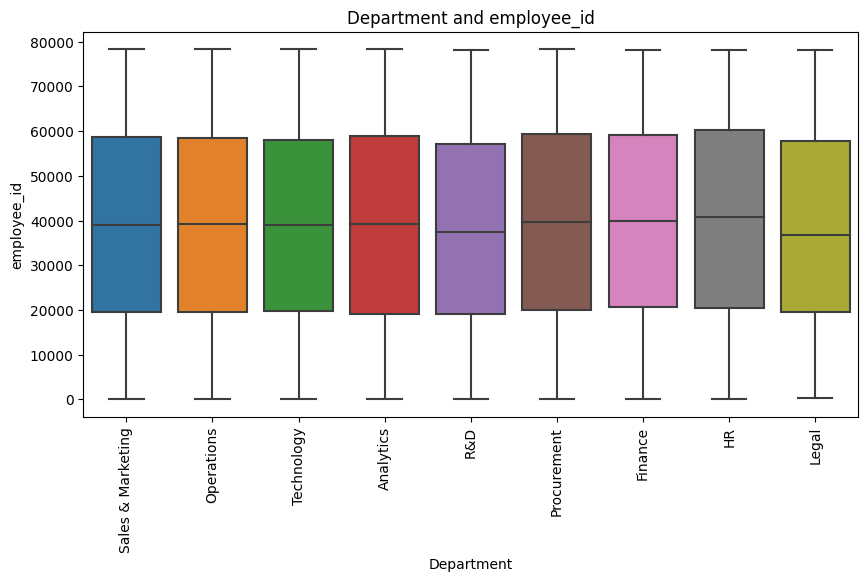

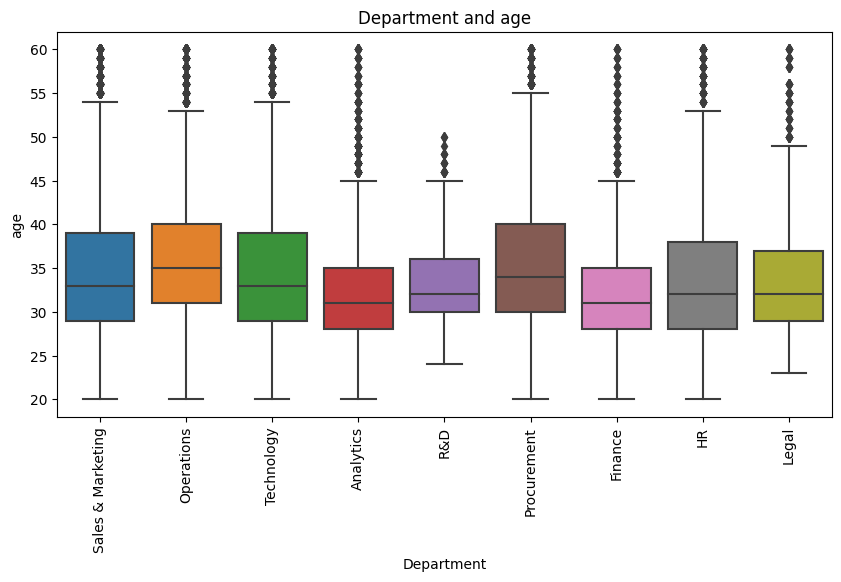

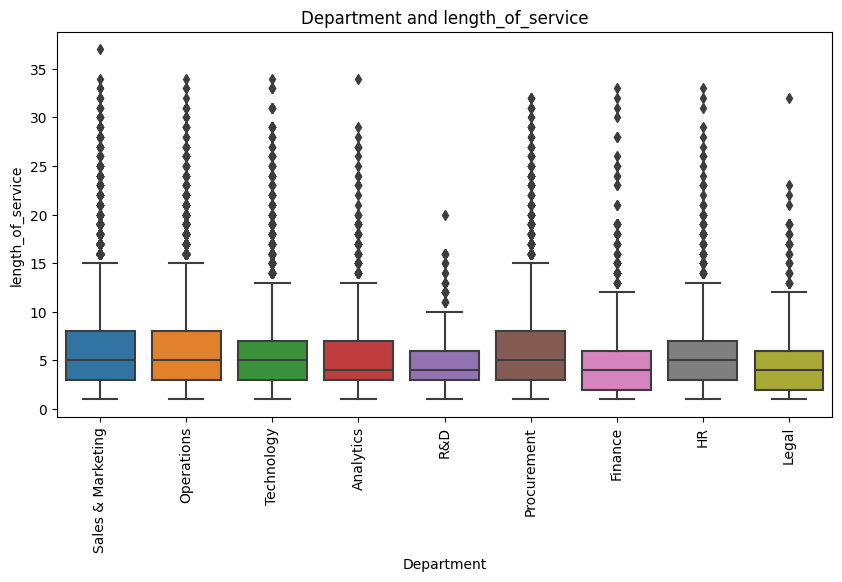

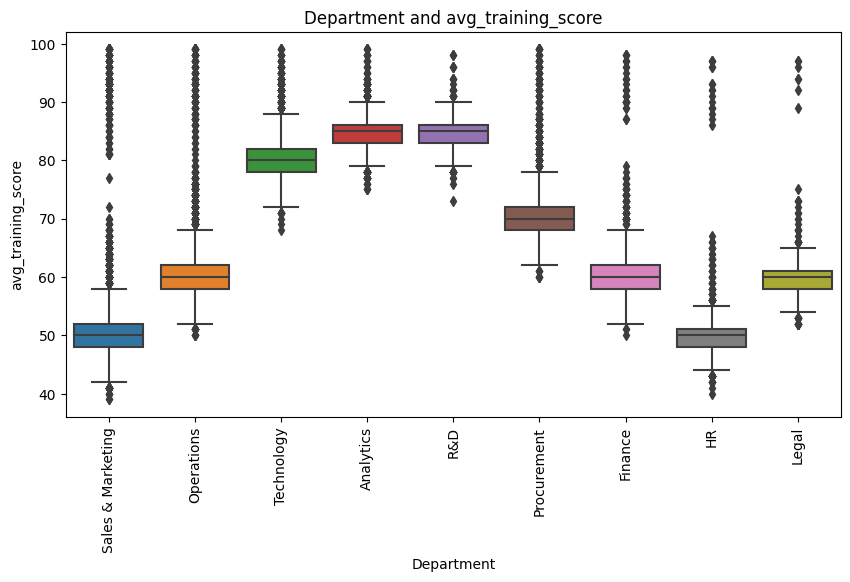

In [84]:
#Bivariate analysis of continuous columns and department column
for feature in num_data:
    df1 = df.copy()
    if len(df1[feature].unique())<12:
        pass
    else:
        sns.boxplot(x='department', y=df1[feature], data=df1)
        plt.title('Department and ' + feature)
        plt.xlabel('Department')
        plt.ylabel(feature)
        plt.xticks(rotation=90)
        plt.show()

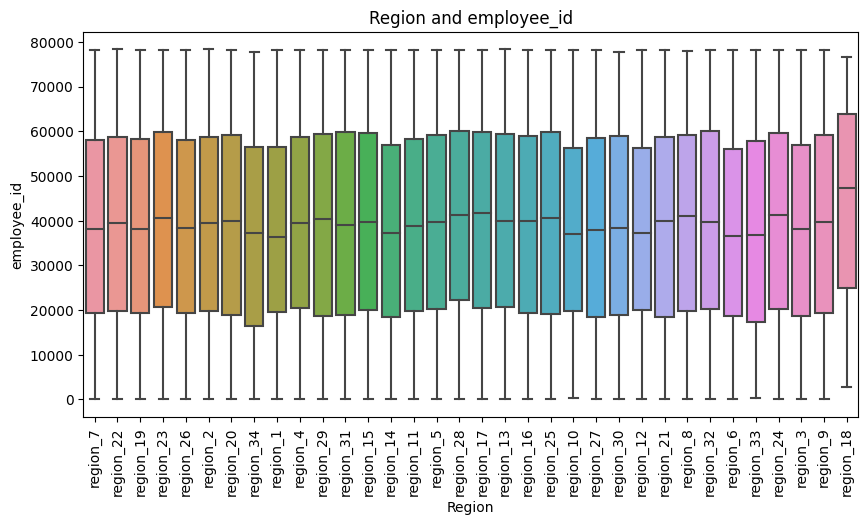

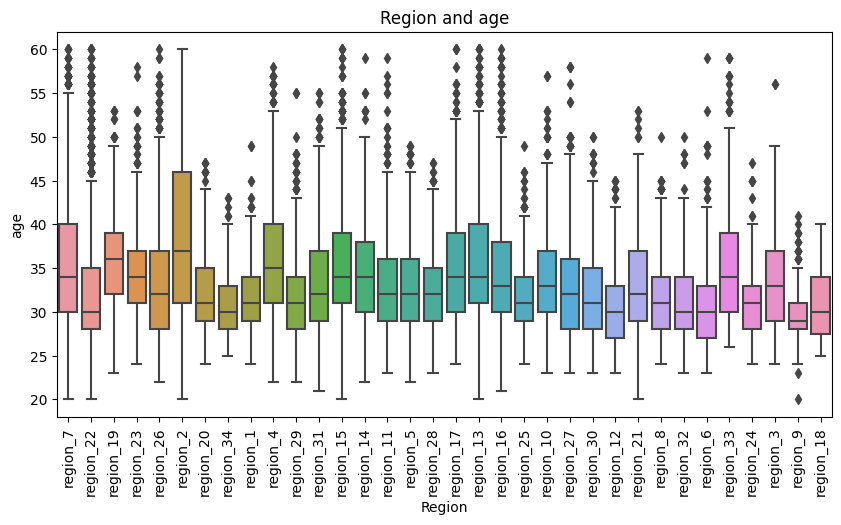

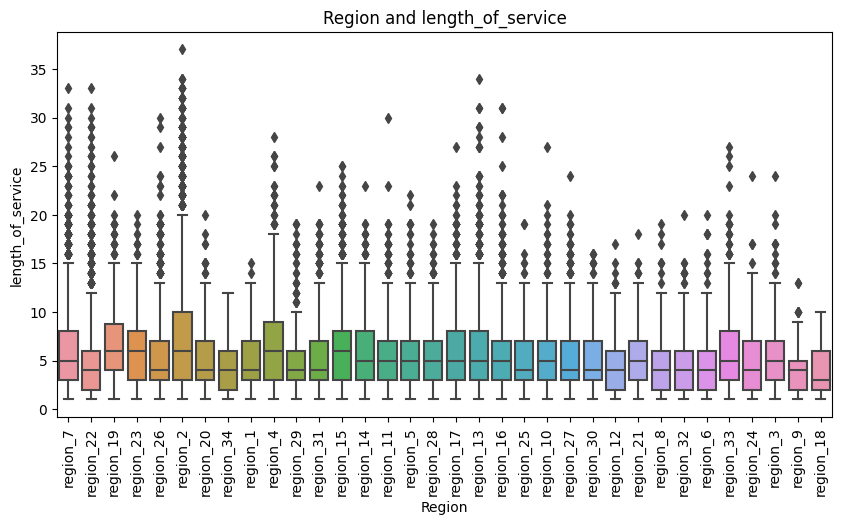

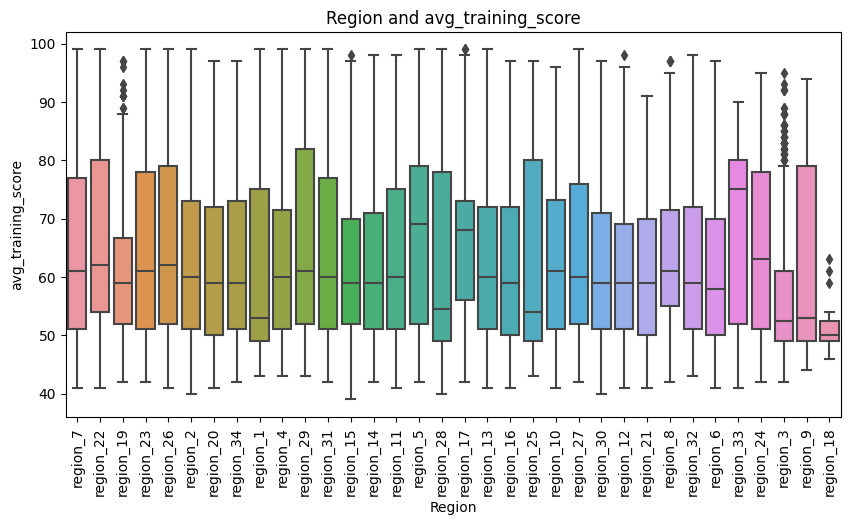

In [85]:
##Bivariate analysis of continuous columns and region column
for feature in num_data:
    df1 = df.copy()
    if len(df1[feature].unique())<12:
        pass
    else:
        sns.boxplot(x='region', y=df1[feature], data=df1)
        plt.title('Region and ' + feature)
        plt.xlabel('Region')
        plt.ylabel(feature)
        plt.xticks(rotation=90)
        plt.show()

In [86]:
Hr_data = df
cat_data = [features for features in Hr_data.columns if Hr_data[features].dtypes == 'O']
num_data = [features for features in Hr_data.columns if Hr_data[features].dtypes != 'O']
discrete_col =  [feature for feature in num_data if len(Hr_data[feature].unique())<11]
conti_col = [feature for feature in num_data if feature not in discrete_col]

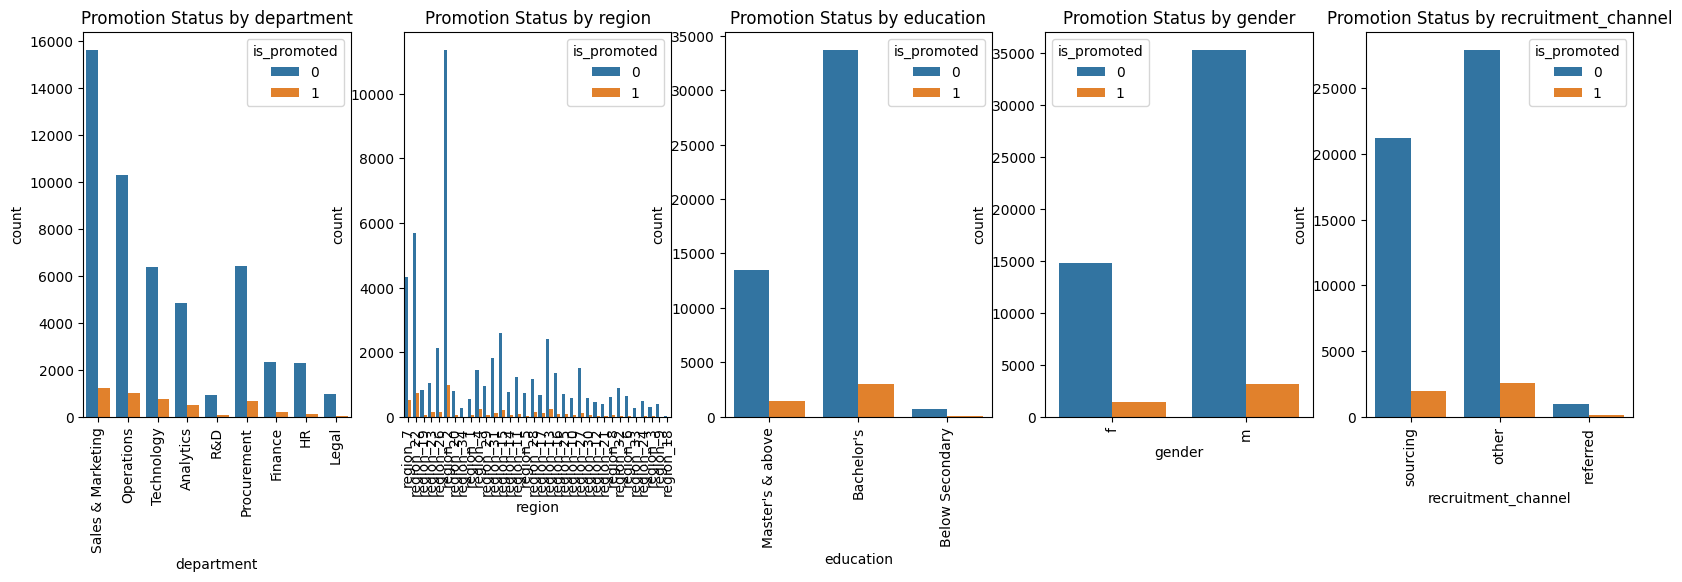

In [87]:
fig, axs = plt.subplots(ncols=len(cat_data), figsize=(20, 5))

for i, feature in enumerate(cat_data):

        sns.countplot(x=df[feature], hue=df['is_promoted'], data=df, ax=axs[i])
        axs[i].set_title('Promotion Status by '+ feature)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
        axs[i].set_xlabel(feature)


plt.show()


Text(0.5, 0, 'Region')

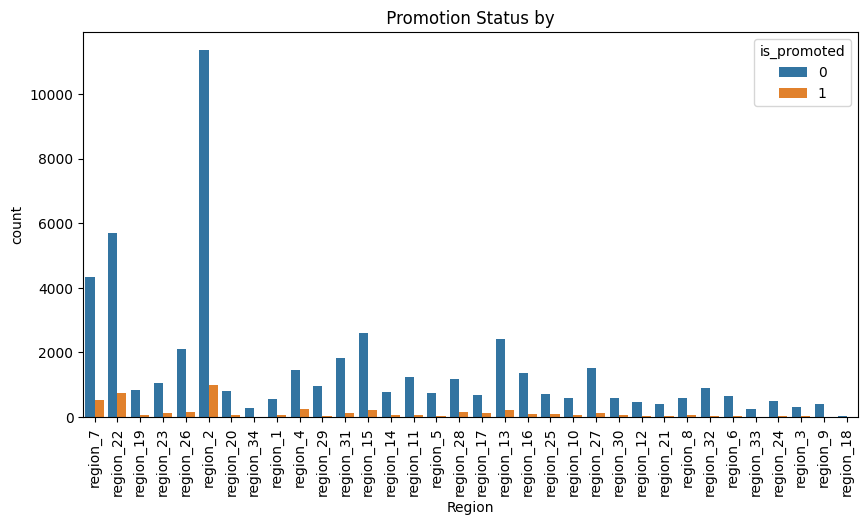

In [88]:
sns.countplot(x=df['region'], hue=df['is_promoted'], data=df, )
plt.title(' Promotion Status by ')
plt.xticks( rotation=90)
plt.xlabel('Region')

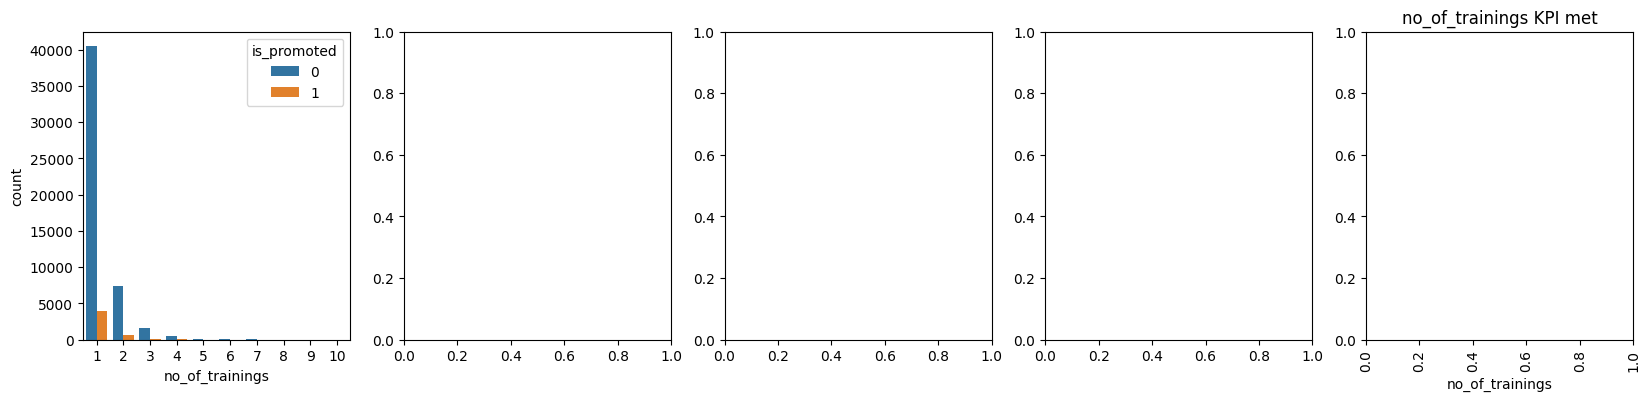

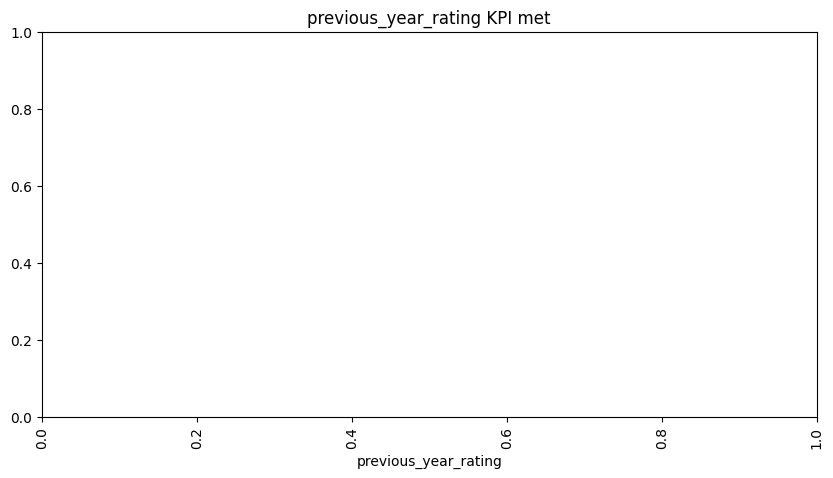

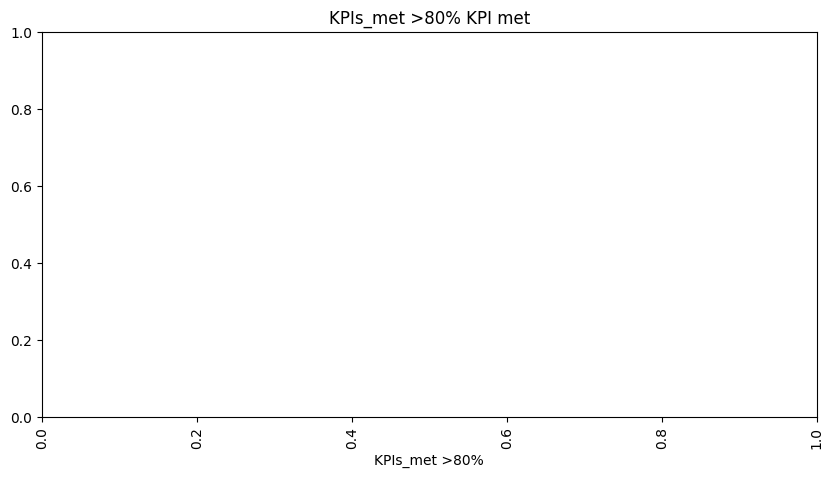

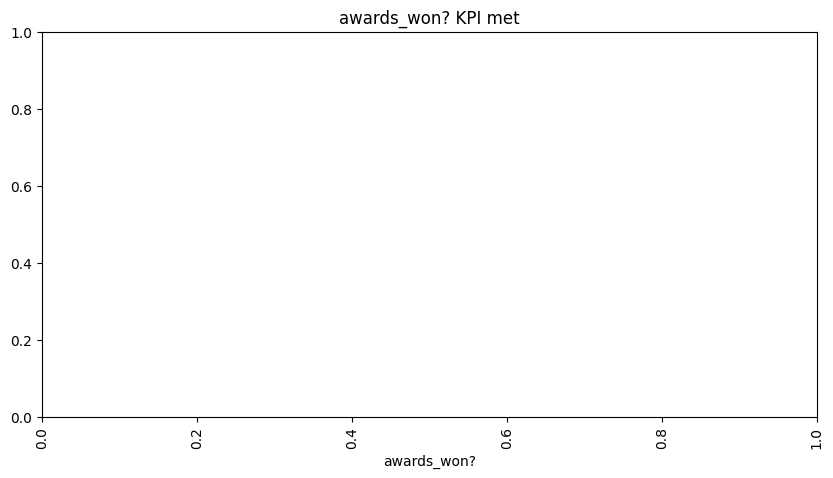

In [89]:
fig, axs = plt.subplots(ncols=len(discrete_col), figsize=(20, 4))

for i, feature in enumerate(discrete_col):

    if feature == 'is_promoted':
        pass
    else:

        sns.countplot(x=df[feature], hue=df['is_promoted'], data=df, ax=axs[i])
        plt.title(feature + ' KPI met')
        plt.xticks( rotation=90)
        plt.xlabel(feature)


        plt.show()

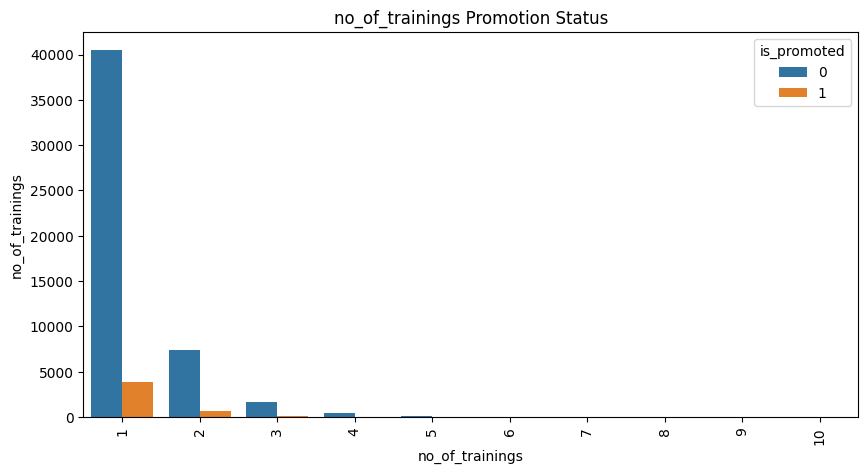

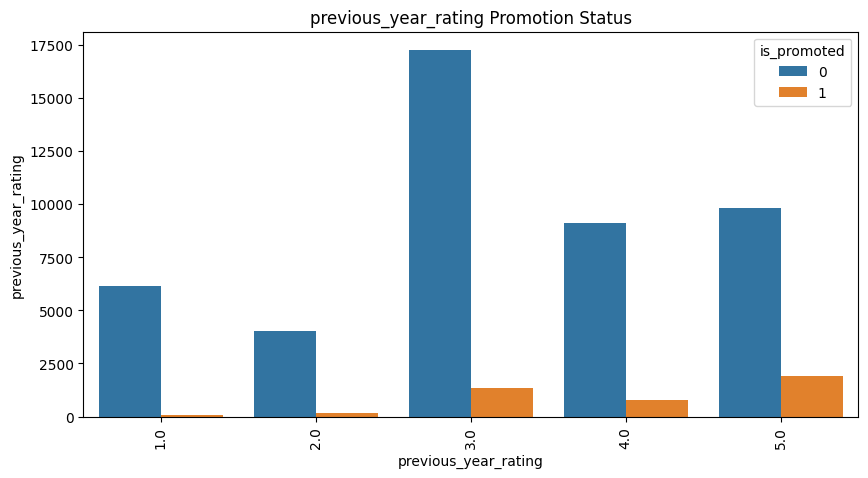

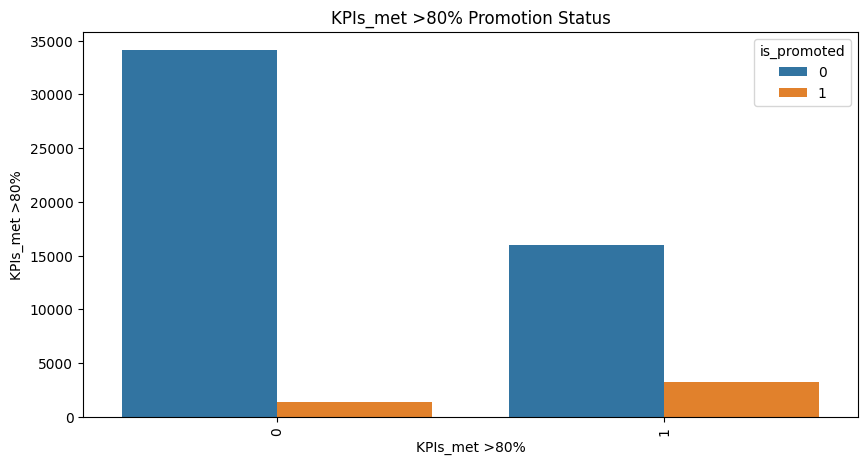

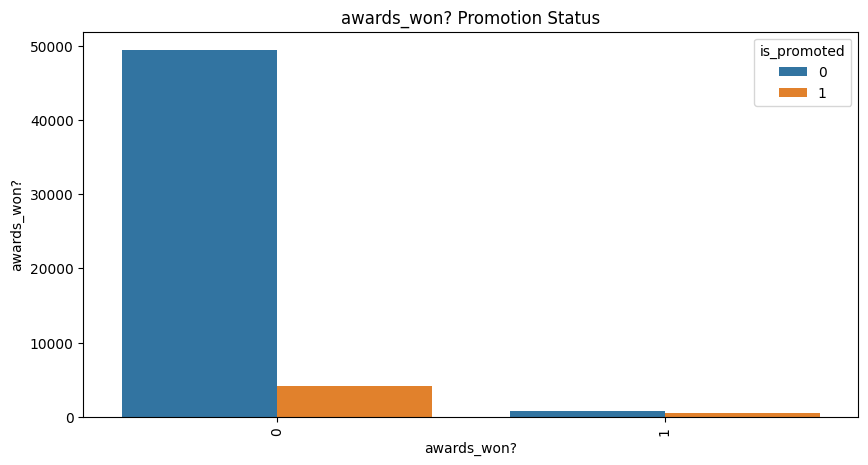

In [90]:
for feature in discrete_col:
    if feature == 'is_promoted':
        pass
    else:
        data = df.copy().sort_values('no_of_trainings',ascending=True)
        sns.countplot(x= data[feature],hue = data['is_promoted'],data = df)
        plt.title(feature + ' Promotion Status')
        plt.ylabel(feature)
        plt.xticks(rotation = 90)
        plt.show()

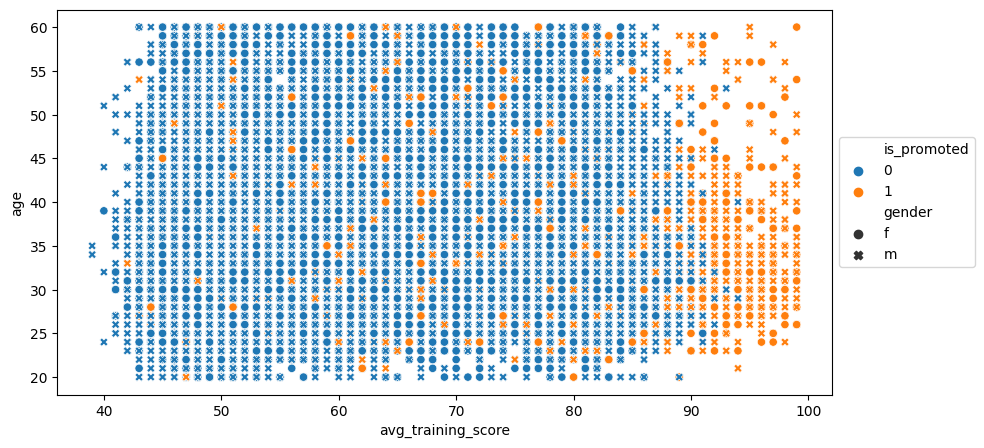

In [91]:
ax =sns.scatterplot(x = df['avg_training_score'],y = df['age'],hue= df['is_promoted'],style=df['gender'])
box = ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

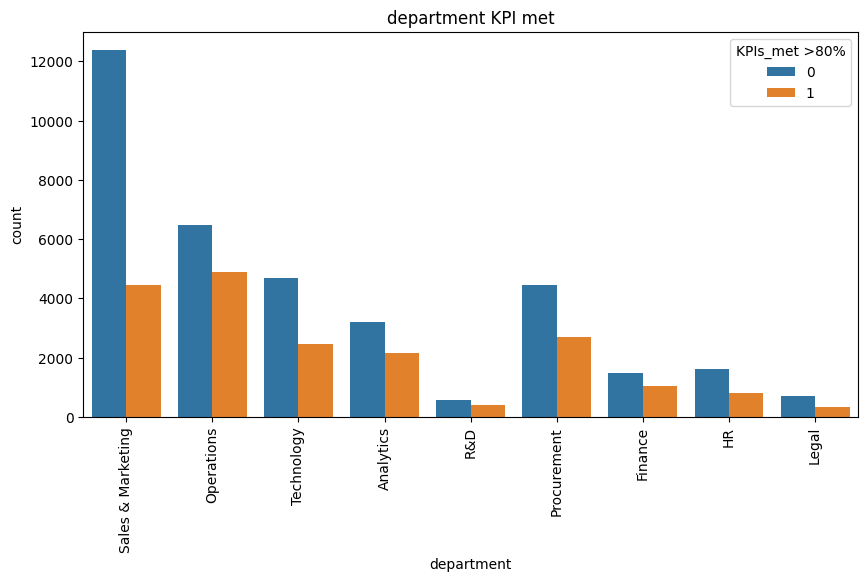

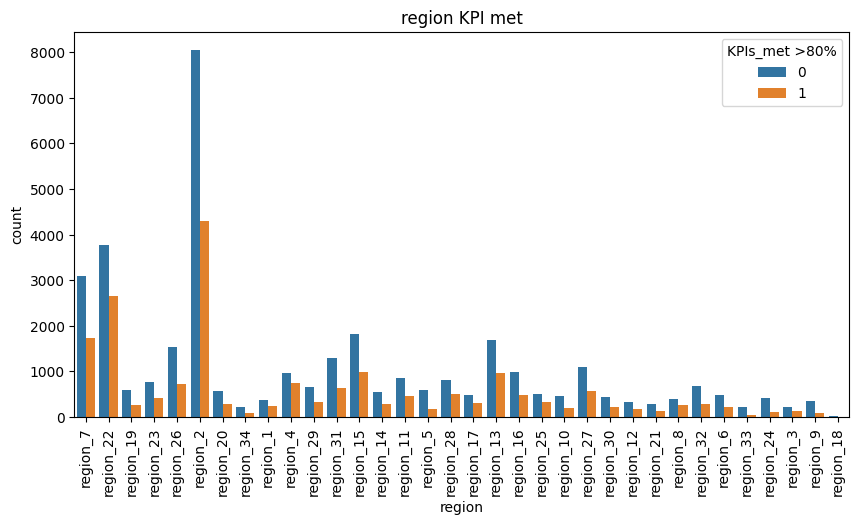

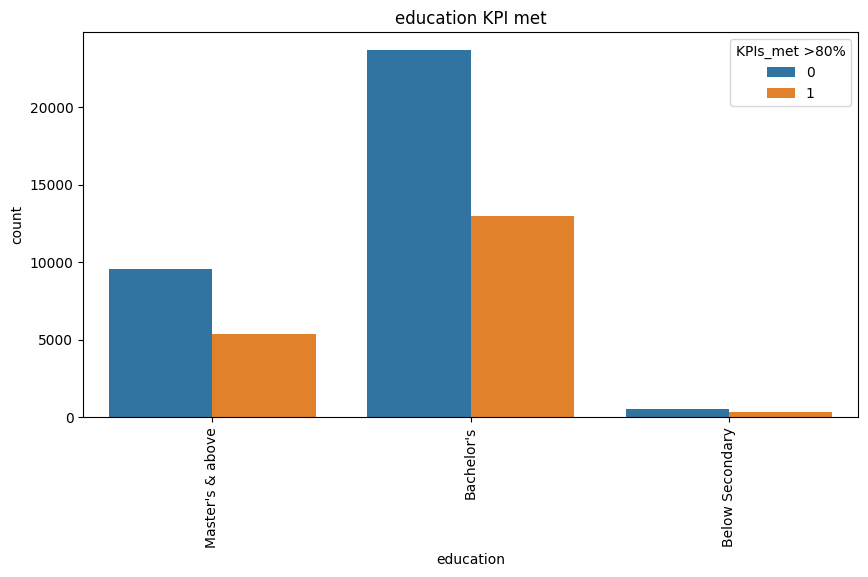

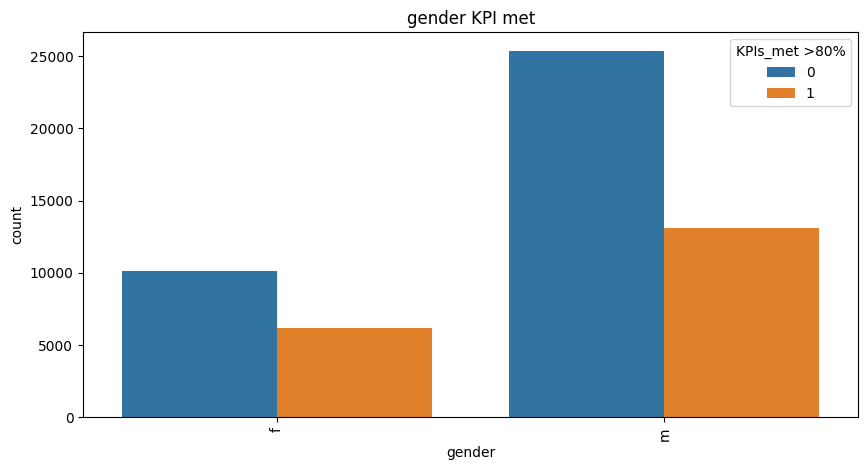

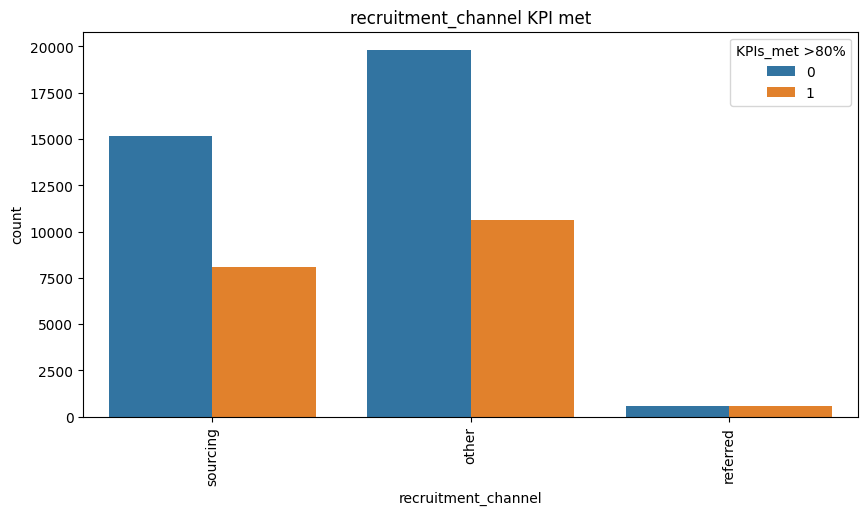

In [92]:
for feature in cat_data:
    data = df.copy()

    sns.countplot(x= data[feature],hue= data['KPIs_met >80%'],data = data)
    plt.title(feature + ' KPI met')

    plt.xticks(rotation = 90)
    plt.xlabel(feature)

    plt.show()

Text(0.5, 1.0, 'Age vs Promotion')

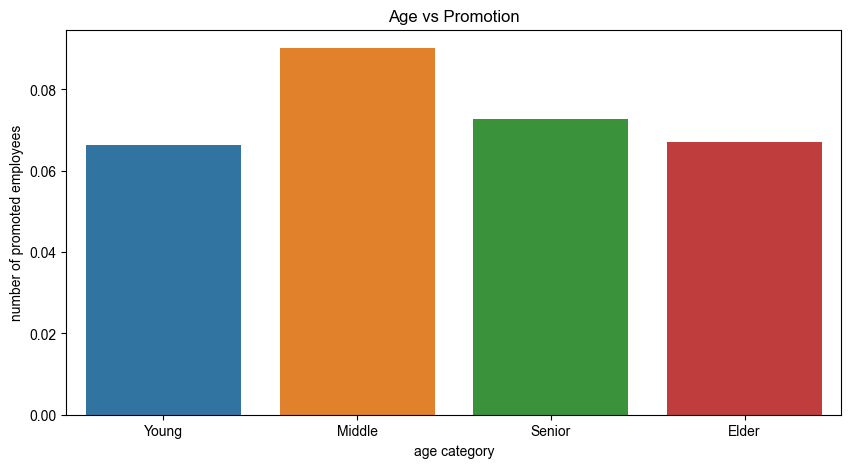

In [93]:
##Relationship between Age and Promotion
##the age column is divided into 4bins (categories) :-Young - Less than 25 years,Middle - 25 to 40 years,Senior - 40 to 50 years,Elder - 50 years or older
df['age'] = pd.cut(df.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
ages = df.pivot_table(values='is_promoted',index='age')
ax = sns.barplot(x=ages.index,y=ages.is_promoted)
ax.grid(False)
sns.set(style='whitegrid')
plt.ylabel('number of promoted employees')
plt.xlabel('age category')
plt.title('Age vs Promotion')

In [94]:


def create_stacked_bar(column_name):

    promo_by_group = pd.crosstab(index=df['is_promoted'],columns = df[column_name], normalize = 'columns')
    promo_by_group = promo_by_group.apply(lambda x: round(x,2))

    labels = promo_by_group.columns
    list1 = promo_by_group.iloc[0].to_list()
    list2 = promo_by_group.iloc[1].to_list()

    list1_name = "Not promoted"
    list2_name = "Promoted"
    title = f"Promotion by {column_name}"
    xlabel = column_name
    ylabel = "Promotion percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

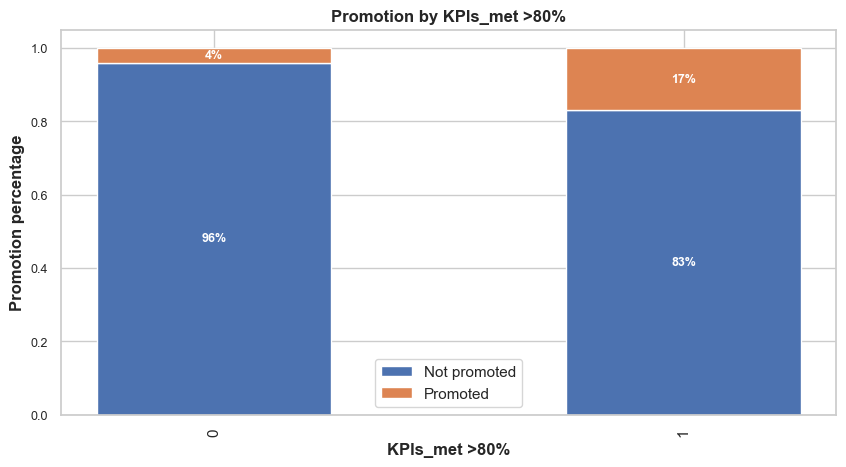

In [95]:
create_stacked_bar('KPIs_met >80%')

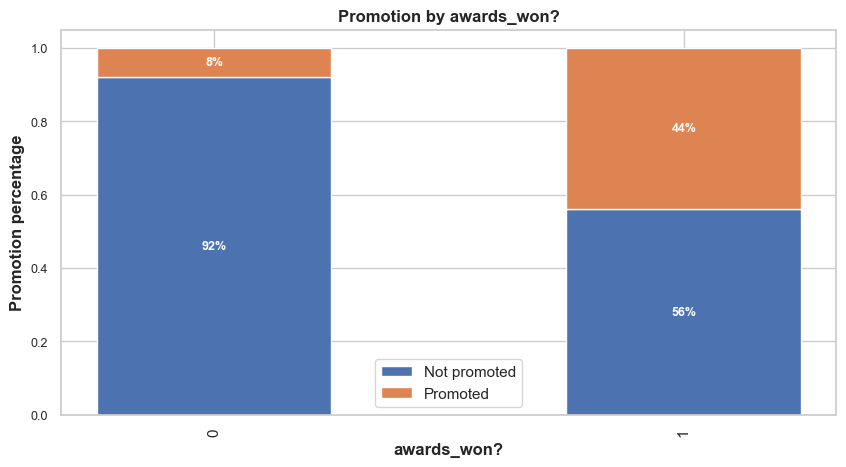

In [96]:
create_stacked_bar('awards_won?')

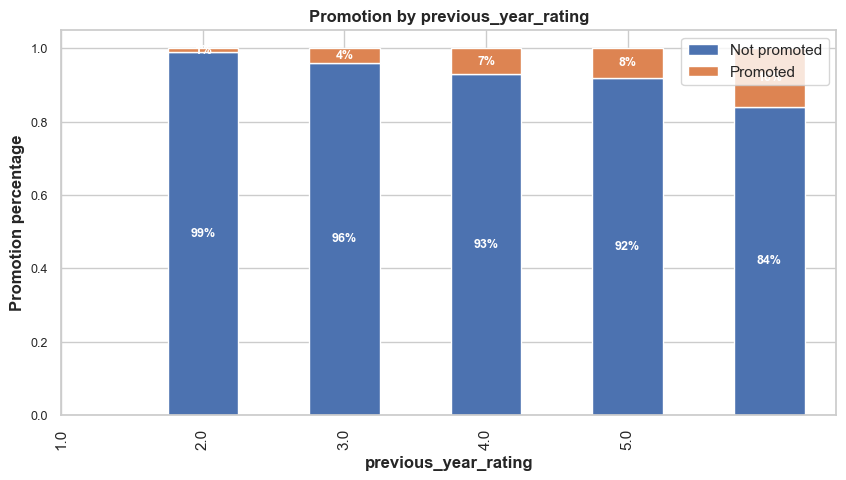

In [97]:
create_stacked_bar('previous_year_rating')

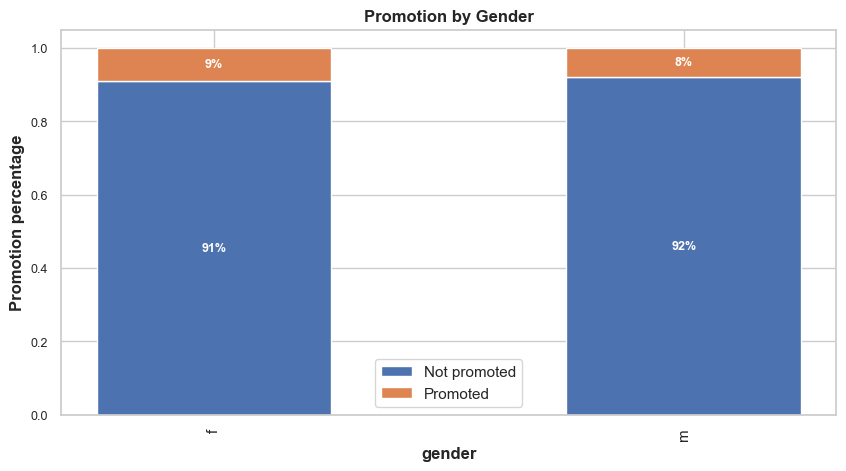

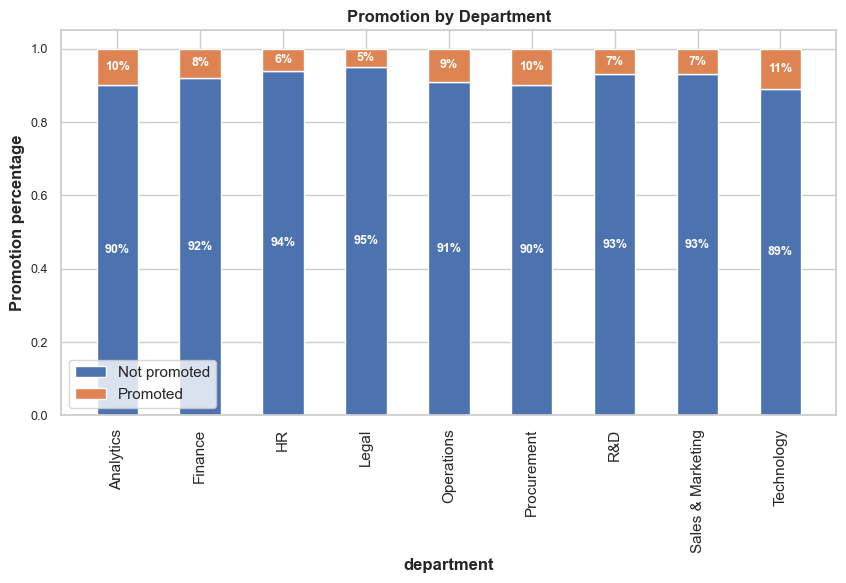

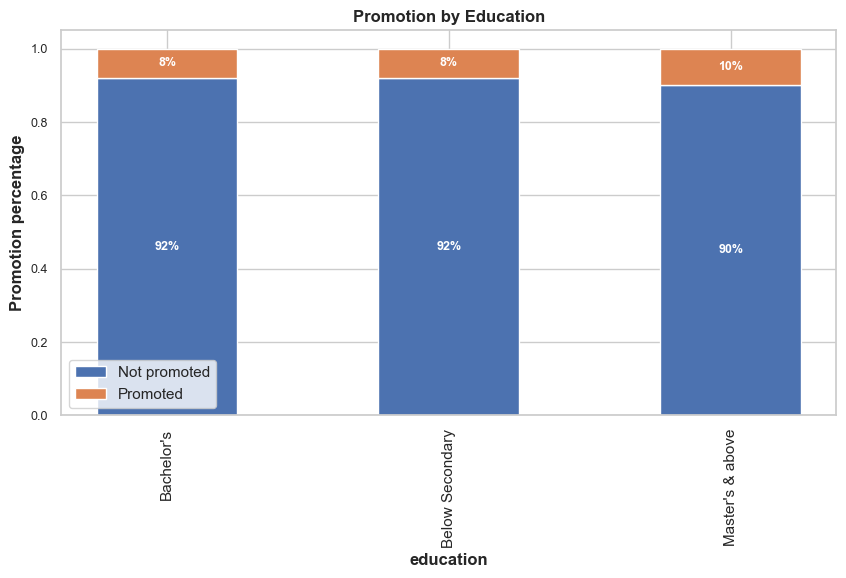

In [98]:
columns = ["gender", "department", "education"]

for column_name in columns:
    if column_name in ["gender", "department", "education"]:
        promo_by_group = pd.crosstab(index=df['is_promoted'],columns=df[column_name], normalize='columns')
        promo_by_group = promo_by_group.apply(lambda x: round(x, 2))

        labels = promo_by_group.columns
        list1 = promo_by_group.iloc[0].to_list()
        list2 = promo_by_group.iloc[1].to_list()

        list1_name = "Not promoted"
        list2_name = "Promoted"
        title = f"Promotion by {column_name.capitalize()}"
        xlabel = column_name
        ylabel = "Promotion percentage"

        fig, ax = plt.subplots(figsize=(10, 5))
        bar_width = 0.5

        ax1 = ax.bar(labels, list1, bar_width, label=list1_name)
        ax2 = ax.bar(labels, list2, bar_width, bottom=list1, label=list2_name)

        ax.set_title(title, fontweight="bold")
        ax.set_xlabel(xlabel, fontweight="bold")
        ax.set_ylabel(ylabel, fontweight="bold")
        ax.legend(loc="best")

        plt.xticks(list(range(len(labels))), labels, rotation=90)
        plt.yticks(fontsize=9)

        for r1, r2 in zip(ax1, ax2):
            h1 = r1.get_height()
            h2 = r2.get_height()
            plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
            plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

        plt.show()
    else:
        print("Invalid column name. Please choose from 'gender', 'department', or 'education'.")

In [99]:
Hr_data = df.drop('employee_id',axis = 1)
cat_data = [features for features in Hr_data.columns if Hr_data[features].dtypes == 'O']
num_data = [features for features in Hr_data.columns if Hr_data[features].dtypes != 'O']
discrete_col =  [feature for feature in num_data if len(Hr_data[feature].unique())<11]
conti_col = [feature for feature in num_data if feature not in discrete_col]

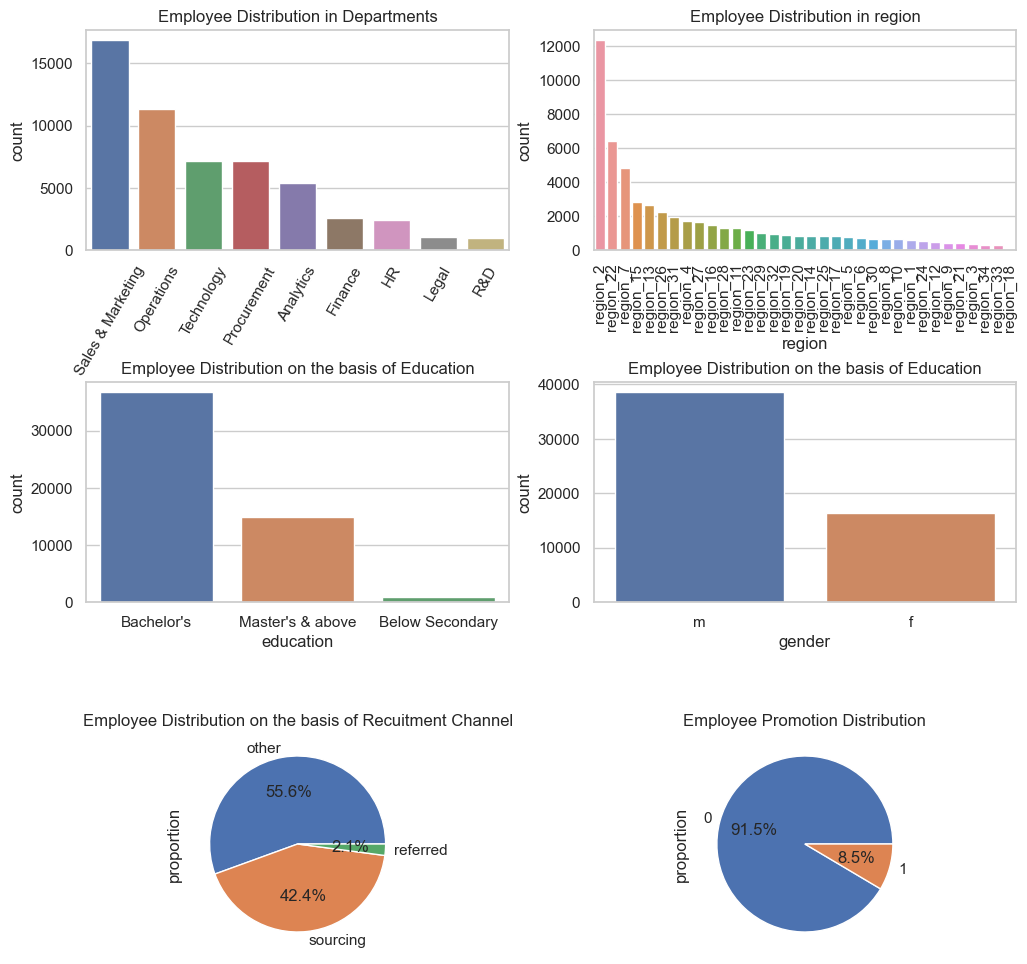

In [100]:
# Univariate Analysis
# figure with 3 rows and 2 columns

fig, axes = plt.subplots(3, 2, figsize=(12,12),)




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.6)

# countplot for department in the first row, first column
sns.countplot(data=df, x='department', ax=axes[0,0],order=df['department'].value_counts().index)
axes[0,0].set_title('Employee Distribution in Departments')

# countplot for region in the first row, second column
sns.countplot(data=df, x='region', ax=axes[0,1],order=df['region'].value_counts().index)
axes[0,1].set_title('Employee Distribution in region')

# countplot for education in the second row, first column
sns.countplot(data=df, x='education', ax=axes[1,0],order=df['education'].value_counts().index)
axes[1,0].set_title('Employee Distribution on the basis of Education')

# countplot for gender in the second row, second column
sns.countplot(data=df, x='gender', ax=axes[1,1],order=df['gender'].value_counts().index)
axes[1,1].set_title('Employee Distribution on the basis of Education')

# countplot for recruitment_channel in the third row, first column
df['recruitment_channel'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[2,0],)
axes[2,0].set_title('Employee Distribution on the basis of Recuitment Channel')

# countplot for recruitment_channel in the third row, second column
df['is_promoted'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[2,1])


axes[2,1].set_title('Employee Promotion Distribution')

# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

plt.show()

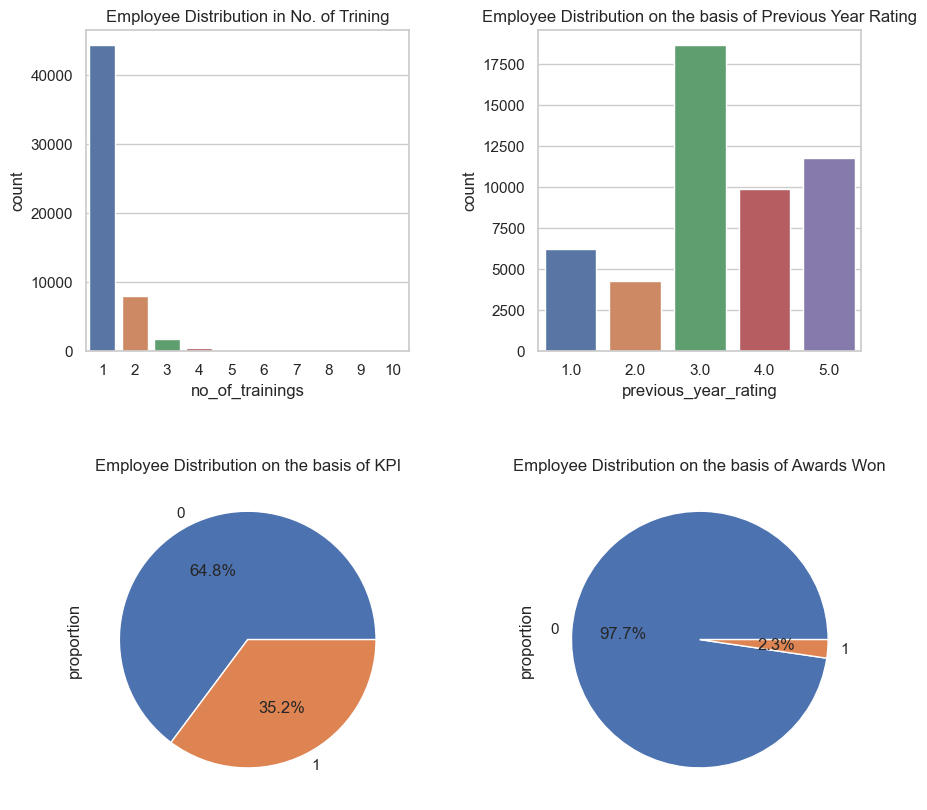

In [101]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))



# Adjusting space between plots
plt.subplots_adjust(wspace=0.4,hspace= 0.4)

# countplot for no_of_trainings in the first row, first column
sns.countplot(data=df, x='no_of_trainings', ax=axes[0,0])
axes[0,0].set_title('Employee Distribution in No. of Trining')

# countplot for previous_year_rating in the first row, second column
sns.countplot(data=df, x='previous_year_rating', ax=axes[0,1])
axes[0,1].set_title('Employee Distribution on the basis of Previous Year Rating')

# countplot for 'KPIs_met >80%' in the second row, first column
df['KPIs_met >80%'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[1,0])
axes[1,0].set_title('Employee Distribution on the basis of KPI')

# countplot for Awards Won in the second row, second column
df['awards_won?'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax= axes[1,1])
axes[1,1].set_title('Employee Distribution on the basis of Awards Won')


plt.show()

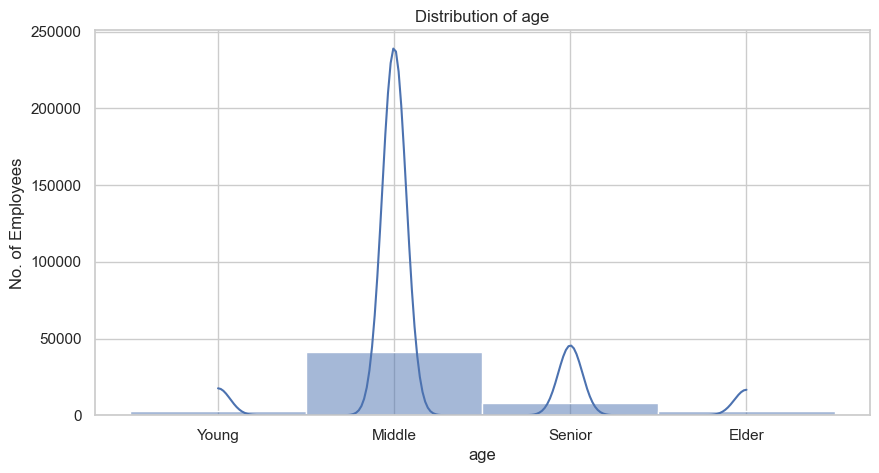

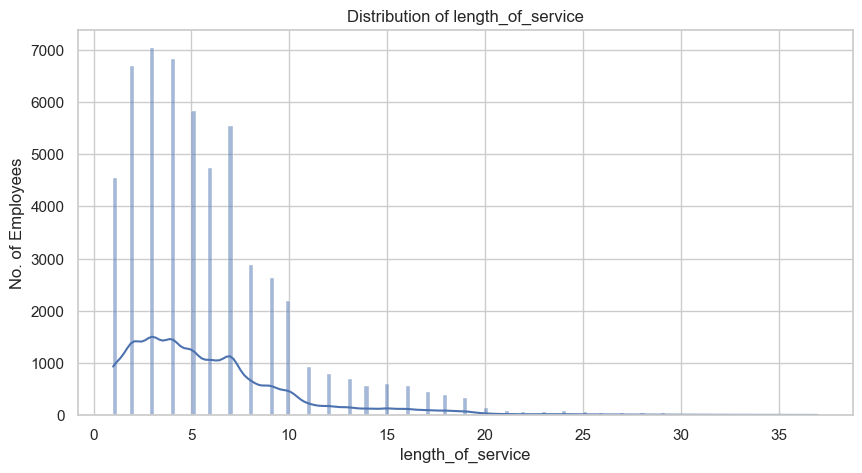

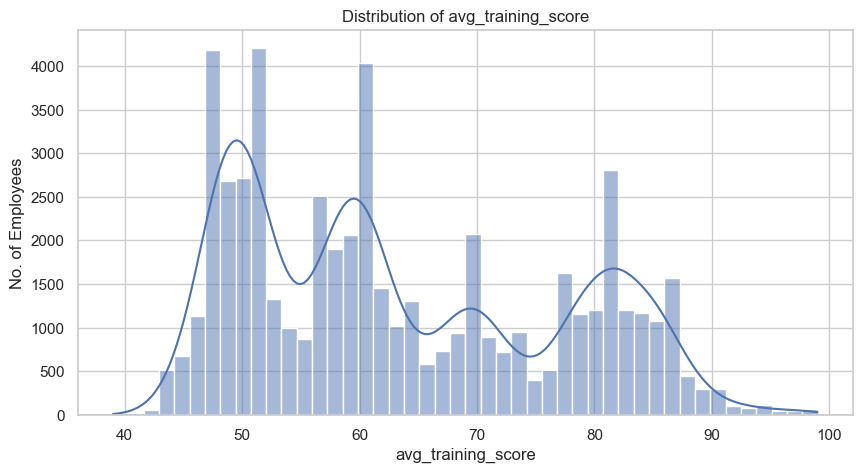

In [102]:
features = ['age', 'length_of_service', 'avg_training_score']

for feature in features:
    data = df.copy()
    sns.histplot(x=data[feature],data = data,kde=True)
    plt.title('Distribution of '+feature)
    plt.ylabel('No. of Employees')

    plt.show()

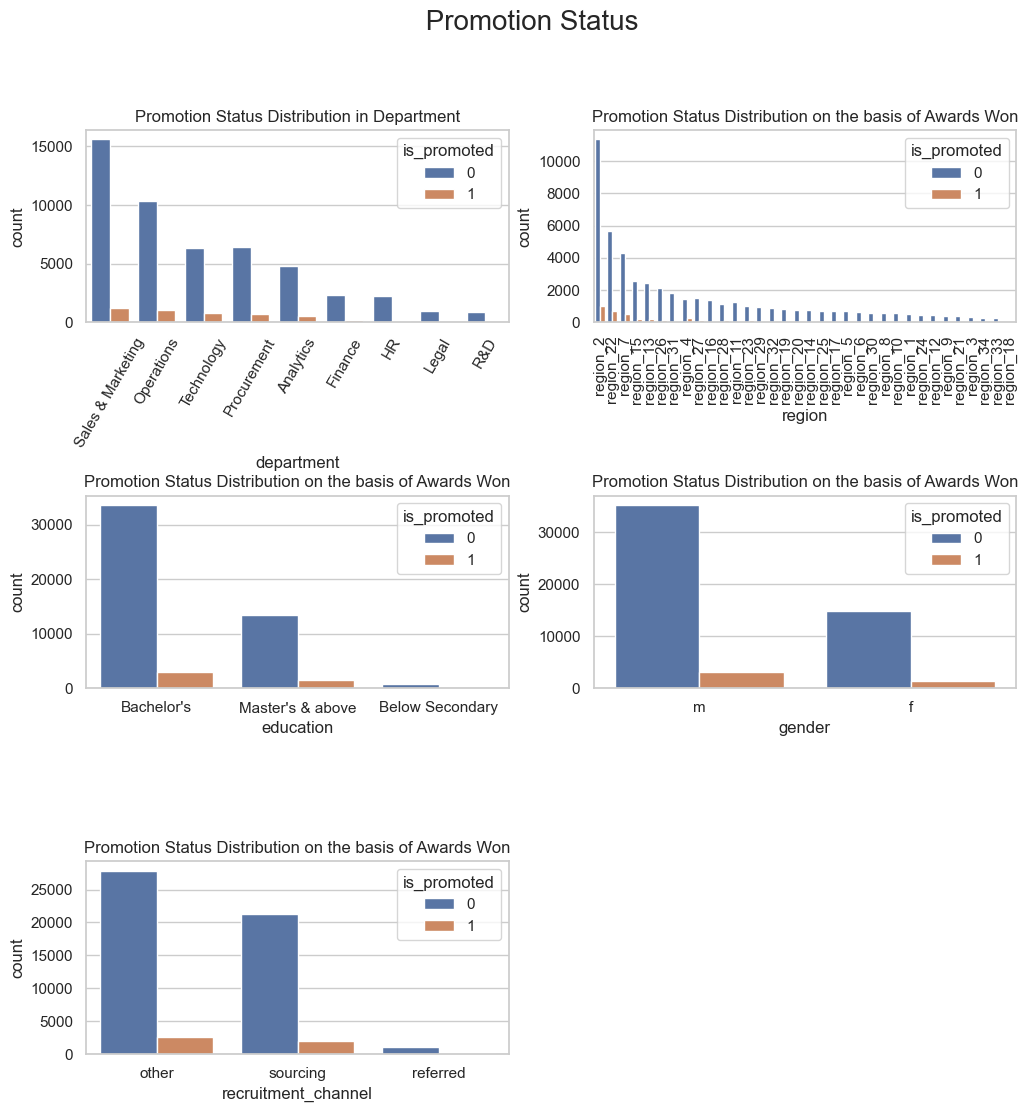

In [103]:
## Bivarite Analysis
## Promotion Status

# figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12,12),)

fig.suptitle(' Promotion Status  ', fontsize=20)


# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.9)

# countplot for department in the first row, first column
sns.countplot(data=df, x='department',hue=df['is_promoted'], ax=axes[0,0],order=df['department'].value_counts().index)
axes[0,0].set_title('Promotion Status Distribution in Department')

# countplot for region in the first row, second column
sns.countplot(data=df, x='region',hue=df['is_promoted'], ax=axes[0,1],order=df['region'].value_counts().index)
axes[0,1].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for education in the second row, first column
sns.countplot(data=df, x='education',hue=df['is_promoted'], ax=axes[1,0],order=df['education'].value_counts().index)
axes[1,0].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for gender in the second row, second column
sns.countplot(data=df, x='gender',hue=df['is_promoted'], ax=axes[1,1],order=df['gender'].value_counts().index)
axes[1,1].set_title('Promotion Status Distribution on the basis of Awards Won')
# countplot for recruitment_channel in the third row, first column
sns.countplot(data=df, x='recruitment_channel',hue=df['is_promoted'], ax=axes[2,0],order=df['recruitment_channel'].value_counts().index)
axes[2,0].set_title('Promotion Status Distribution on the basis of Awards Won')

# deleting unused plot
fig.delaxes(axes[2,1])


# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

plt.show()

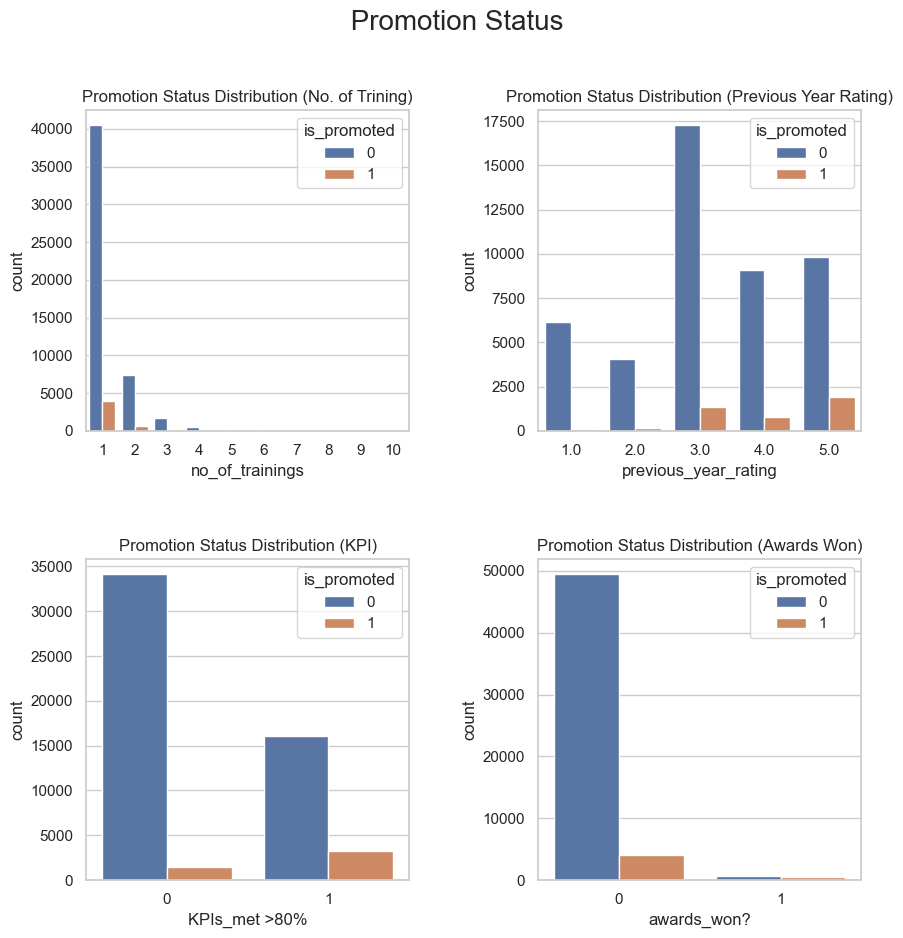

In [104]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle(' Promotion Status  ', fontsize=20)

# Adjusting space between plots
plt.subplots_adjust(wspace=0.4,hspace= 0.4)

# countplot for no_of_trainings in the first row, first column
sns.countplot(data=df, x='no_of_trainings',hue=df['is_promoted'],ax=axes[0,0])
axes[0,0].set_title('Promotion Status Distribution (No. of Trining)')

# countplot for previous_year_rating in the first row, second column
sns.countplot(data=df, x='previous_year_rating',hue=df['is_promoted'], ax=axes[0,1])
axes[0,1].set_title('Promotion Status Distribution (Previous Year Rating)')

# countplot for 'KPIs_met >80%' in the second row, first column
sns.countplot(data=df, x='KPIs_met >80%',hue=df['is_promoted'], ax=axes[1,0])
axes[1,0].set_title('Promotion Status Distribution (KPI)')

# countplot for Awards Won in the second row, second column
sns.countplot(data=df, x='awards_won?',hue=df['is_promoted'], ax=axes[1,1])
axes[1,1].set_title('Promotion Status Distribution (Awards Won)')

plt.show()

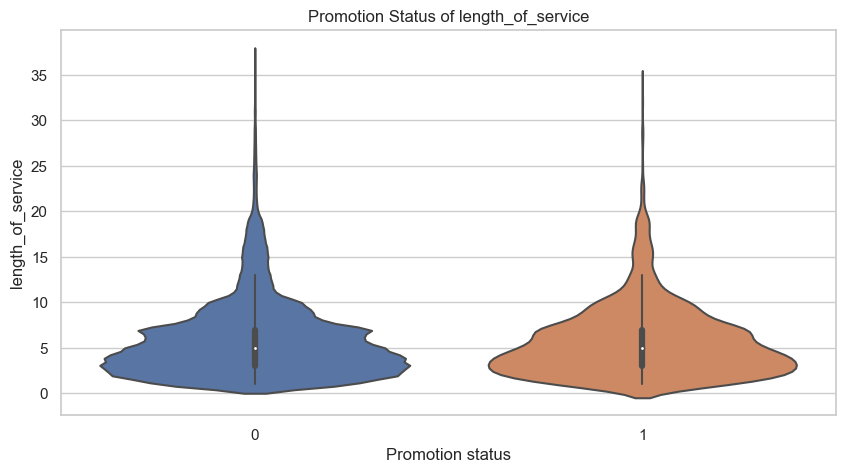

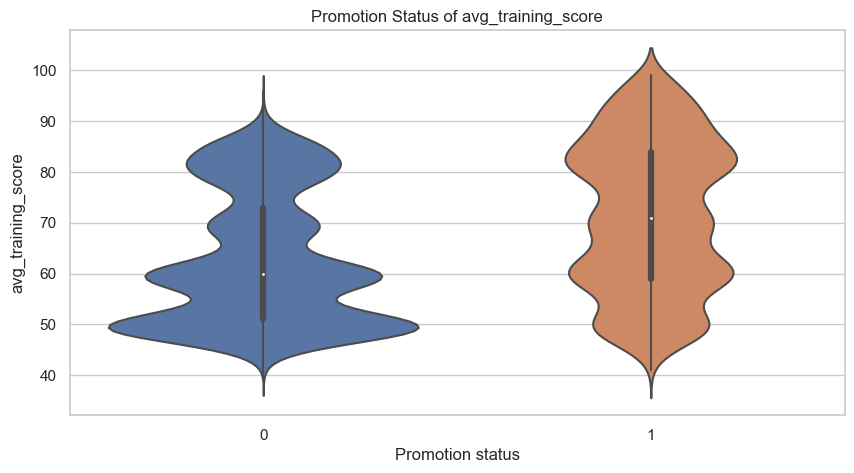

In [105]:
for feature in conti_col:

    sns.violinplot(x = data['is_promoted'],y=data[feature])
    plt.xlabel('Promotion status')
    plt.ylabel(feature)
    plt.title('Promotion Status of '+ feature)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


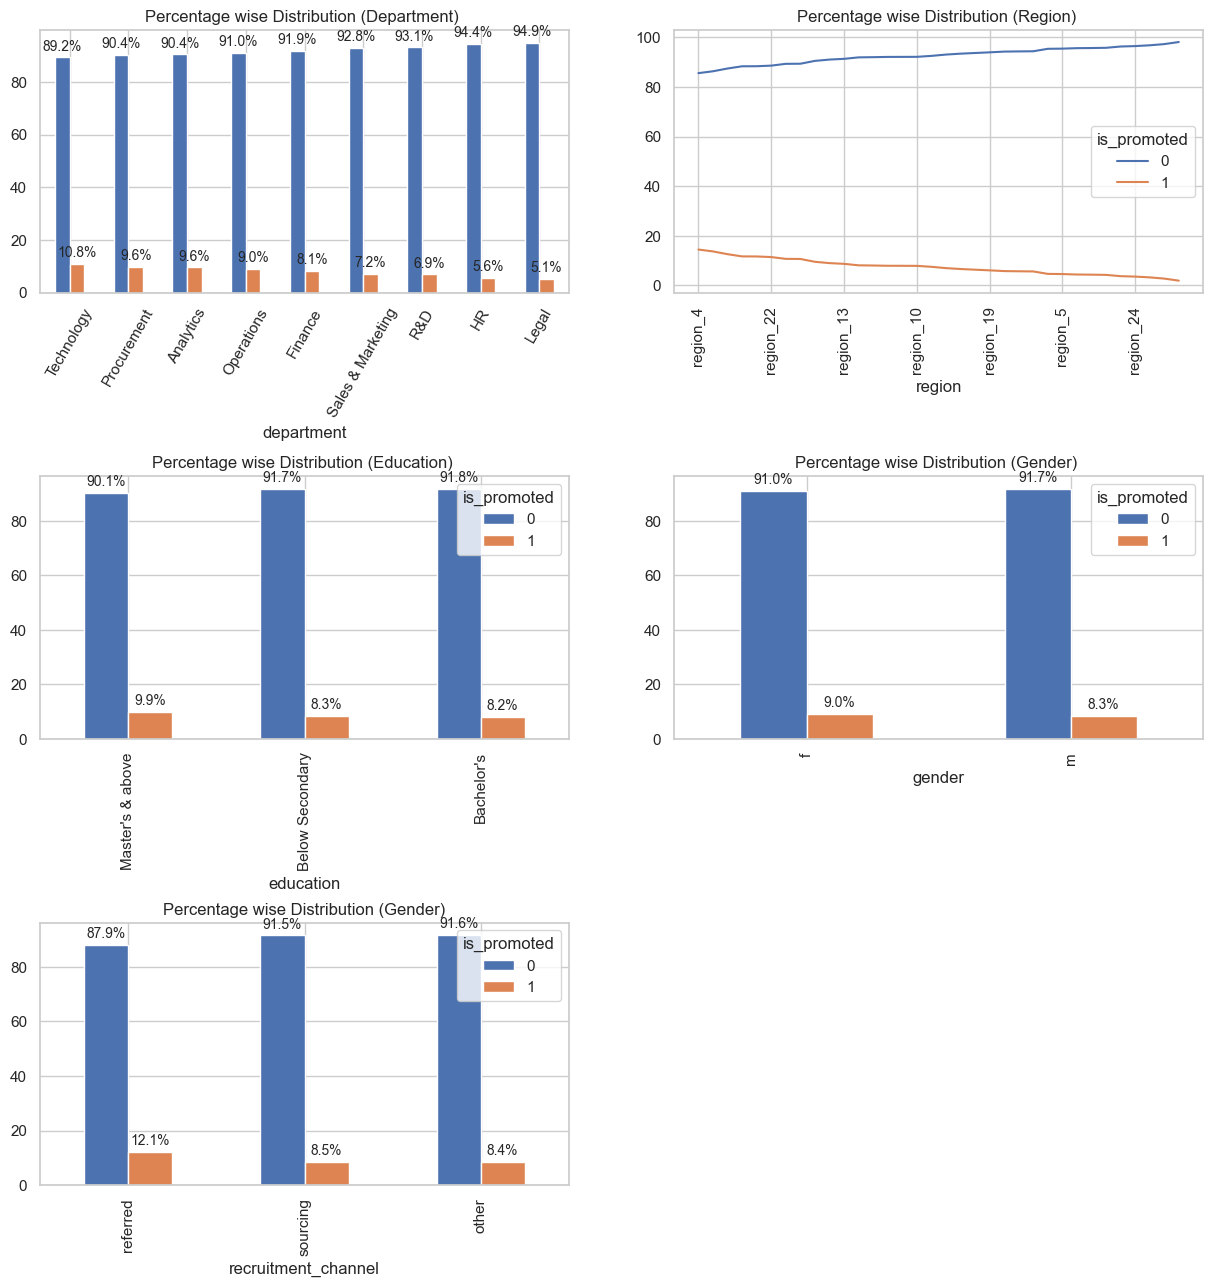

In [106]:
### Percentage wise Analysis of Promotion Status

# figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15,15))




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.7)

# plot for department in the first row, first column
data = df.copy()
stacked_data = data.pivot_table(index='department', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (Department) ')

# plot for region in the first row, second columnstacked_data = data.pivot_table(index='department', columns='is_promoted', aggfunc='size', )
data = df.copy()
stacked_data = data.pivot_table(index='region', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='line',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Region) ')

# plot for education in the second row, first column
data = df.copy()
stacked_data = data.pivot_table(index='education', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 1), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (Education) ')

# plot for gender in the second row, second column
data = df.copy()
stacked_data = data.pivot_table(index='gender', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[1,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_title('Percentage wise Distribution (Gender) ')

# plot for recruitment_channel in the third row, first column
data = df.copy()
stacked_data = data.pivot_table(index='recruitment_channel', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[2,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')

axes[2,0].set_title('Percentage wise Distribution (Gender)')

# deleting unused plot
fig.delaxes(axes[2,1])

# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[0,0].get_legend().remove()


plt.show()

Text(0.5, 1.0, 'Percentage wise Distribution (Region) ')

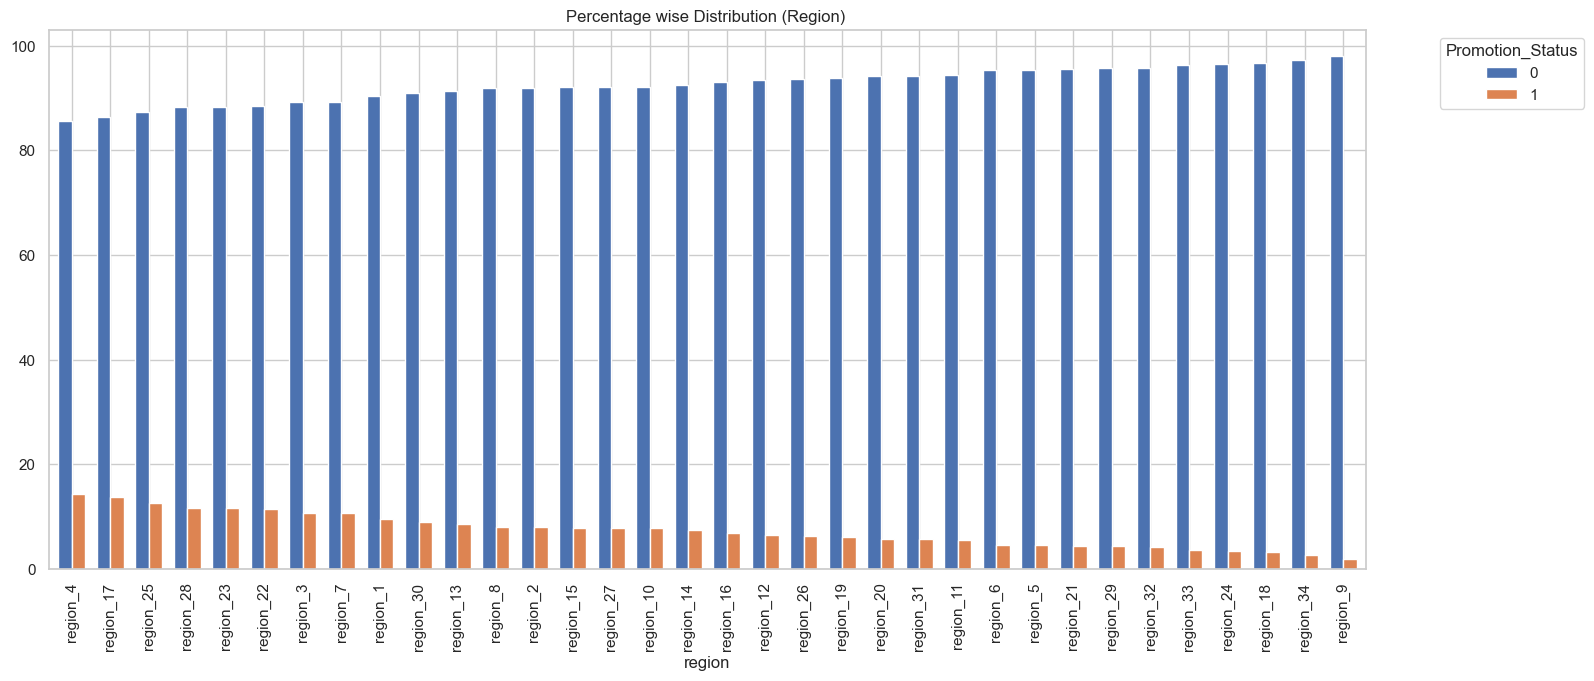

In [107]:
# plot for region in the
data = df.copy()
value = data[['is_promoted','region']].groupby(['region']).value_counts(normalize=True).unstack()
percent = value*100
percent.sort_values(by = 1,ascending = False,inplace = True)

ax = percent.plot(kind='bar',figsize=(17,7),width = 0.7)


plt.xticks(rotation=90)
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage wise Distribution (Region) ')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


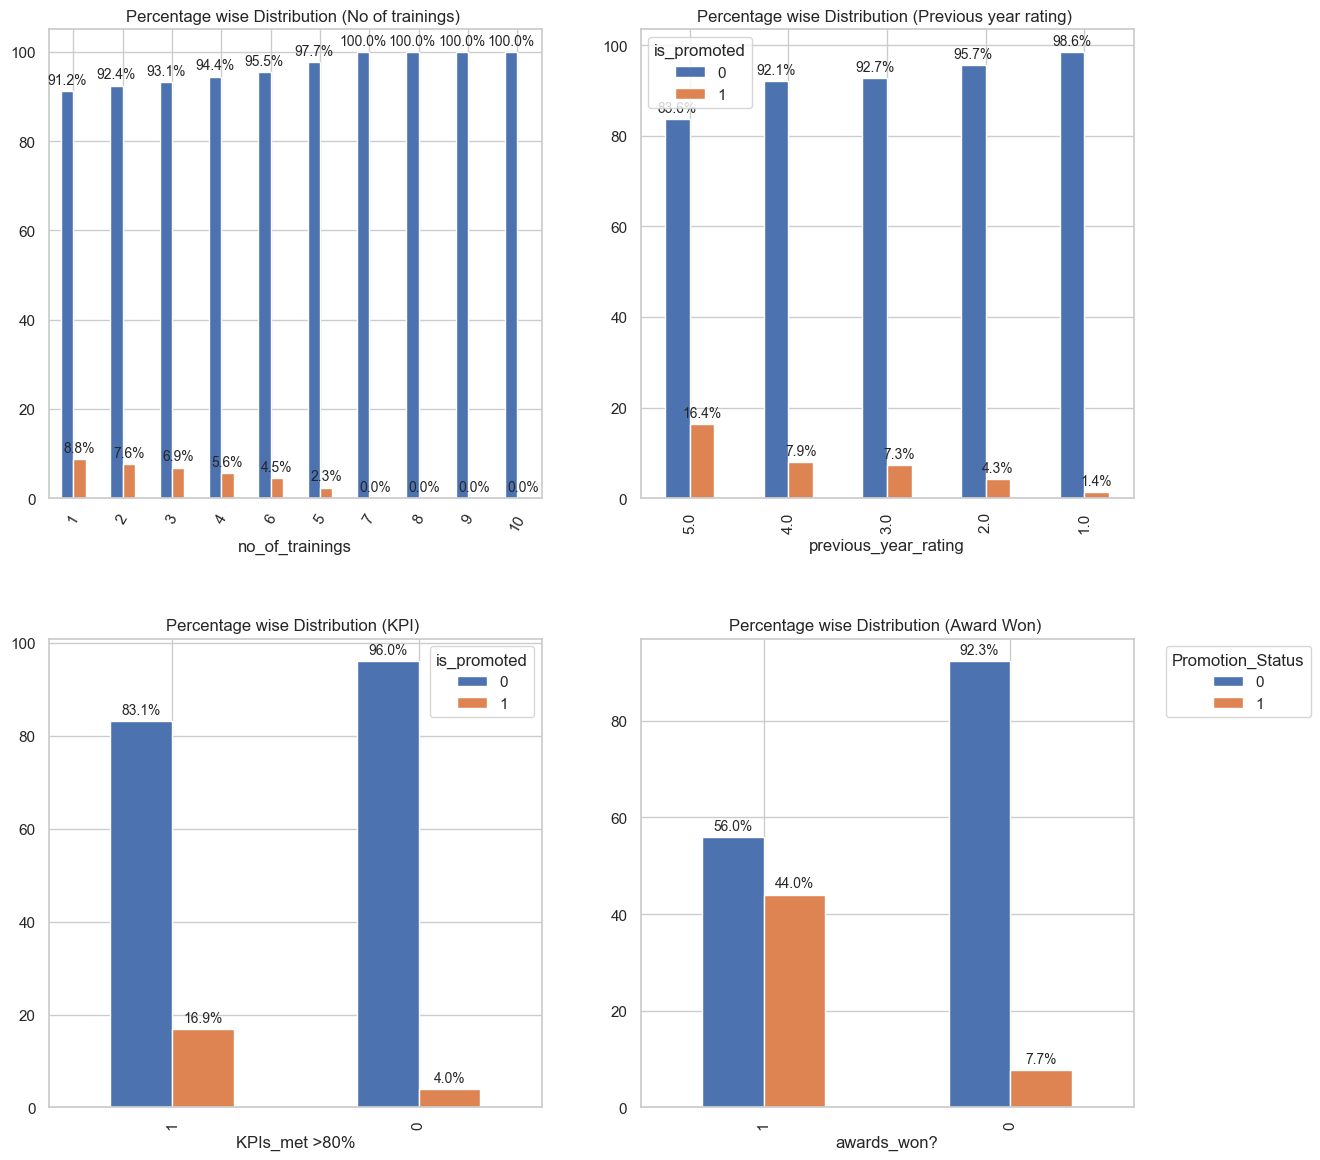

In [108]:
# figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14,14))




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.3)

# plot for department in the first row, first column
data = df.copy()
stacked_data = data.pivot_table(index='no_of_trainings', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (No of trainings) ')

# plot for region in the first row, second columnstacked_data = data.pivot_table(index='department', columns='is_promoted', aggfunc='size', )
data = df.copy()
stacked_data = data.pivot_table(index='previous_year_rating', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Previous year rating) ')

# plot for education in the second row, first column
data = df.copy()
stacked_data = data.pivot_table(index='KPIs_met >80%', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 1), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (KPI) ')

# plot for gender in the second row, second column
data = df.copy()
stacked_data = data.pivot_table(index='awards_won?', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_data_percentage.sort_values(by = 1,ascending = False,inplace = True)

ax = stacked_data_percentage.plot(kind='bar',ax = axes[1,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_title('Percentage wise Distribution (Award Won) ')



# Rotate x-axis labels by 90 degrees
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

# removing Legend
axes[0,0].get_legend().remove()

plt.show()

In [109]:
df = Df.copy()

In [110]:
data = df.copy()
#Create the 'Age_Category' column to create bins
bins = [20, 30, 40, 50, 60,]
data['Age_Category'] = pd.cut(data['age'], bins=bins, labels=['20-29', '30-39', '40-49', '50-60'])

In [111]:
#Create the 'Score_catagory' column to create bins
bins = [ 39, 49, 59, 69,79,89,99]

data['Score_Category'] = pd.cut(data['avg_training_score'], bins=bins, labels=['39-49', '50-59', '60-69', '70-79','80-99','90-99'])

In [112]:
#Create the 'Service Lenght' column to create bins
bins = [1,7,14,21,28,35]
data['Service Lenght'] = pd.cut(data['length_of_service'], bins=bins, labels=['1-7', '8-14', '15-21', '22-28', '29-37'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


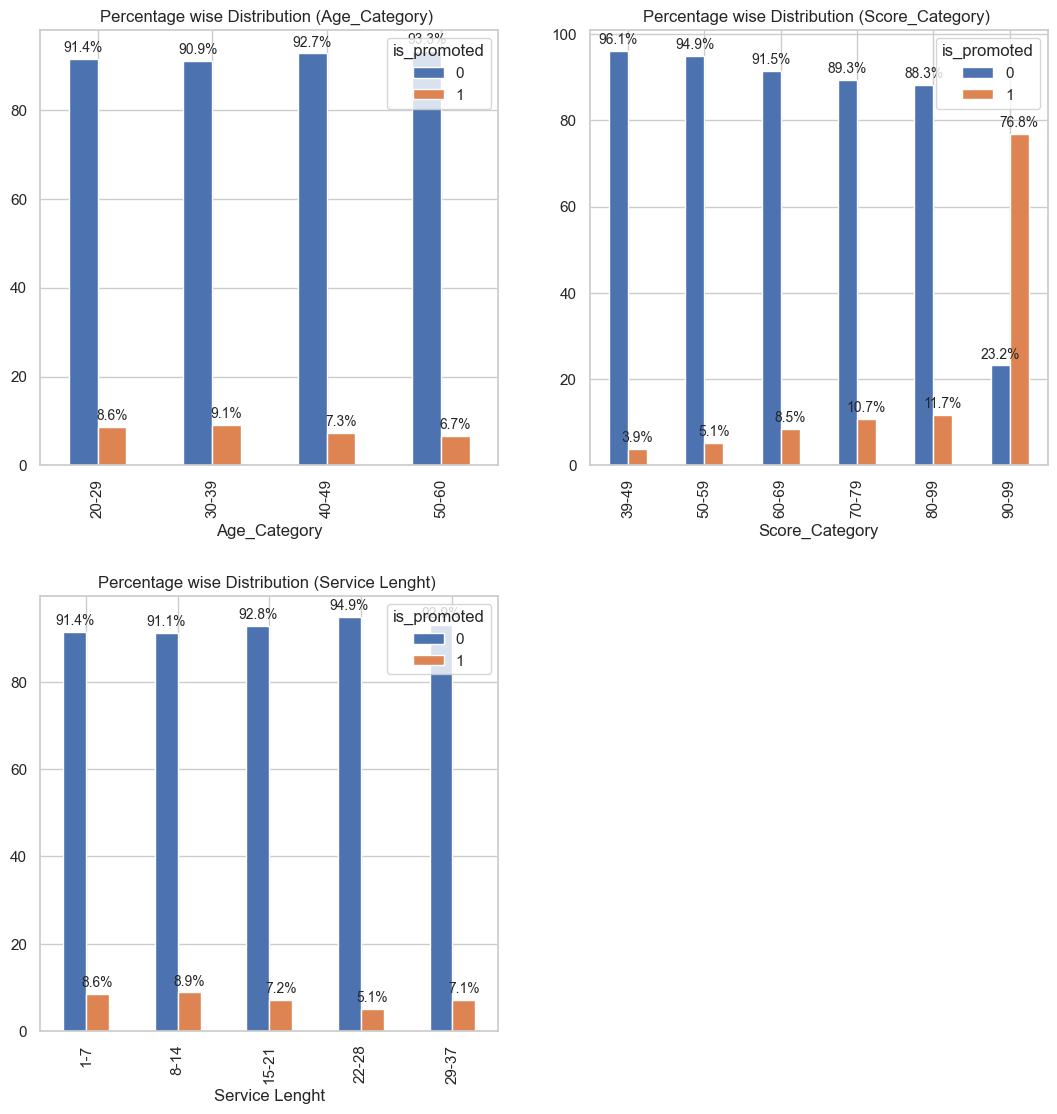

In [113]:
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(13,13))




# Adjusting space between plots
plt.subplots_adjust(wspace=0.2,hspace= 0.3)

# plot for Age in the first row, first column

stacked_data = data.pivot_table(index='Age_Category', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100


ax = stacked_data_percentage.plot(kind='bar',ax = axes[0,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_title('Percentage wise Distribution (Age_Category) ')

# plot for Avg Score in the first row, second column
stacked_data = data.pivot_table(index='Score_Category', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100


ax = stacked_data_percentage.plot(kind='bar',ax = axes[0,1])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].set_title('Percentage wise Distribution (Score_Category) ')

# plot for Service Lenght in the second row, first column

stacked_data = data.pivot_table(index='Service Lenght', columns='is_promoted', aggfunc='size')
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100


ax = stacked_data_percentage.plot(kind='bar',ax = axes[1,0])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(2, 1), loc='upper left')
axes[1,0].set_title('Percentage wise Distribution (Service Lenght) ')

# deleting unused plot
fig.delaxes(axes[1,1])

plt.show()

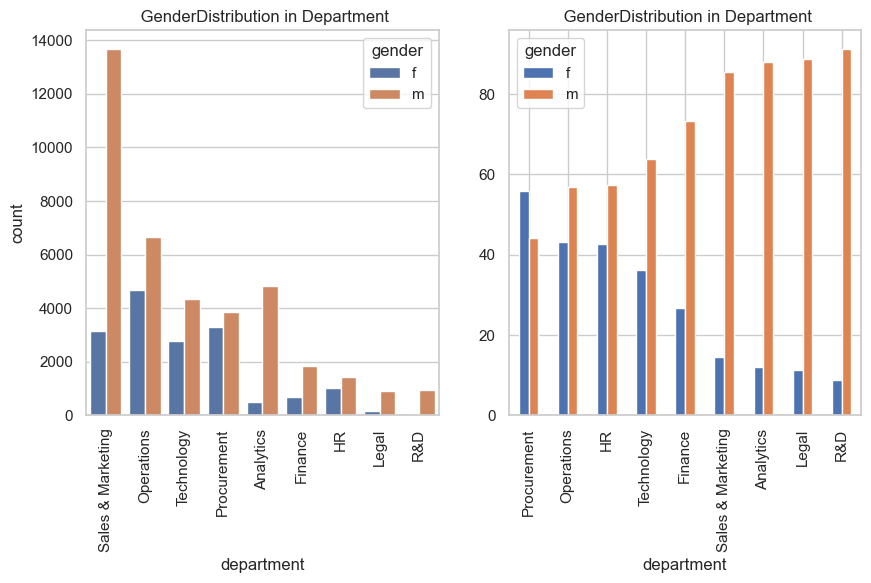

In [114]:
## filtering data of promoted employees
HR_set = df[df['is_promoted']==1]

# Analysing the Promotion Rate of men and Women in each Department
# figure with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,5))

#Plot for male female employes in Department
sns.countplot(data=df, x='department',hue=df['gender'],ax=axes[0],order=df['department'].value_counts().index)
axes[0].set_title(' GenderDistribution in Department')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
# Plot for gender based promotion rate in departments
promoted =  HR_set.pivot_table(index='department', columns='gender', aggfunc='size')
promoted_percentage = promoted.div(promoted.sum(axis=1), axis=0) * 100
promoted_percentage.sort_values(by = 'f',ascending = False,inplace = True)

ax = promoted_percentage.plot(kind='bar',ax =axes[1])


axes[1].set_title(' GenderDistribution in Department')

plt.show()

Text(0.5, 1.0, 'Ratio of Promotion based on Education in each age group')

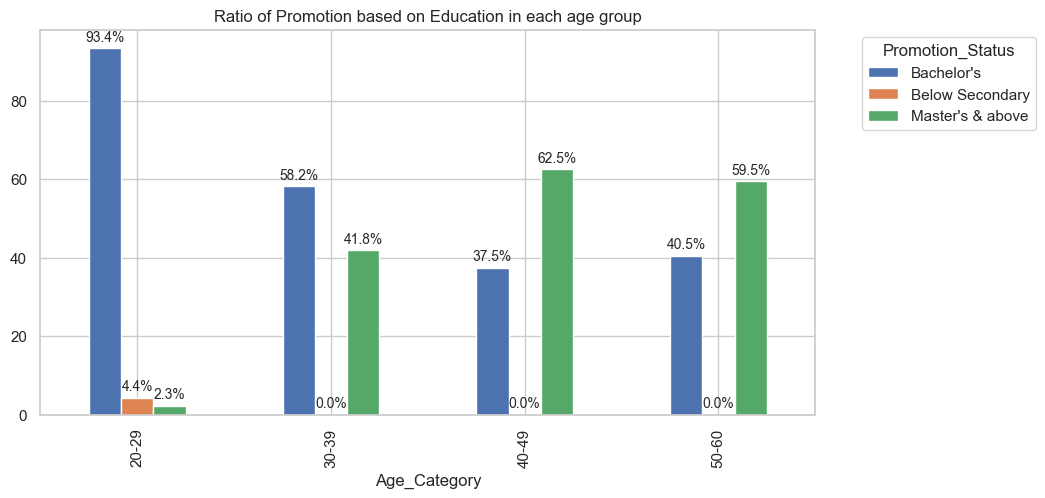

In [115]:
# Anlysing the Ratio of Promotion based on Education in each age group
HR = data[['education','Age_Category','is_promoted']]
HR = HR[HR['is_promoted']==1]
Grouped_Age =HR.pivot_table(index='Age_Category', columns='education', aggfunc='size')
percentage = Grouped_Age.div(Grouped_Age.sum(axis=1), axis=0) * 100
# Ploting  Graph
ax = percentage.plot(kind='bar',)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Ratio of Promotion based on Education in each age group')

In [116]:
data = df.copy()

# Pre Processing
### Null Value Handling

In [117]:


# identifying null values
df.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [118]:
## creating Dataframe for null values analysis of previous year rating
rating_null = df[df['previous_year_rating'].isna()]

In [119]:


data['previous_year_rating']=np.where(data['previous_year_rating'].isnull(),1,0)
data[['length_of_service','previous_year_rating']].groupby('length_of_service').sum()

previous_year_rating
length_of_service                      
1                                  4124
2                                     0
3                                     0
4                                     0
5                                     0
6                                     0
7                                     0
8                                     0
9                                     0
10                                    0
11                                    0
12                                    0
13                                    0
14                                    0
15                                    0
16                                    0
17                                    0
18                                    0
19                                    0
20                                    0
21                                    0
22                                    0
23                                    0
24                                    0
25                                    0
26                                    0
27                                    0
28                                    0
29                                    0
30                                    0
31                                    0
32                                    0
33                                    0
34                                    0
37                                    0

<Axes: xlabel='age'>

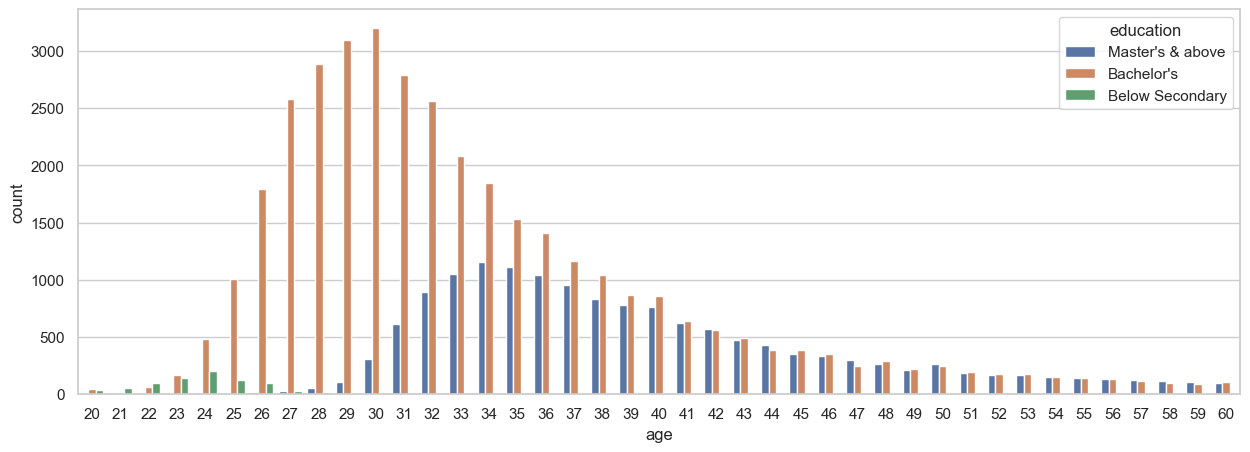

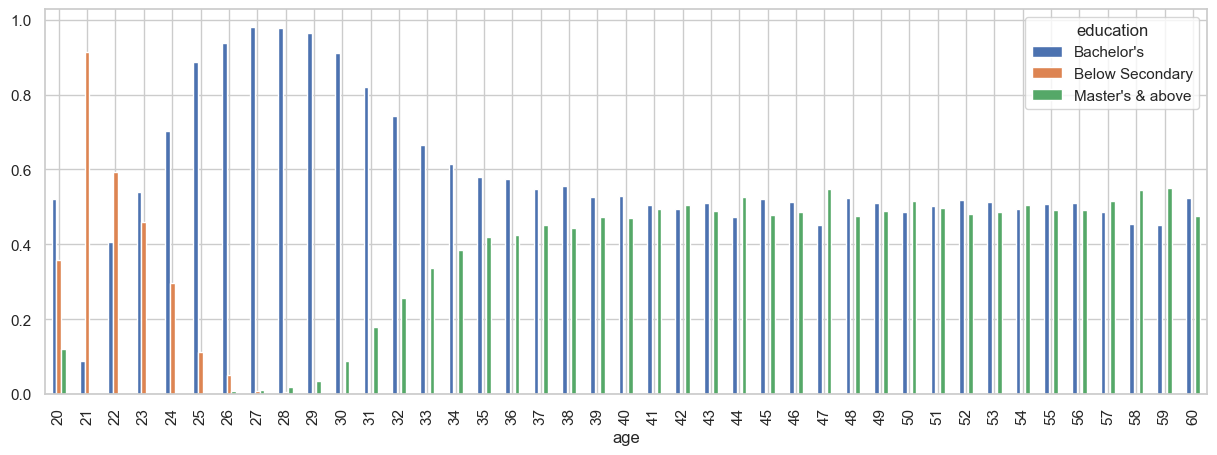

In [120]:
#Updated
## To check relationship between education and age
plt.figure(figsize=(15,5))
## count plot
sns.countplot(x=df['age'],data = Df,hue=Df['education'])

# percentage plot
value = Df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
value.plot(kind='bar',figsize=(15,5))

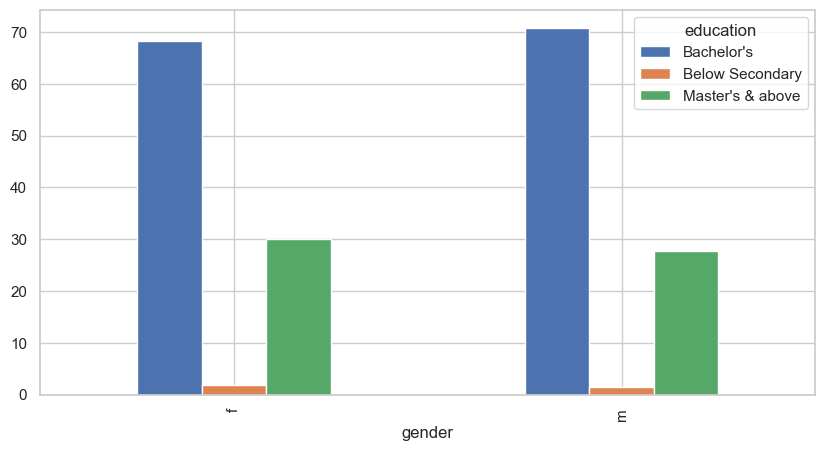

In [121]:
#Updated
## to check relation ship between gender and education
# percentage plot
value = df[['education', 'gender']].groupby(['gender']).value_counts(normalize=True).unstack()
percent = value * 100

ax = percent.plot(kind='bar')

Unable to find any pattern or relation between age and gender with education

In [122]:
## Replacing missing values in educatuion with mode of age category
# Step 1: Create a function to fill null values in 'education' based on 'age'
def fill_education_by_age(row):
    age = row['age']

    # Get the mode of education for individuals with the same age
    mode_education = df[(df['age'] == age)]['education'].mode().values

    # If there's a mode value, use it; otherwise, keep the original value
    return mode_education[0] if len(mode_education) > 0 else row['education']

#Apply the function to fill null values in the 'education' column
df['education'] = df.apply(lambda row: fill_education_by_age(row) if pd.isnull(row['education']) else row['education'], axis=1)

## Replacing Null values in previous_year_rating  with 0 as lenght of service is 1 year for employees for them i.e they are new employees
df['previous_year_rating'].fillna(0,inplace=True)

<Axes: title={'center': 'Distribution of Education by Age ( after replacing null value with mode)'}, xlabel='age'>

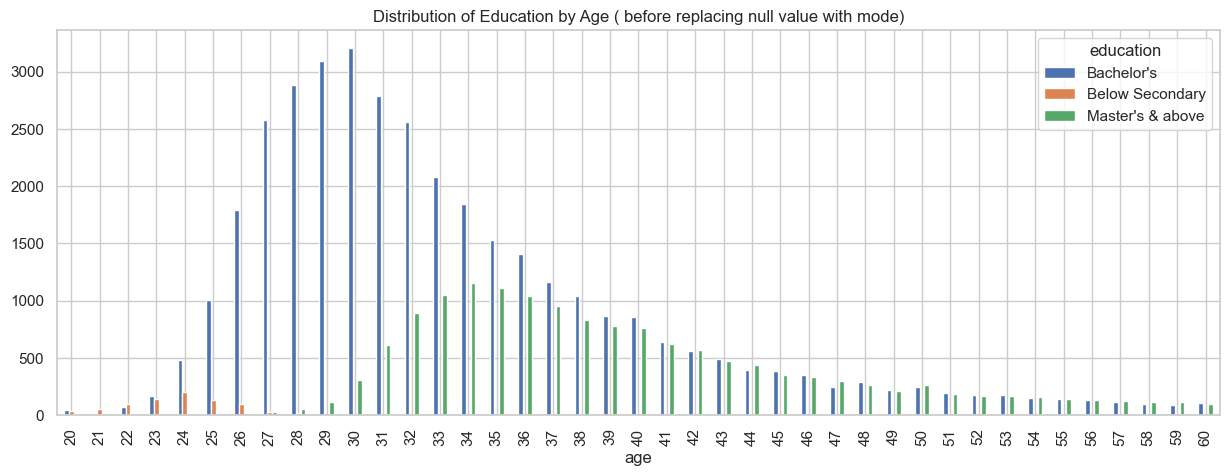

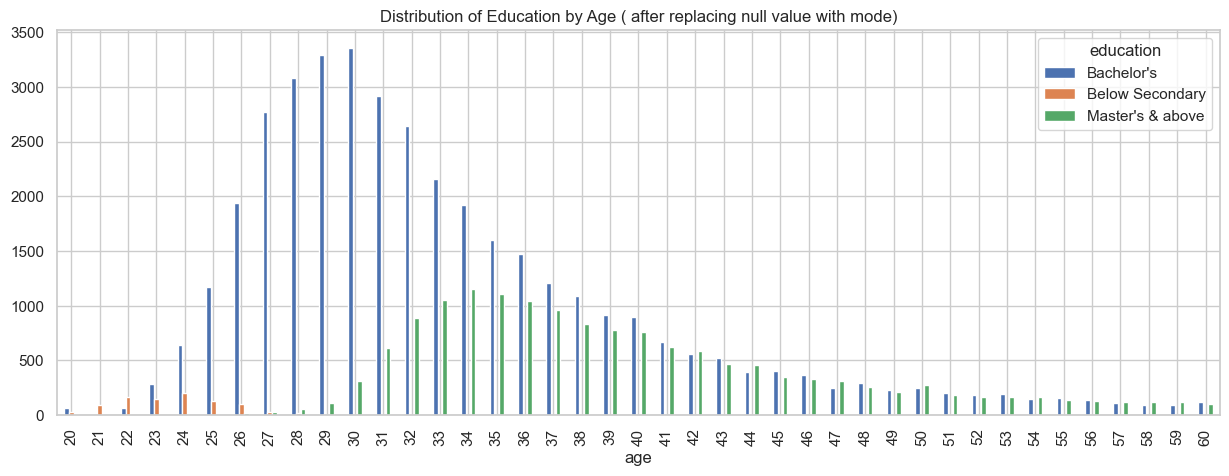

In [123]:
#Updated
## Distribution of data with before and after replacing nul values with mode in education
## Without filling null value
value = Df[['education', 'age']].groupby(['age']).value_counts().unstack()
#  filling null value with mode
value1 = df[['education', 'age']].groupby(['age']).value_counts().unstack()
# Plot Distribution Education to age before filling Null value for education
value.plot(kind='bar',figsize=(15,5),title = 'Distribution of Education by Age ( before replacing null value with mode)')
# Plot Distribution Education to age  after  filling Null value for education with mode
value1.plot(kind='bar',figsize=(15,5),title = 'Distribution of Education by Age ( after replacing null value with mode)')

<Axes: title={'center': 'Percentage wise Distribution of Education by Age ( after replacing null value with mode)'}, xlabel='age'>

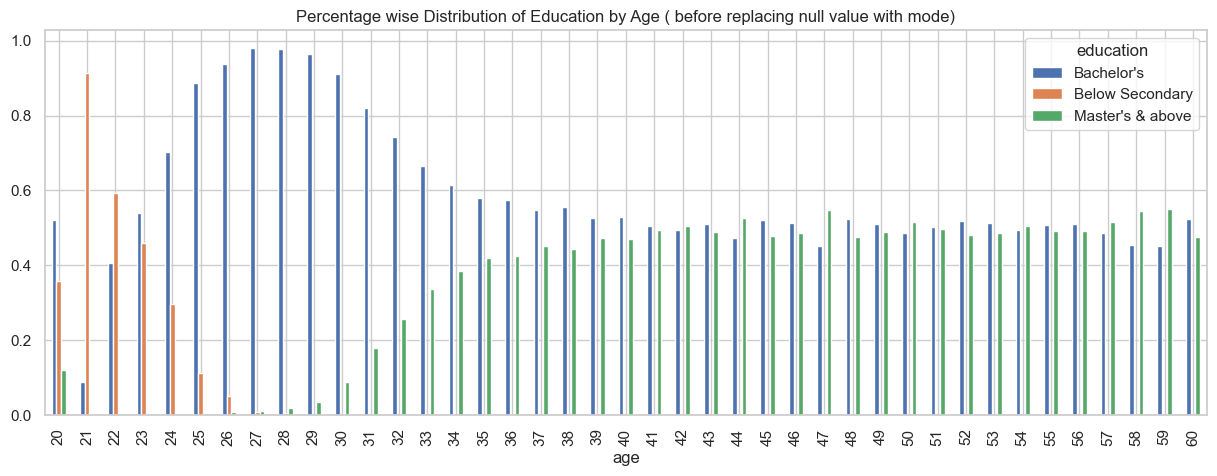

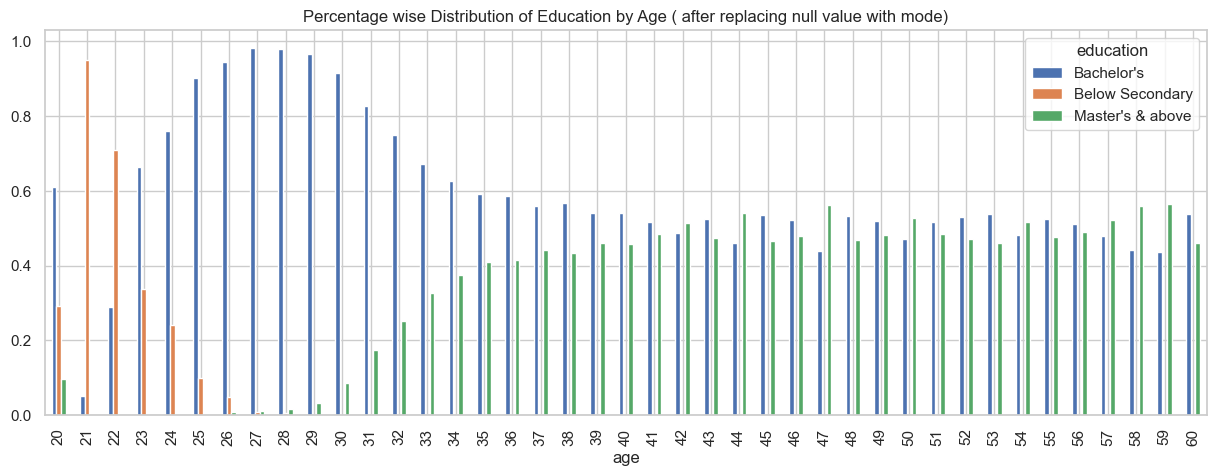

In [124]:
#Updated
## Without filling null value (Percentage)
value = Df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
#  filling null value with mode (Percentage)
value1 = df[['education', 'age']].groupby(['age']).value_counts(normalize = True).unstack()
# Plot Distribution Education to age before filling Null value for education
value.plot(kind='bar',figsize=(15,5),title = 'Percentage wise Distribution of Education by Age ( before replacing null value with mode)')
# Plot Distribution Education to age  after  filling Null value for education with mode
value1.plot(kind='bar',figsize=(15,5),title = 'Percentage wise Distribution of Education by Age ( after replacing null value with mode)')



### Outlier Detection

In [125]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

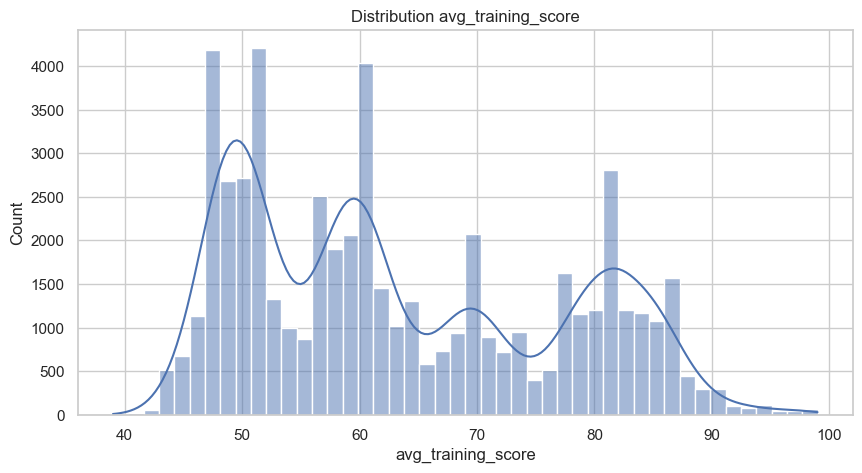

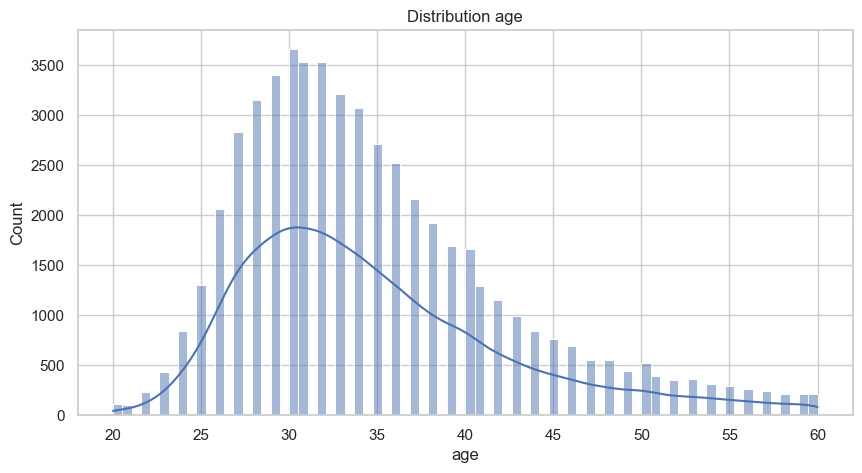

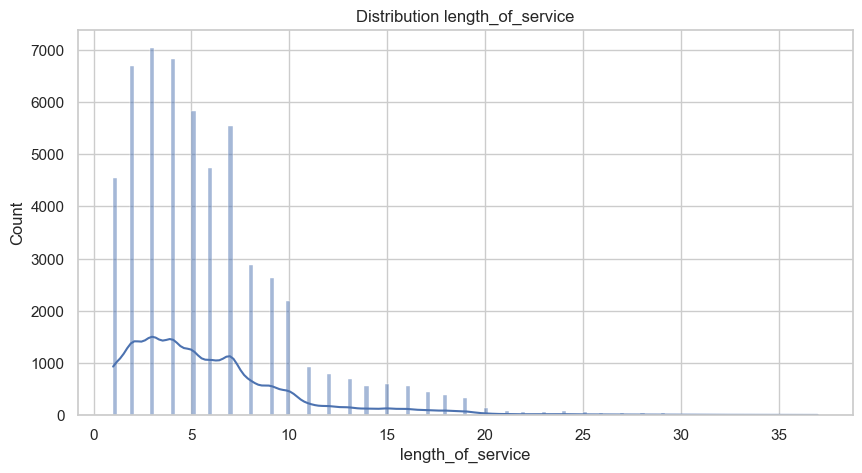

In [126]:
conti_col =['avg_training_score',  'age', 'length_of_service']
for feature in conti_col:

    data = df.copy()
    sns.histplot(data[feature],kde=True)

    plt.xlabel(feature)
    plt.title('Distribution ' + feature)
    plt.show()

In [127]:
print('Age Skewness: ',df['age'].skew())
print('length_of_service Skewness: ',df['length_of_service'].skew())
print('avg_training_score: ',df['avg_training_score'].skew())

Age Skewness:  1.0074317710382241
length_of_service Skewness:  1.738061458740809
avg_training_score:  0.45190808551707995


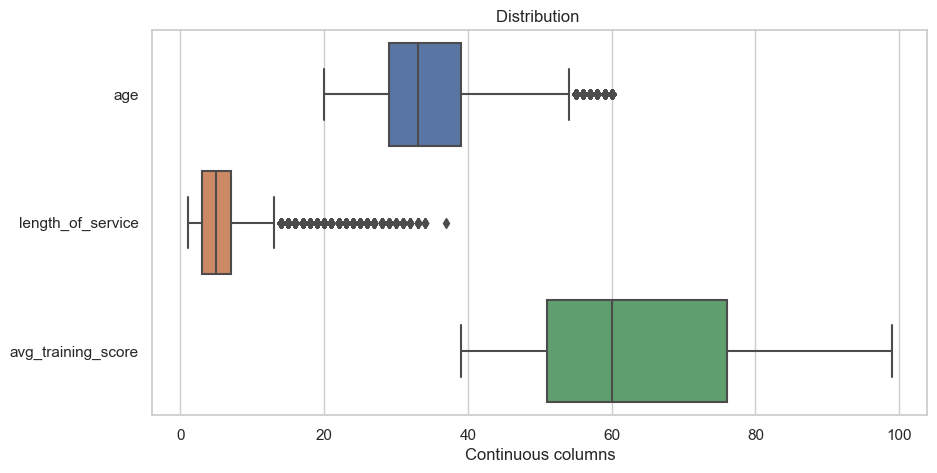

In [128]:
## Box Plot to Identify Outlier columns
sns.boxplot(df[['age','length_of_service','avg_training_score']],orient='h')

plt.xlabel('Continuous columns')
plt.title('Distribution ')
plt.show()

There are no outlier in average taining score, outliers are present in length of service and age

In [129]:
## describtive statiscs to find mean,std,min,max,25 percentile,50 percentile,75percentile
df[['age', 'length_of_service']].describe()

age  length_of_service
count  54808.000000       54808.000000
mean      34.803915           5.865512
std        7.660169           4.265094
min       20.000000           1.000000
25%       29.000000           3.000000
50%       33.000000           5.000000
75%       39.000000           7.000000
max       60.000000          37.000000

In [130]:
### 25 percentile
age_percentile25 = df['age'].quantile(0.25)
sl_percentile25 = df['length_of_service'].quantile(0.25)
### 75 percentile
age_percentile75 = df['age'].quantile(0.75)
sl_percentile75 = df['length_of_service'].quantile(0.75)
### Finding IQR
IQR_age = age_percentile75-age_percentile25
IQR_sl = sl_percentile75-sl_percentile25


In [131]:
IQR_age,IQR_sl

(10.0, 4.0)

In [132]:
## Upper and lower limit of Age
age_upper = age_percentile75+1.5*IQR_age
age_lower = age_percentile25-1.5*IQR_age
## Upper and lower limit of Length of service
sl_upper = sl_percentile75+1.5*IQR_sl
sl_lower = sl_percentile25-1.5*IQR_sl

In [133]:
sl_upper,sl_lower

(13.0, -3.0)

In [134]:
age_upper,age_lower

(54.0, 14.0)

In [135]:
## copying outliers from  datafram to new dataframe
age_out = df[(df['age']<age_lower)|(df['age']>age_upper)]
sl_out = df[(df['length_of_service']<sl_lower)|(df['length_of_service']>sl_upper)]

In [136]:
print('percent of Age outlier in data : ',len(age_out)/len(df)*100)
print('percent of Length of Service outlier in data : ',len(sl_out)/len(df)*100)

percent of Age outlier in data :  2.618230915194862
percent of Length of Service outlier in data :  6.365858998686323


In [137]:
age_out.head()

employee_id   department    region         education gender   
33         51756   Operations  region_2        Bachelor's      m  \
42         23560           HR  region_2        Bachelor's      m   
49         18013  Procurement  region_2  Master's & above      f   
99         51256      Finance  region_2  Master's & above      m   
307        13150  Procurement  region_2  Master's & above      f   

    recruitment_channel  no_of_trainings  age  previous_year_rating   
33             sourcing                2   57                   4.0  \
42             sourcing                1   59                   4.0   
49             sourcing                1   56                   3.0   
99                other                1   60                   5.0   
307               other                1   58                   1.0   

     length_of_service  KPIs_met >80%  awards_won?  avg_training_score   
33                   6              0            0                  58  \
42                  26              1            0                  52   
49                  12              0            0                  73   
99                  17              0            0                  59   
307                 13              0            0                  70   

     is_promoted  
33             0  
42             0  
49             0  
99             0  
307            0

In [138]:
sl_out.head()

employee_id         department     region         education gender   
13        38401         Technology  region_29  Master's & above      m  \
42        23560                 HR   region_2        Bachelor's      m   
60        17673  Sales & Marketing   region_4  Master's & above      m   
74        77577  Sales & Marketing   region_7        Bachelor's      m   
99        51256            Finance   region_2  Master's & above      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating   
13               other                2   39                   3.0  \
42            sourcing                1   59                   4.0   
60               other                1   50                   4.0   
74               other                1   50                   3.0   
99               other                1   60                   5.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score   
13                 16              0            0                  80  \
42                 26              1            0                  52   
60                 17              1            0                  47   
74                 14              0            0                  52   
99                 17              0            0                  59   

    is_promoted  
13            0  
42            0  
60            1  
74            0  
99            0

In [139]:
sl_out.shape, age_out.shape

((3489, 14), (1435, 14))

In [140]:
data = df.copy()

# Encoding

In [141]:
## Finding Unique values
for feature in cat_data:
    print(feature ,":",df[feature].nunique())

department : 9
region : 34
education : 3
gender : 2
recruitment_channel : 3


In [142]:
##ordinal encoding education column
from sklearn.preprocessing import OrdinalEncoder


Education = ['Below Secondary',"Bachelor's","Master's & above"]

enc = OrdinalEncoder(categories=[Education])

df[['education']] = enc.fit_transform(df[['education']])

In [143]:
df.head()

employee_id         department     region  education gender   
0        65438  Sales & Marketing   region_7        2.0      f  \
1        65141         Operations  region_22        1.0      m   
2         7513  Sales & Marketing  region_19        1.0      m   
3         2542  Sales & Marketing  region_23        1.0      m   
4        48945         Technology  region_26        1.0      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating   
0            sourcing                1   35                   5.0  \
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score   
0                  8              1            0                  49  \
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [144]:
##onehotencoding on gender recruitmentchannel and Department
from numpy import int32
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,dtype=int32,drop = 'first')
cols = df[['gender','recruitment_channel','department']]
onehot_encoded = ohe.fit_transform(cols)

In [145]:
# Get the feature names
feature_names = ohe.get_feature_names_out(['gender', 'recruitment_channel','department'])
# Create a new DataFrame with the encoded data and feature names
df_encoded = pd.DataFrame(onehot_encoded, columns=feature_names)
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)
# Droping columns 'gender','recruitment_channel','department'
df.drop(['gender','recruitment_channel','department'],axis=1,inplace=True)


In [146]:
df.head()

employee_id     region  education  no_of_trainings  age   
0        65438   region_7        2.0                1   35  \
1        65141  region_22        1.0                1   30   
2         7513  region_19        1.0                1   34   
3         2542  region_23        1.0                2   39   
4        48945  region_26        1.0                1   45   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?   
0                   5.0                  8              1            0  \
1                   5.0                  4              0            0   
2                   3.0                  7              0            0   
3                   1.0                 10              0            0   
4                   3.0                  2              0            0   

   avg_training_score  ...  recruitment_channel_referred   
0                  49  ...                             0  \
1                  60  ...                             0   
2                  50  ...                             0   
3                  50  ...                             0   
4                  73  ...                             0   

   recruitment_channel_sourcing  department_Finance  department_HR   
0                             1                   0              0  \
1                             0                   0              0   
2                             1                   0              0   
3                             0                   0              0   
4                             0                   0              0   

   department_Legal  department_Operations  department_Procurement   
0                 0                      0                       0  \
1                 0                      1                       0   
2                 0                      0                       0   
3                 0                      0                       0   
4                 0                      0                       0   

   department_R&D  department_Sales & Marketing  department_Technology  
0               0                             1                      0  
1               0                             0                      0  
2               0                             1                      0  
3               0                             1                      0  
4               0                             0                      1  

[5 rows x 22 columns]

In [147]:
df.columns

Index(['employee_id', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

In [148]:
df.region.value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

In [149]:
#Updated
## Encoding region with the region number
### extract number from region name

df['region'] = df['region'].str.extract('(\d+)')

## checkinf data type of column
df['region'].dtype


dtype('O')

In [150]:
## changing dtype from string to int
df['region'] = df['region'].astype(int)
df['region'].dtype

dtype('int32')

In [151]:
df.head()

employee_id  region  education  no_of_trainings  age  previous_year_rating   
0        65438       7        2.0                1   35                   5.0  \
1        65141      22        1.0                1   30                   5.0   
2         7513      19        1.0                1   34                   3.0   
3         2542      23        1.0                2   39                   1.0   
4        48945      26        1.0                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  ...   
0                  8              1            0                  49  ...  \
1                  4              0            0                  60  ...   
2                  7              0            0                  50  ...   
3                 10              0            0                  50  ...   
4                  2              0            0                  73  ...   

   recruitment_channel_referred  recruitment_channel_sourcing   
0                             0                             1  \
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   department_Finance  department_HR  department_Legal  department_Operations   
0                   0              0                 0                      0  \
1                   0              0                 0                      1   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing   
0                       0               0                             1  \
1                       0               0                             0   
2                       0               0                             1   
3                       0               0                             1   
4                       0               0                             0   

   department_Technology  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 22 columns]

In [152]:
df.columns

Index(['employee_id', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')

## outlier Handling

In [153]:
## Log transform
df[['age', 'length_of_service']] = np.log(df[['age', 'length_of_service']])

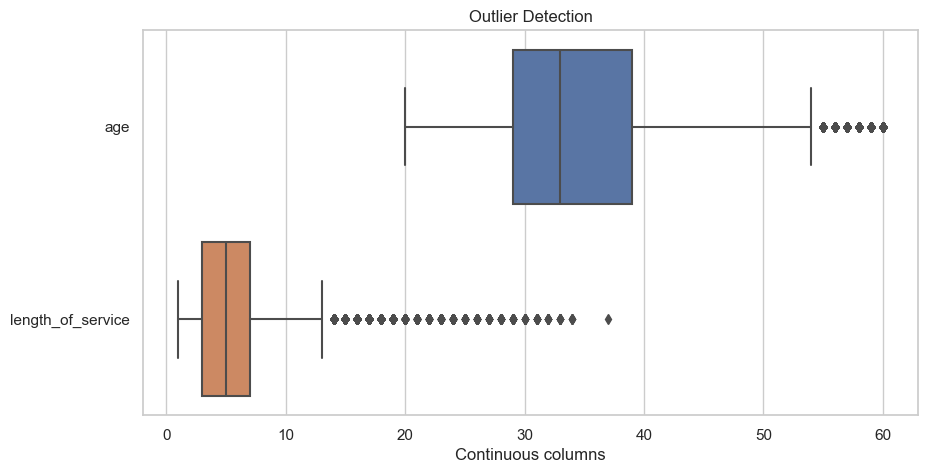

In [154]:
sns.boxplot(data[['age','length_of_service']],orient='h')

plt.xlabel('Continuous columns')
plt.title('Outlier Detection')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

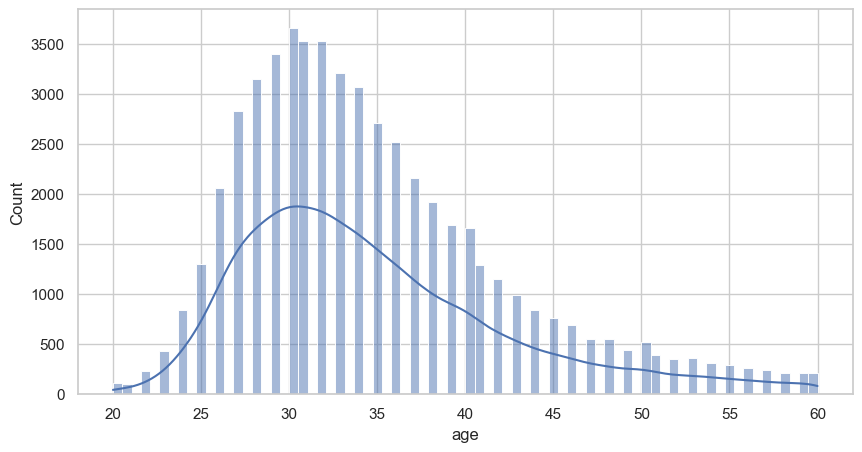

In [155]:
sns.histplot(data['age'],kde = True)

<Axes: xlabel='length_of_service', ylabel='Count'>

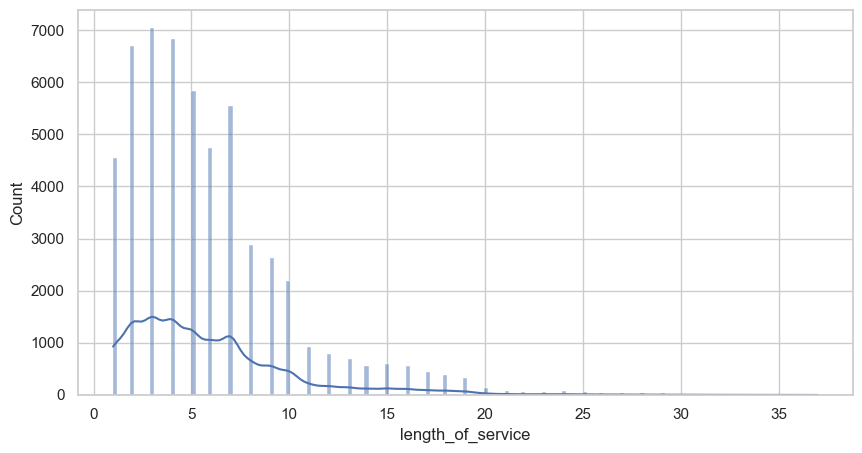

In [156]:
sns.histplot(data['length_of_service'],kde = True)

## Feature Engineering

In [157]:
#Creating a acheivement metric column
df['acheivement_metric'] =  df['previous_year_rating'].astype(str)+df['awards_won?'].astype(str)

# changing String to integer\
df['acheivement_metric'] = df['acheivement_metric'].astype(float)
# creating a total score column
df['total_score'] = df['avg_training_score'] * df['no_of_trainings']

Text(0.5, 1.0, 'Percentage wise Promotion Status(Acheivement mertic) ')

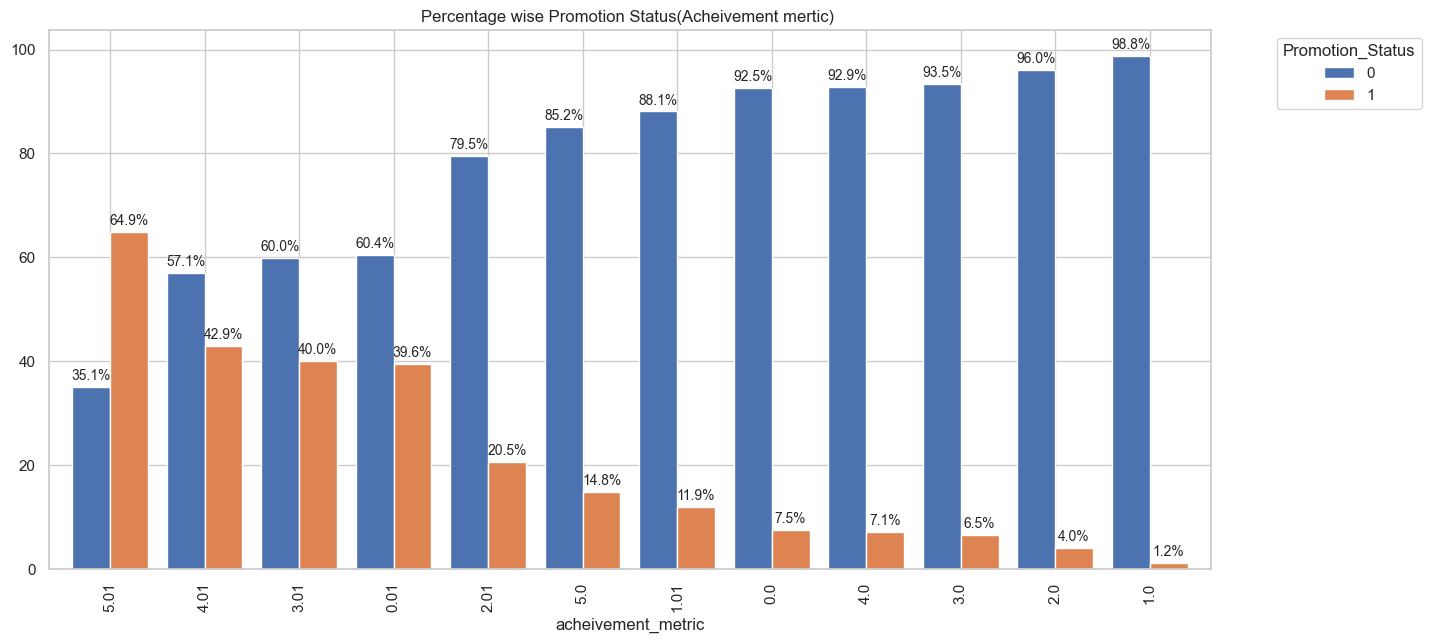

In [158]:
value = df[['is_promoted','acheivement_metric']].groupby(['acheivement_metric']).value_counts(normalize = True).unstack()
percent = value*100

percent.sort_values(by = 1,ascending = False,inplace = True)
## Plot for acheivement matrix
ax = percent.plot(kind='bar',figsize = (15,7),width=0.8)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Percentage wise Promotion Status(Acheivement mertic) ')

<Axes: ylabel='total_score'>

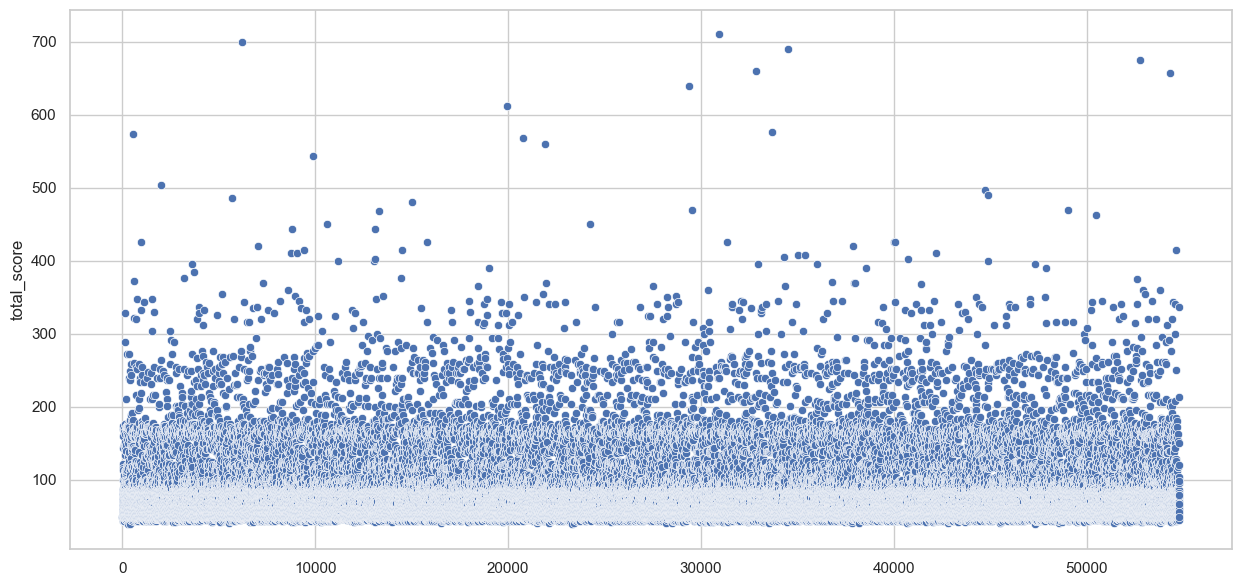

In [159]:

plt.figure(figsize=(15,7))
## Distribution Plot for Total score
sns.scatterplot(df['total_score'])

Text(0.5, 1.0, 'Percentage wise Distribution (Score_Category) ')

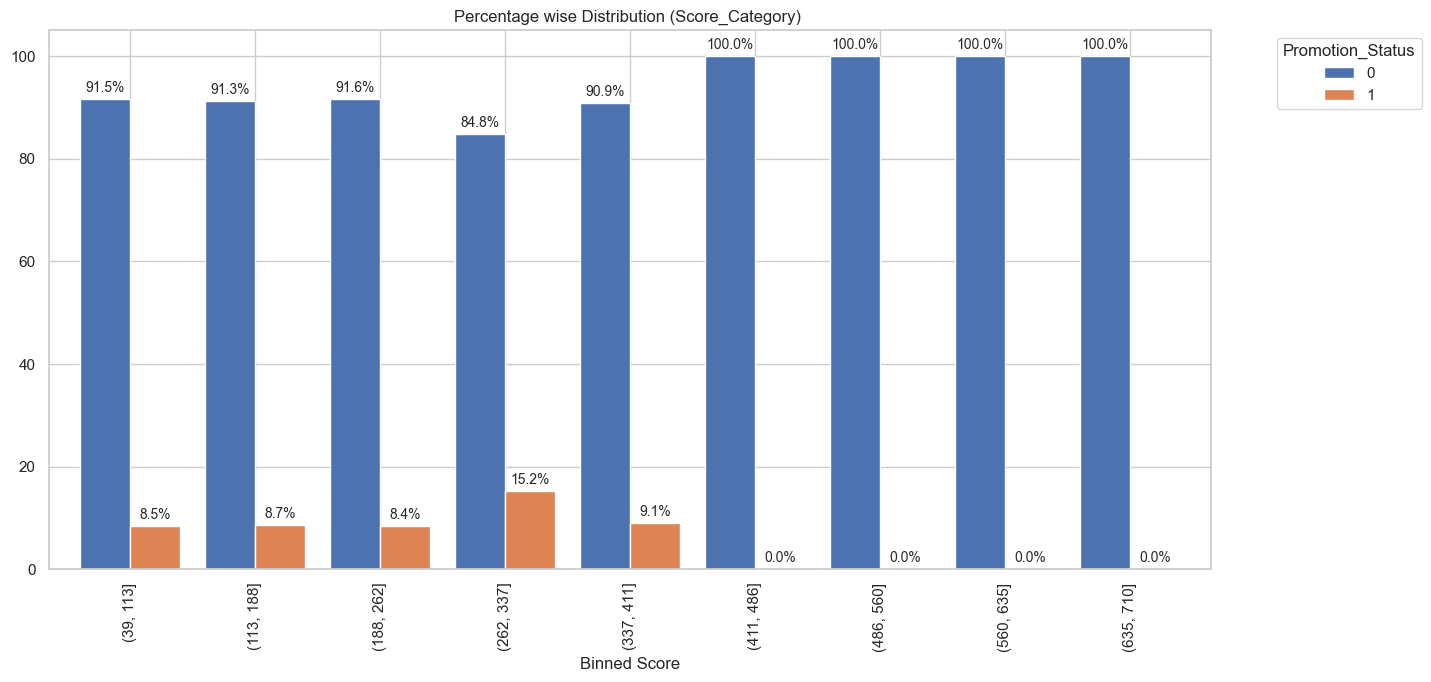

In [160]:
#Create the 'Score_catagory' column to create bins
bins = np.linspace(39, 710, num=10).astype(int)

df['Binned Score'] = pd.cut(df['total_score'], bins=bins)

## Grouping the
value = df[['is_promoted', 'Binned Score']].groupby(['Binned Score']).value_counts(normalize=True).unstack()
percent = value * 100


ax = percent.plot(kind='bar',figsize = (15,7),width=0.8)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])
plt.legend(title='Promotion_Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentage wise Distribution (Score_Category) ')

In [161]:
df.drop('Binned Score',axis = 1,inplace = True)

## Feature Scaling

In [162]:
# Using standardScalar for Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cols = df[['avg_training_score','total_score']]
scaled = scalar.fit_transform(cols)


## Droping unscaled columns
df.drop(['avg_training_score','total_score'],axis =1,inplace = True)
# Create a new DataFrame with the encoded data and feature names
scaled_col = pd.DataFrame(scaled, columns=['avg_training_score','total_score'])
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, scaled_col], axis=1)

In [163]:
df.head()

employee_id  region  education  no_of_trainings       age   
0        65438       7        2.0                1  3.555348  \
1        65141      22        1.0                1  3.401197   
2         7513      19        1.0                1  3.526361   
3         2542      23        1.0                2  3.663562   
4        48945      26        1.0                1  3.806662   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?   
0                   5.0           2.079442              1            0  \
1                   5.0           1.386294              0            0   
2                   3.0           1.945910              0            0   
3                   1.0           2.302585              0            0   
4                   3.0           0.693147              0            0   

   is_promoted  ...  department_HR  department_Legal  department_Operations   
0            0  ...              0                 0                      0  \
1            0  ...              0                 0                      1   
2            0  ...              0                 0                      0   
3            0  ...              0                 0                      0   
4            0  ...              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing   
0                       0               0                             1  \
1                       0               0                             0   
2                       0               0                             1   
3                       0               0                             1   
4                       0               0                             0   

   department_Technology  acheivement_metric  avg_training_score  total_score  
0                      0                 5.0           -1.075931    -0.701265  
1                      0                 5.0           -0.253282    -0.450574  
2                      0                 3.0           -1.001145    -0.678475  
3                      0                 1.0           -1.001145     0.461029  
4                      1                 3.0            0.718939    -0.154303  

[5 rows x 24 columns]

## Feature Reduction

In [164]:
## dropping Employee ID as it has all unique id (54808) and it does not has any corretaion with target variable

df.drop('employee_id',axis = 1,inplace = True)

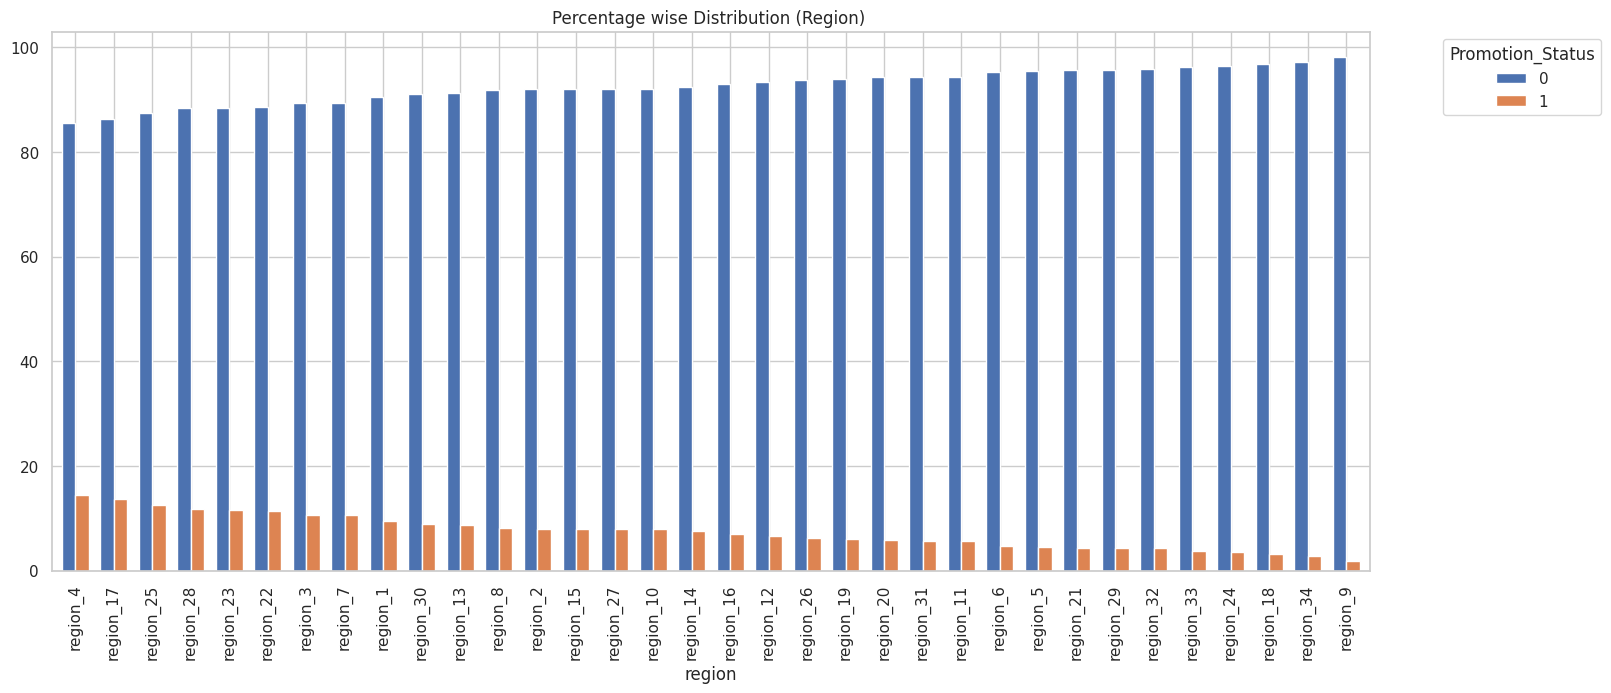

In [165]:
df.columns

Index(['region', 'education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?', 'is_promoted',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'acheivement_metric', 'avg_training_score',
       'total_score'],
      dtype='object')

In [166]:
x=df.drop(['is_promoted'],axis=1)
y=df['is_promoted']

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,random_state =42,test_size=0.33)

In [168]:
print("x_train data type:", type(x_train))
print("x_test data type:", type(x_test))
print("y_train data type:", type(y_train))
print("y_test data type:", type(y_test))


x_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>


In [169]:
df.columns

Index(['region', 'education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?', 'is_promoted',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'acheivement_metric', 'avg_training_score',
       'total_score'],
      dtype='object')

###Balancing the dataset

In [170]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [199]:
print("x_train data type:", type(x_train_sm))

x_train data type: <class 'pandas.core.frame.DataFrame'>


In [171]:
from collections import Counter

In [172]:
print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_sm).items())))

original dataset shape [(0, 33527), (1, 3194)]
Resampled dataset shape [(0, 33384), (1, 33384)]


<Axes: ylabel='count'>

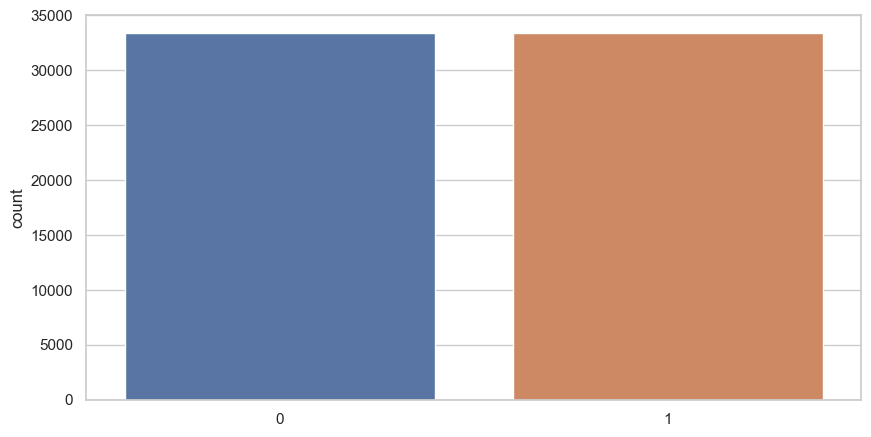

In [173]:
sns.countplot(x =y_train_sm)

In [174]:
x_test

array([[16.        ,  1.        ,  1.        , ...,  5.        ,
        -1.225504  , -0.7468455 ],
       [ 7.        ,  1.        ,  3.        , ...,  1.        ,
        -0.9263589 ,  1.66890327],
       [ 2.        ,  1.        ,  2.        , ...,  3.        ,
         0.04586267,  1.09915121],
       ...,
       [ 2.        ,  1.        ,  2.        , ...,  3.        ,
        -0.77678635,  0.59776938],
       [22.        ,  1.        ,  1.        , ...,  5.        ,
        -0.47764125, -0.51894467],
       [20.        ,  1.        ,  1.        , ...,  2.        ,
         0.71893915, -0.15430335]])

In [175]:
#Fitting with different models

In [176]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [177]:

models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_sm,y_train_sm)
    print(name+'  trained')

RandomForestClassifier  trained


C:\Users\shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [178]:
isinstance(x_test, np.ndarray)

True

In [179]:
import numpy as np

# Check data type and format of x_test
print("x_test data type:", type(x_test))
print("x_test shape:", x_test.shape)
print("x_test dtype:", x_test.dtype)
print("Is x_test a numpy array?", isinstance(x_test, np.ndarray))

# Check data type and format of y_test
print("y_test data type:", type(y_test))
print("y_test shape:", y_test.shape)
print("y_test dtype:", y_test.dtype)
print("Is y_test a numpy array?", isinstance(y_test, np.ndarray))



x_test data type: <class 'numpy.ndarray'>
x_test shape: (18087, 22)
x_test dtype: float64
Is x_test a numpy array? True
y_test data type: <class 'numpy.ndarray'>
y_test shape: (18087,)
y_test dtype: int64
Is y_test a numpy array? True


In [180]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

{'Random Forest': array([[16242,   371],
        [  907,   567]], dtype=int64),
 'Logistic regression': array([[12550,  4063],
        [  257,  1217]], dtype=int64),
 'KNN': array([[13948,  2665],
        [  714,   760]], dtype=int64),
 'DecisionTree': array([[15517,  1096],
        [  797,   677]], dtype=int64),
 'BernolliNB': array([[12511,  4102],
        [  563,   911]], dtype=int64),
 'GaussianNB': array([[10202,  6411],
        [  342,  1132]], dtype=int64),
 'XGBClassifier': array([[16537,    76],
        [  945,   529]], dtype=int64)}

In [181]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

Model  Accuracy_score  F1_score  Recall_score   
0        Random Forest        0.929342  0.470149      0.384668  \
1  Logistic regression        0.761154  0.360379      0.825645   
2                  KNN        0.813181  0.310267      0.515604   
3         DecisionTree        0.895339  0.417000      0.459294   
4           BernolliNB        0.742080  0.280869      0.618046   
5           GaussianNB        0.626638  0.251081      0.767978   
6        XGBClassifier        0.943551  0.508899      0.358887   

   Precision_score  
0         0.604478  
1         0.230492  
2         0.221898  
3         0.381839  
4         0.181728  
5         0.150073  
6         0.874380

In [182]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

xgb_model = XGBClassifier()

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score
scores = cross_val_score(xgb_model, x_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:", scores)

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
xgb_model = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start = 200,stop = 2000,num = 100)],
    'max_depth': [int(x) for x in np.linspace(start = 10,stop = 1000,num = 100)],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2, 3],
    'objective': ['binary:logistic'],
    'booster': ['gbtree'],
    'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
    'eval_metric': ['error', 'logloss', 'auc']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring='accuracy', cv=5, n_iter=10, random_state=42)
random_search.fit(x_train, y_train)


In [ ]:
best_random = random_search.best_estimator_
best_random

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

In [ ]:
random_search.best_params_

In [ ]:
param_grid = {
    'tree_method': [random_search.best_params_['tree_method']],
    'scale_pos_weight': [random_search.best_params_['scale_pos_weight'],random_search.best_params_['scale_pos_weight']+2,random_search.best_params_['scale_pos_weight']-2],
    'objective': [random_search.best_params_['objective']],
    'n_estimators': [random_search.best_params_['n_estimators']-200,random_search.best_params_['n_estimators']-100,random_search.best_params_['n_estimators'],random_search.best_params_['n_estimators']+100,random_search.best_params_['n_estimators']+200],
    'min_child_weight': [random_search.best_params_['min_child_weight']],
    'max_depth': [random_search.best_params_['max_depth']],
    'learning_rate': [random_search.best_params_['learning_rate']],
    'eval_metric': [random_search.best_params_['eval_metric']],
    'booster': [random_search.best_params_['booster']]
}
print(param_grid)

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [ ]:
y_pred = best_xgb_model.predict(x_test)

#print("Best Parameters:", best_params)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

In [ ]:
grid_search.best_params_

## Model Training

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier with specified parameters
model = XGBClassifier(
    booster='gbtree',
    eval_metric='auc',
    learning_rate=0.01,
    max_depth=220,
    min_child_weight=1,
    n_estimators=581,
    objective='binary:logistic',
    scale_pos_weight=1,
    tree_method='hist'  
)

# Fit the model to your training data
model.fit(x_train_sm, y_train_sm)